***
## Table of Contents
<br>
<ol>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 70:30 Train Test Split </h3></a>
            </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>B. 80:20 Train Test Split with PCA </h3></a>
           </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. 70:30 Train Test Split with PCA </h3></a>
            </ul>
     </ol>
<br>

In [192]:
### Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option("display.max_columns",40)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,binarize
from pandas_ml import ConfusionMatrix


In [193]:


### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    display(cm)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid_acc(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold,n_jobs=-1)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test    

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

###  <a id='1.A' style="text-decoration : none; color : #000000;">A. 80:20 Train Test Split</a>
#### Random State 0

In [194]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_0.csv',index_col='User')

# #z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
#     '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
#     '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
# ]


# columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
#     '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
#     '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
# ]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
columns=X.columns
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP   DIP  \
User                                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  6855  69    70  102  1503   
3c45372db59b842faec38488806b64c282270417f6755ba...    13   4     4    3     8   

                                                    NREC         PAR  \
User                                                                   
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  7494  182.050440   
3c45372db59b842faec38488806b64c282270417f6755ba...    13   97.769231   

                                                          PAS         LEN  \
User                                                                        
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  70.107419  109.414331   
3c45372db59b842faec38488806b64c282270417f6755ba...  90.000000   88.461538   

                                                             BYS  \
User                                                               
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  18672.453563   
3c45372db59b842faec38488806b64c282270417f6755ba...   7757.153846   

                                                              BYR  0000  0100  \
User                                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  223011.614091   319   339   
3c45372db59b842faec38488806b64c282270417f6755ba...  120738.153846     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   265   588   981   782   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   183   139    87   167   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...    70   122   149   313   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     5     0   

                                                    1400  1500  1600  1700  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   268   399   825   309   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     1     7     0   

                                                    1800  1900  2000  2100  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   223   264   229   125   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    2200  2300  
User                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   126   222  
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0

In [195]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953    1
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402    0
653fe3e24024826e008a512560be7abb15b06bd46e89ba4159dbdc6b8b5983c3    0
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107    1
ac87be58a25e50356ef8d66135f93392ac6c40f3c7b557e7c16f663ce168e9fc    1
8df0db56b5bb9ff4cc7b00413a2a4c211db8a7d9d4dcf78a73cd79904bc395cd    1
e3a357295e4a68d988b39f98f9751f6ea4098f7443b6ca0fff6f5d6c804d36f5    0
481ba91002ea25e7b1470715bc8dbb26dff02ad090bba34cc8cc3188e4a49813    1
9bf5181f7d61d1d2357434a6f710f3630c854a1b692dc7f6f3d3b2697f1a983d    1
e5615a3ffc7932b6beb79fdbb4adca13f9a0fb79f3210a0ef275419005e37268    1
Name: Target, dtype: int64

In [196]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [197]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           50  uniform

Accuracy of the  KNN  model for the training data is: 0.8028350515463918

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1829   488     2317
True         430  1909     2339
__all__     2259  2397     4656

Accuracy of the  KNN  model for test data is: 0.8101374570446735

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        479   114      593
True         107   464      571
__all__      586   578     1164

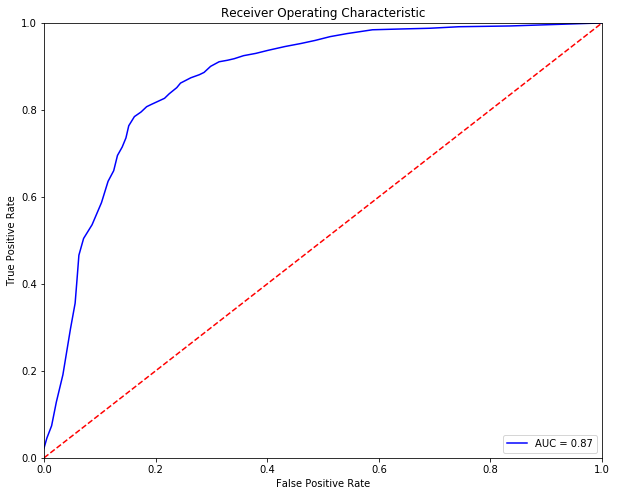

Optimal Threshold is 0.52
Accuracy on test data is: 0.8118556701030928


Predicted  False  True  __all__
Actual                         
False        484   109      593
True         110   461      571
__all__      594   570     1164

In [199]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [200]:
table_80_50_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [201]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.7910223367697594

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1883   434     2317
True         539  1800     2339
__all__     2422  2234     4656

Accuracy of the  Logistic  model for test data is: 0.8075601374570447

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        496    97      593
True         127   444      571
__all__      623   541     1164

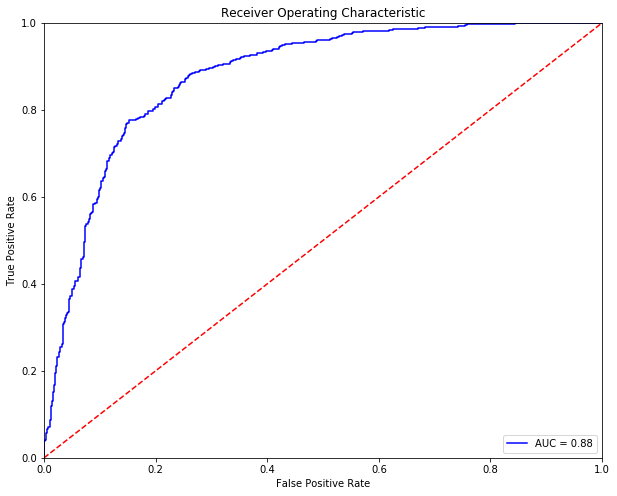

Optimal Threshold is 0.47820552838785235
Accuracy on test data is: 0.802405498281787


Predicted  False  True  __all__
Actual                         
False        476   117      593
True         113   458      571
__all__      589   575     1164

In [202]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [203]:
table_80_50_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [204]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7985395189003437

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1762   555     2317
True         383  1956     2339
__all__     2145  2511     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.8127147766323024

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        465   128      593
True          90   481      571
__all__      555   609     1164

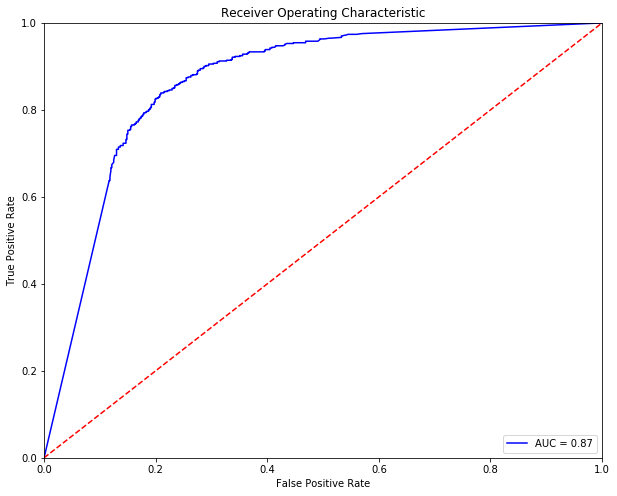

Optimal Threshold is 0.6367624693007194
Accuracy on test data is: 0.8075601374570447


Predicted  False  True  __all__
Actual                         
False        480   113      593
True         111   460      571
__all__      591   573     1164

In [205]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [206]:
table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

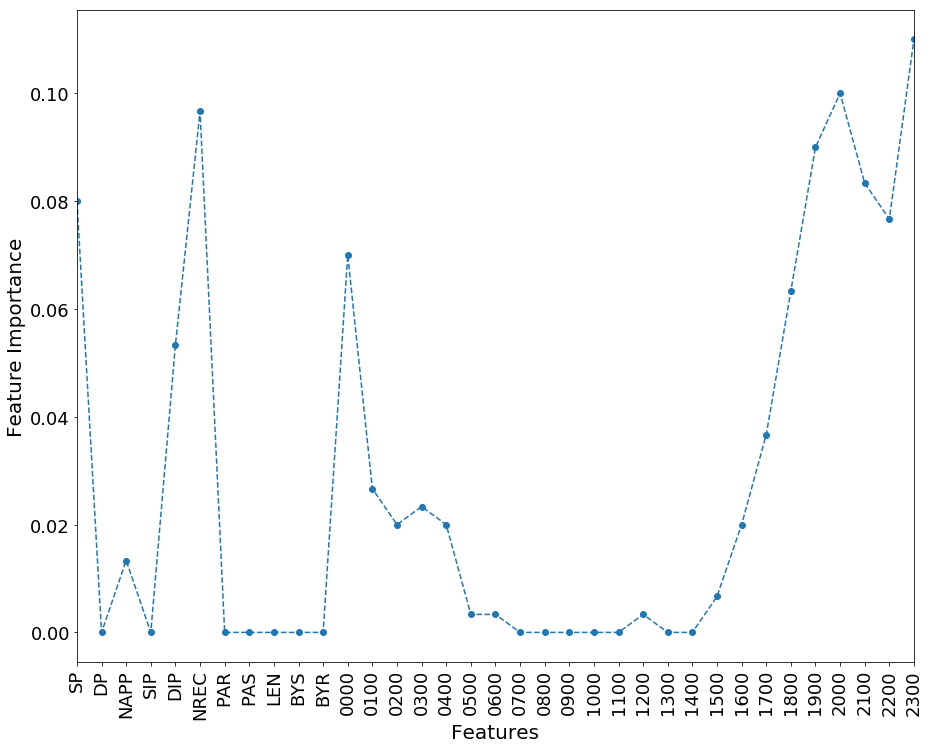

In [207]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [208]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8039089347079038

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1754   563     2317
True         350  1989     2339
__all__     2104  2552     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        449   144      593
True          84   487      571
__all__      533   631     1164

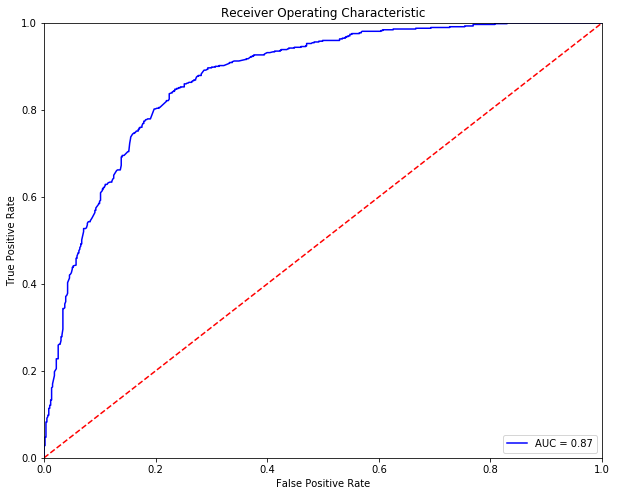

Optimal Threshold is 0.5096869446331997
Accuracy on test data is: 0.7946735395189003


Predicted  False  True  __all__
Actual                         
False        480   113      593
True         126   445      571
__all__      606   558     1164

In [209]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [210]:
table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

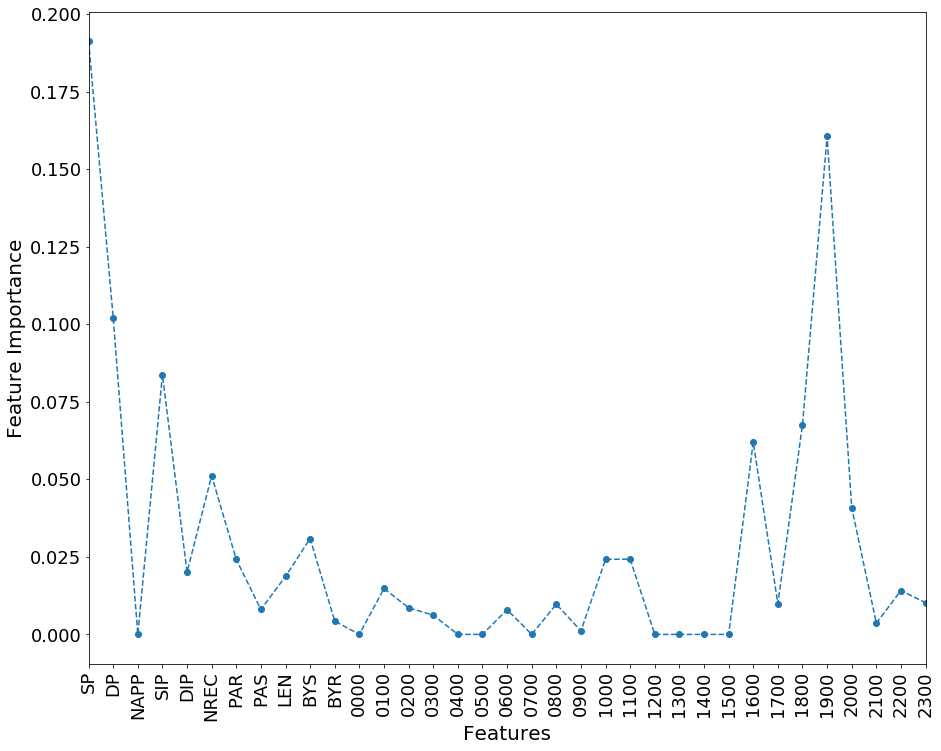

In [211]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [212]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.05  exponential                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1           150             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8127147766323024

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1770   547     2317
True         325  2014     2339
__all__     2095  2561     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8015463917525774

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        448   145      593
True          86   485      571
__all__      534   630     1164

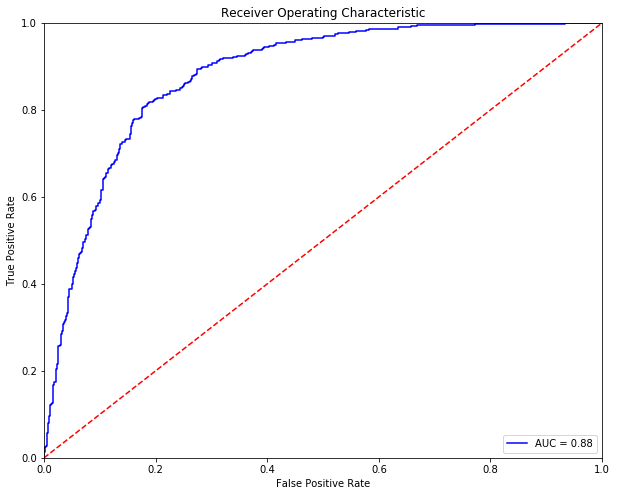

Optimal Threshold is 0.5868320309273528
Accuracy on test data is: 0.8144329896907216


Predicted  False  True  __all__
Actual                         
False        483   110      593
True         106   465      571
__all__      589   575     1164

In [213]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [214]:
table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

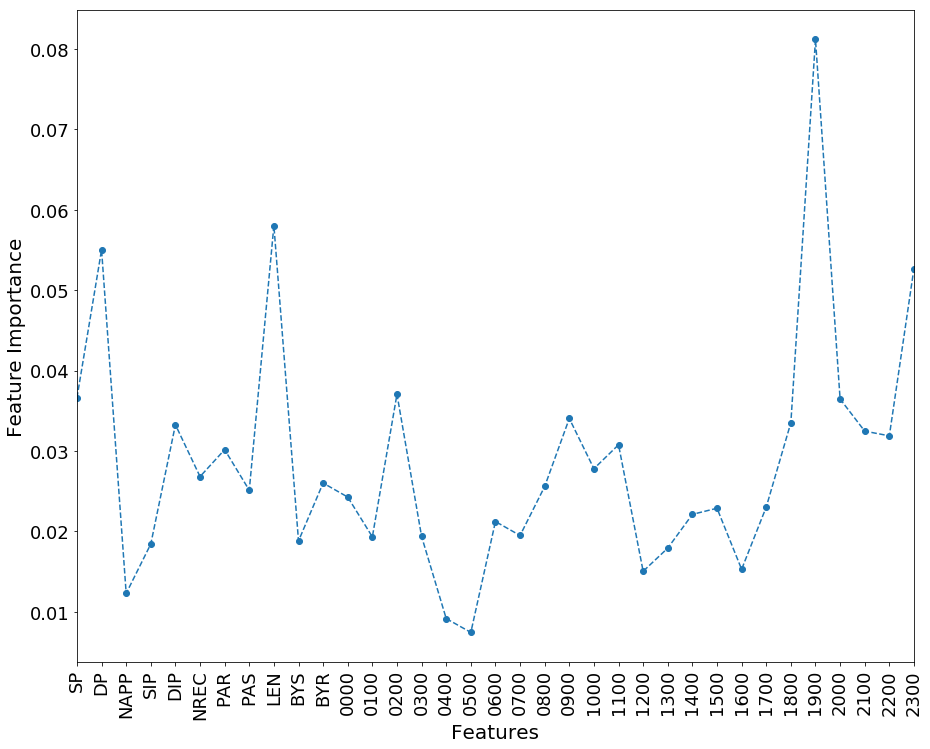

In [215]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [216]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.7991838487972509

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1847   470     2317
True         465  1874     2339
__all__     2312  2344     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.8049828178694158

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        484   109      593
True         118   453      571
__all__      602   562     1164

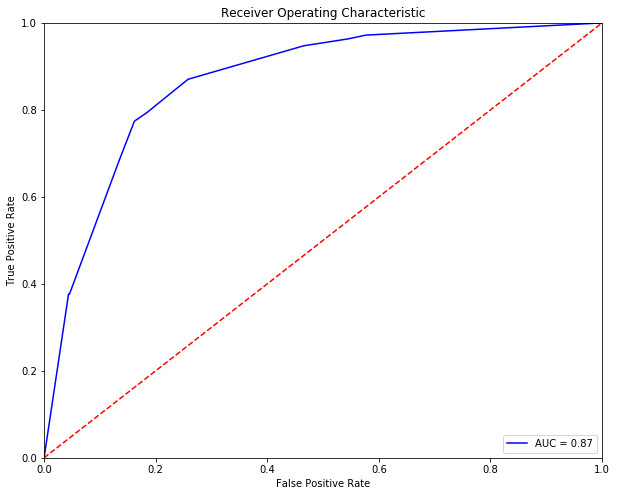

Optimal Threshold is 0.5588235294117647
Accuracy on test data is: 0.8067010309278351


Predicted  False  True  __all__
Actual                         
False        497    96      593
True         129   442      571
__all__      626   538     1164

In [217]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [218]:
table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [219]:
%%capture
table_80_50_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

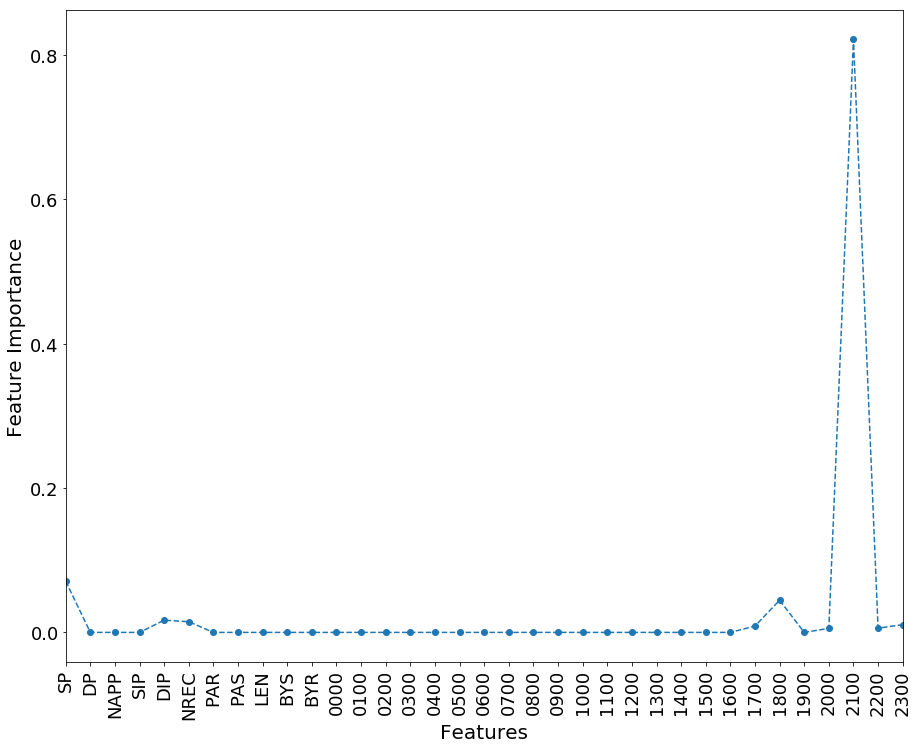

In [220]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [221]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.2          0.6           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9884020618556701

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2287    30     2317
True          24  2315     2339
__all__     2311  2345     4656

Accuracy of the  Bagging  model for test data is: 0.8058419243986255

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        462   131      593
True          95   476      571
__all__      557   607     1164

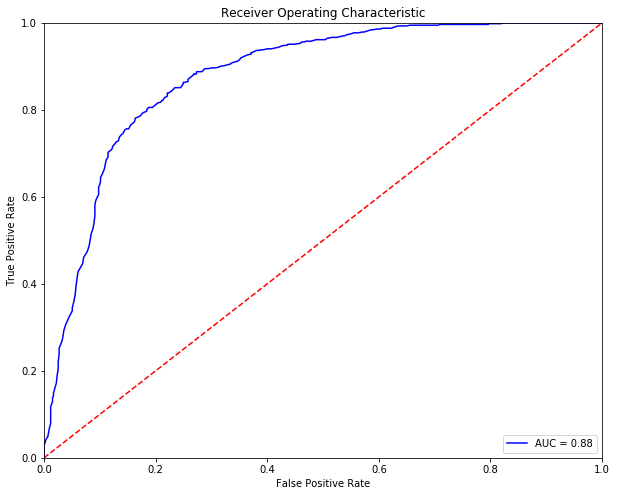

Optimal Threshold is 0.56
Accuracy on test data is: 0.8075601374570447


Predicted  False  True  __all__
Actual                         
False        480   113      593
True         111   460      571
__all__      591   573     1164

In [222]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [223]:
table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [224]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9063573883161512


Predicted  False  True  __all__
Actual                         
False       2038   279     2317
True         157  2182     2339
__all__     2195  2461     4656

The test accuracy is: 0.8084192439862543


Predicted  False  True  __all__
Actual                         
False        462   131      593
True          92   479      571
__all__      554   610     1164

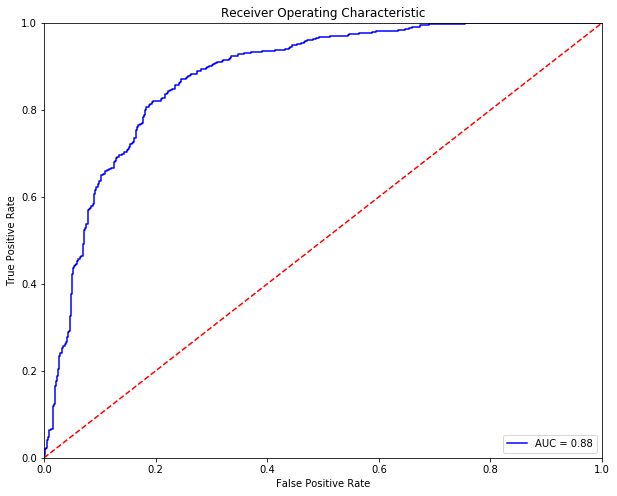

Optimal Threshold is 0.5450145429629799
Accuracy on test data is: 0.8101374570446735


Predicted  False  True  __all__
Actual                         
False        481   112      593
True         109   462      571
__all__      590   574     1164

In [225]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [226]:
table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [227]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8848797250859106


Predicted  False  True  __all__
Actual                         
False       1972   345     2317
True         191  2148     2339
__all__     2163  2493     4656

The accuracy of the model on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False        441   152      593
True         100   471      571
__all__      541   623     1164

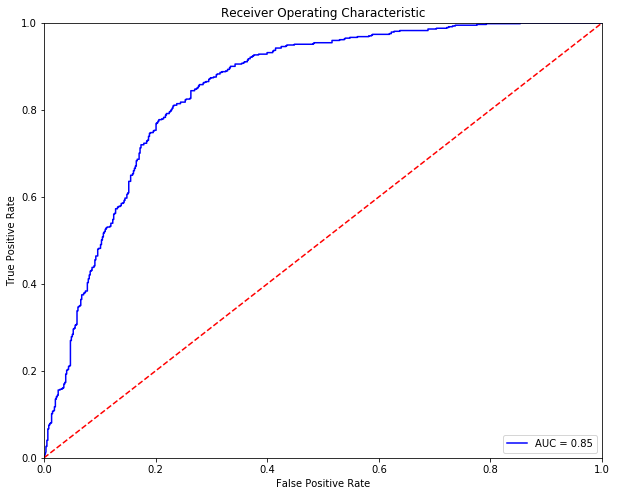

Optimal Threshold is 0.6442828
Accuracy of Logistic Model on training data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False        465   128      593
True         124   447      571
__all__      589   575     1164

In [228]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [229]:
table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [230]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.6min finished


The accuracy of the model on training data is: 0.7929553264604811


Predicted  False  True  __all__
Actual                         
False       1764   553     2317
True         411  1928     2339
__all__     2175  2481     4656

The accuracy of the model on test data is: 0.8006872852233677


Predicted  False  True  __all__
Actual                         
False        458   135      593
True          97   474      571
__all__      555   609     1164

In [231]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

Optimal Threshold is 0.5710494
Accuracy on test data is: 0.8006872852233677


Predicted  False  True  __all__
Actual                         
False        475   118      593
True         114   457      571
__all__      589   575     1164

In [232]:
table_80_50_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [233]:
table_80_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)
table_80_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.802835  1909.0  1829.0  488.0  430.0  0.210617   
LogisticRegression          0.791022  1800.0  1883.0  434.0  539.0  0.187311   
RandomForestClassifier      0.798540  1956.0  1762.0  555.0  383.0  0.239534   
AdaBoostClassifier          0.803909  1989.0  1754.0  563.0  350.0  0.242987   
GradientBoostingClassifier  0.812715  2014.0  1770.0  547.0  325.0  0.236081   
ExtraTreeClassifier         0.799184  1874.0  1847.0  470.0  465.0  0.202849   
BaggingClassifier           0.988402  2315.0  2287.0   30.0   24.0  0.012948   
VotingClassifier            0.906357  2182.0  2038.0  279.0  157.0  0.120414   
Neural Network-1            0.884880  2148.0  1972.0  345.0  191.0  0.148899   
Neural-Network-2            0.792955  1928.0  1764.0  553.0  411.0  0.238671   

                                 FNR  
index                                 
KNeighborsClassifier        0.183839  
LogisticRegression          0.230440  
RandomForestClassifier      0.163745  
AdaBoostClassifier          0.149637  
GradientBoostingClassifier  0.138948  
ExtraTreeClassifier         0.198803  
BaggingClassifier           0.010261  
VotingClassifier            0.067123  
Neural Network-1            0.081659  
Neural-Network-2            0.175716

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.810137  464.0  479.0  114.0  107.0  0.192243   
LogisticRegression          0.807560  444.0  496.0   97.0  127.0  0.163575   
RandomForestClassifier      0.812715  481.0  465.0  128.0   90.0  0.215852   
AdaBoostClassifier          0.804124  487.0  449.0  144.0   84.0  0.242833   
GradientBoostingClassifier  0.801546  485.0  448.0  145.0   86.0  0.244519   
ExtraTreeClassifier         0.804983  453.0  484.0  109.0  118.0  0.183811   
BaggingClassifier           0.805842  476.0  462.0  131.0   95.0  0.220911   
VotingClassifier            0.808419  479.0  462.0  131.0   92.0  0.220911   
Neural Network-1            0.783505  471.0  441.0  152.0  100.0  0.256324   
Neural-Network-2            0.800687  474.0  458.0  135.0   97.0  0.227656   

                                 FNR  
index                                 
KNeighborsClassifier        0.187391  
LogisticRegression          0.222417  
RandomForestClassifier      0.157618  
AdaBoostClassifier          0.147110  
GradientBoostingClassifier  0.150613  
ExtraTreeClassifier         0.206655  
BaggingClassifier           0.166375  
VotingClassifier            0.161121  
Neural Network-1            0.175131  
Neural-Network-2            0.169877

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.811856  461.0  484.0  109.0  110.0  0.183811   
LogisticRegression          0.802405  458.0  476.0  117.0  113.0  0.197302   
RandomForestClassifier      0.807560  460.0  480.0  113.0  111.0  0.190556   
AdaBoostClassifier          0.794674  445.0  480.0  113.0  126.0  0.190556   
GradientBoostingClassifier  0.814433  465.0  483.0  110.0  106.0  0.185497   
ExtraTreeClassifier         0.806701  442.0  497.0   96.0  129.0  0.161889   
BaggingClassifier           0.807560  460.0  480.0  113.0  111.0  0.190556   
VotingClassifier            0.810137  462.0  481.0  112.0  109.0  0.188870   
Neural Network-1            0.783505  447.0  465.0  128.0  124.0  0.215852   
Neural-Network-2            0.800687  457.0  475.0  118.0  114.0  0.198988   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.192644   0.520000  0.872667  
LogisticRegression          0.197898   0.478206  0.878265  
RandomForestClassifier      0.194396   0.636762  0.866667  
AdaBoostClassifier          0.220665   0.509687  0.874753  
GradientBoostingClassifier  0.185639   0.586832  0.880347  
ExtraTreeClassifier         0.225919   0.558824  0.867495  
BaggingClassifier           0.194396   0.560000  0.878099  
VotingClassifier            0.190893   0.545015  0.877263  
Neural Network-1            0.217163   0.644283  0.850052  
Neural-Network-2            0.199650   0.571049  0.880293

#### Random State 10

In [234]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_10.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
columns=X.columns
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP   DP  NAPP  SIP  \
User                                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  4555  135    61  234   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  9874   59    59  112   

                                                     DIP   NREC         PAR  \
User                                                                          
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1180   5030  132.304771   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  2319  11943   72.815373   

                                                          PAS         LEN  \
User                                                                        
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  73.091252  117.687475   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  68.967847   53.259315   

                                                             BYS  \
User                                                               
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  16211.290656   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  33132.043708   

                                                              BYR  0000  0100  \
User                                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  162537.369185   505   537   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   73635.531525   226   124   

                                                    0200  0300  0400  0500  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   405   191   123    63   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   250   322   544  1307   

                                                    0600  0700  0800  0900  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    55    31    60    58   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   803   855   806   600   

                                                    1000  1100  1200  1300  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    68   140   306   137   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   729   512   249   247   

                                                    1400  1500  1600  1700  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   125   191   109   234   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   321   471   643   417   

                                                    1800  1900  2000  2100  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   264   244   361   205   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   561   406   539   466   

                                                    2200  2300  
User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   399   219  
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   373   172

In [235]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
910f8814c078483a86a1030fa3fce449aaeafd169b144fb3131f4c1577252cc3    1
117f95f1e1e2f68a2fcbb99523c4d6b2cd4307a559b566c799ea644cefadcf3b    0
4d648f5609b96f24133ff4ca6473d1bc6ae1e4d8723701c182c856b3eb4abebb    1
d225251f106c00909acb89ddc8766a8221b31e5d48cf3cd0d1dbbb877c47e30a    1
bc061b23b6d1179d337399a71613b80018088f800da352cb1e7d144a3b2d3071    0
a7c5796a8ab263860b6c5eec4327a0ec0b27b9ca4ccf4295c2f92a13e30be632    1
cf239e821992dafc5c241fe455516522cc2d9373e29ae5b98fad3f9b280fc411    1
4141438cff5d7504861d7975f4500b631086713f9f7f346acfc0628dd2731b47    1
2c8825817f4c53b8ae632ed4335e76115fb1e41b414a9bcd6bcf902edad2c2a2    0
Name: Target, dtype: int64

In [236]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [237]:
## Table to store training and test measures
table_80_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [238]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           30  uniform

Accuracy of the  KNN  model for the training data is: 0.8047680412371134

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1800   502     2302
True         407  1947     2354
__all__     2207  2449     4656

Accuracy of the  KNN  model for test data is: 0.7955326460481099

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        474   134      608
True         104   452      556
__all__      578   586     1164

In [239]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

Optimal Threshold is 0.5666666666666667
Accuracy on test data is: 0.7878006872852233


Predicted  False  True  __all__
Actual                         
False        489   119      608
True         128   428      556
__all__      617   547     1164

In [240]:
table_80_50_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [241]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.7966065292096219

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1868   434     2302
True         513  1841     2354
__all__     2381  2275     4656

Accuracy of the  Logistic  model for test data is: 0.7860824742268041

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        493   115      608
True         134   422      556
__all__      627   537     1164

In [242]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

Optimal Threshold is 0.4801561653249656
Accuracy on test data is: 0.7792096219931272


Predicted  False  True  __all__
Actual                         
False        474   134      608
True         123   433      556
__all__      597   567     1164

In [243]:
table_80_50_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [244]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.8051975945017182

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1766   536     2302
True         371  1983     2354
__all__     2137  2519     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.7895189003436426

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        461   147      608
True          98   458      556
__all__      559   605     1164

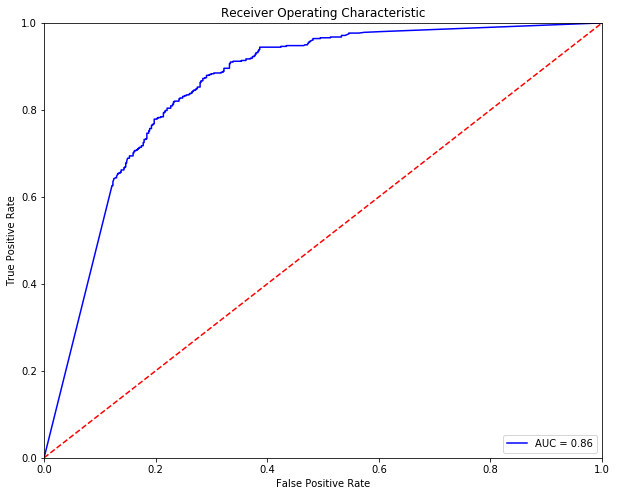

Optimal Threshold is 0.637567969205604
Accuracy on test data is: 0.7860824742268041


Predicted  False  True  __all__
Actual                         
False        479   129      608
True         120   436      556
__all__      599   565     1164

In [245]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [246]:
table_80_50_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

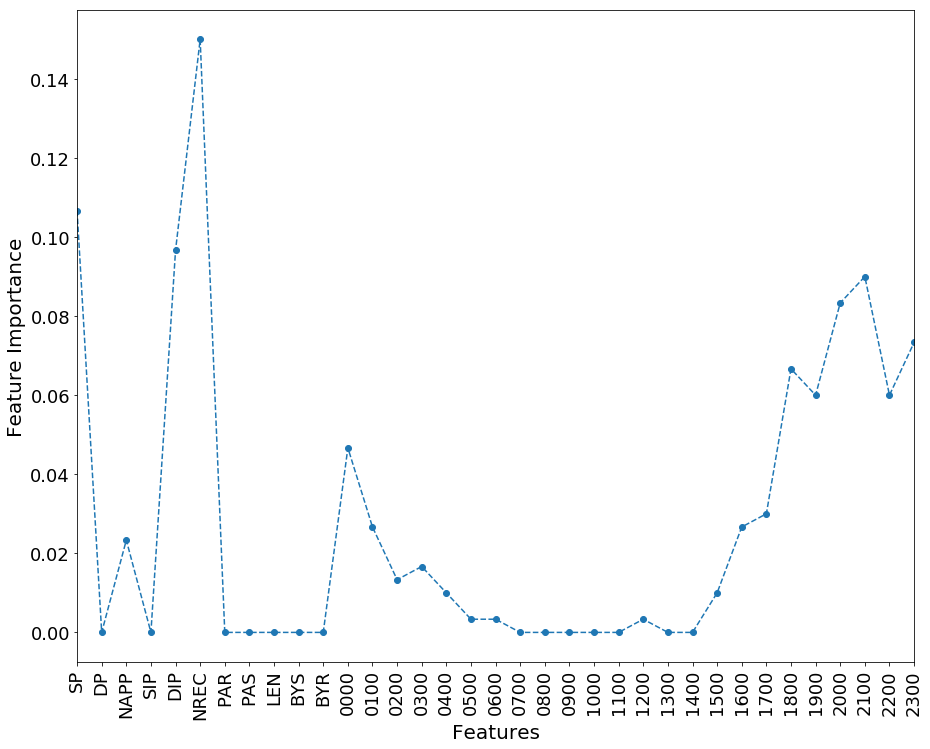

In [247]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [248]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.804553264604811

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1717   585     2302
True         325  2029     2354
__all__     2042  2614     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7852233676975945

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        446   162      608
True          88   468      556
__all__      534   630     1164

In [249]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

Optimal Threshold is 0.5043872704507296
Accuracy on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False        482   126      608
True         126   430      556
__all__      608   556     1164

In [250]:
table_80_50_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [251]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [252]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.1  exponential                15   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8067010309278351

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1753   549     2302
True         351  2003     2354
__all__     2104  2552     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.7920962199312714

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        451   157      608
True          85   471      556
__all__      536   628     1164

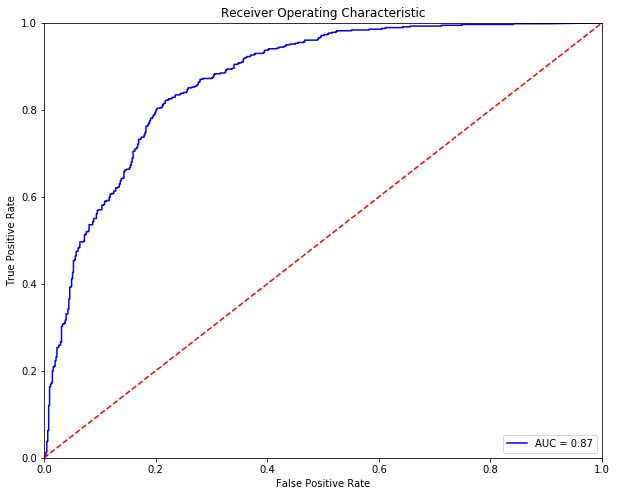

Optimal Threshold is 0.5954851332016018
Accuracy on test data is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False        486   122      608
True         112   444      556
__all__      598   566     1164

In [253]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [254]:
table_80_50_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

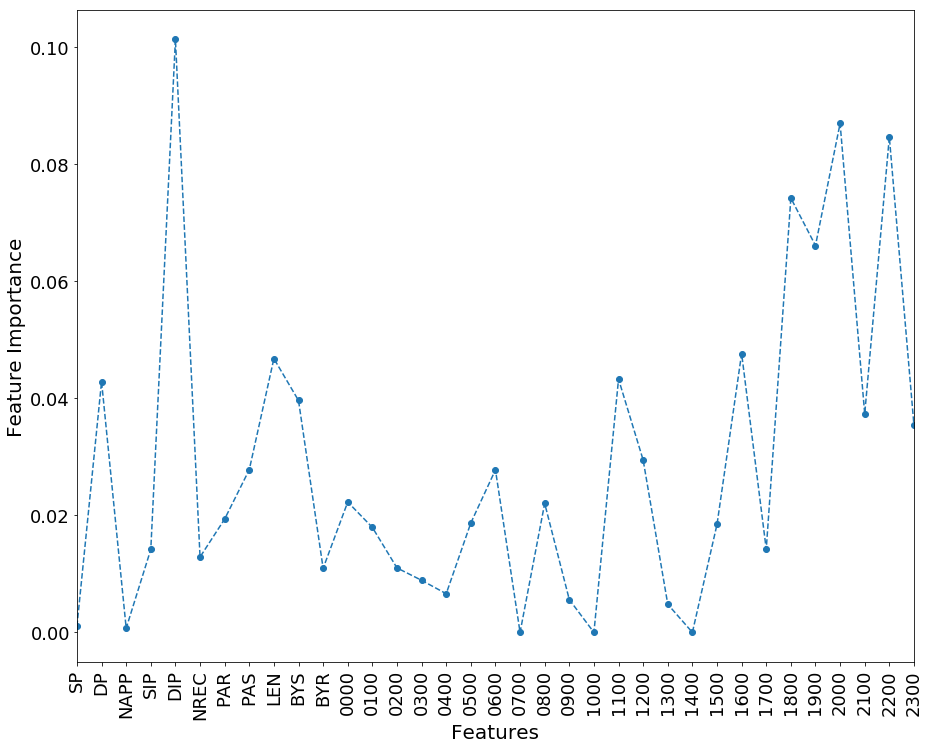

In [255]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [256]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8006872852233677

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1747   555     2302
True         373  1981     2354
__all__     2120  2536     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.7895189003436426

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        458   150      608
True          95   461      556
__all__      553   611     1164

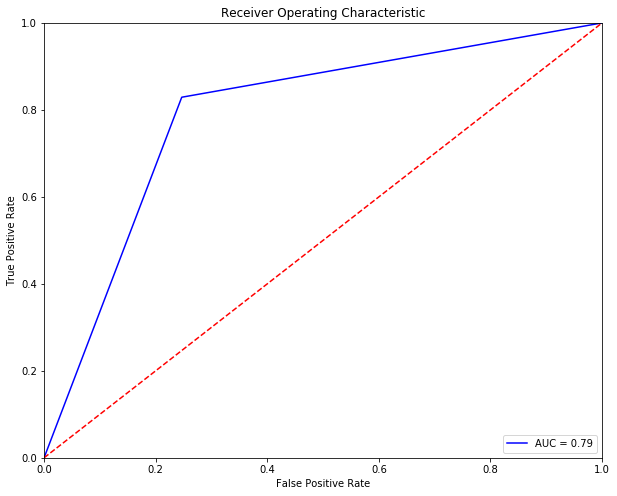

Optimal Threshold is 0.7811514195583596
Accuracy on test data is: 0.5223367697594502


Predicted   0.0  1.0  __all__
Actual                       
0.0         608    0      608
1.0         556    0      556
__all__    1164    0     1164

In [257]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [258]:
table_80_50_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [259]:
%%capture
table_80_50_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

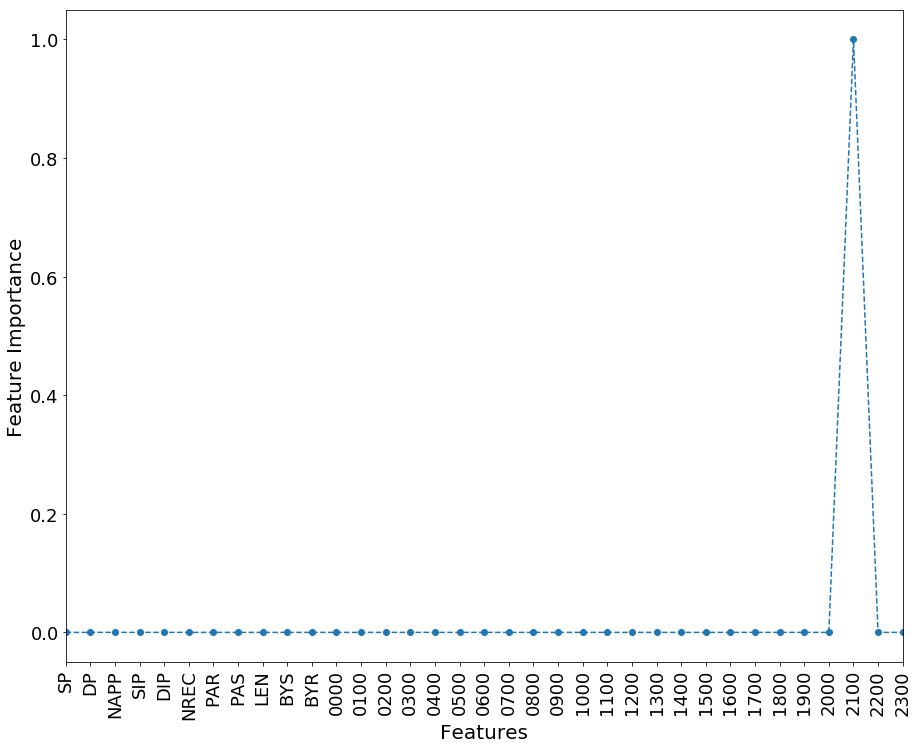

In [260]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [262]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.2          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.8911082474226805

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1966   336     2302
True         171  2183     2354
__all__     2137  2519     4656

Accuracy of the  Bagging  model for test data is: 0.7955326460481099

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        466   142      608
True          96   460      556
__all__      562   602     1164

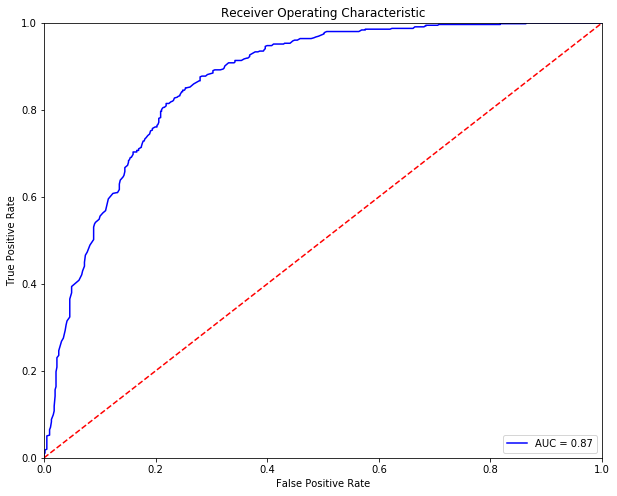

Optimal Threshold is 0.5633333333333334
Accuracy on test data is: 0.7895189003436426


Predicted  False  True  __all__
Actual                         
False        481   127      608
True         118   438      556
__all__      599   565     1164

In [263]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [264]:
table_80_50_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [265]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.8981958762886598


Predicted  False  True  __all__
Actual                         
False       2009   293     2302
True         181  2173     2354
__all__     2190  2466     4656

The test accuracy is: 0.7860824742268041


Predicted  False  True  __all__
Actual                         
False        456   152      608
True          97   459      556
__all__      553   611     1164

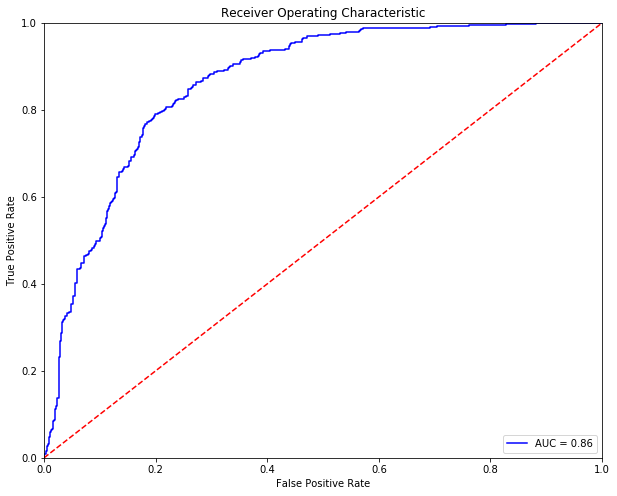

Optimal Threshold is 0.5434917946399714
Accuracy on test data is: 0.7938144329896907


Predicted  False  True  __all__
Actual                         
False        483   125      608
True         115   441      556
__all__      598   566     1164

In [266]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [267]:
table_80_50_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [268]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8865979381443299


Predicted  False  True  __all__
Actual                         
False       2138   164     2302
True         364  1990     2354
__all__     2502  2154     4656

The accuracy of the model on test data is: 0.7508591065292096


Predicted  False  True  __all__
Actual                         
False        481   127      608
True         163   393      556
__all__      644   520     1164

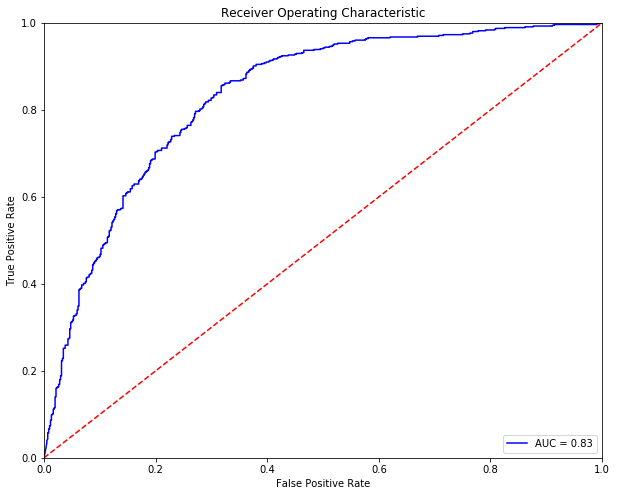

Optimal Threshold is 0.4220677
Accuracy of Logistic Model on training data is: 0.7542955326460481


Predicted  False  True  __all__
Actual                         
False        459   149      608
True         137   419      556
__all__      596   568     1164

In [269]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [270]:
table_80_50_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [271]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.3min finished


The accuracy of the model on training data is: 0.8021907216494846


Predicted  False  True  __all__
Actual                         
False       1744   558     2302
True         363  1991     2354
__all__     2107  2549     4656

The accuracy of the model on test data is: 0.7800687285223368


Predicted  False  True  __all__
Actual                         
False        448   160      608
True          96   460      556
__all__      544   620     1164

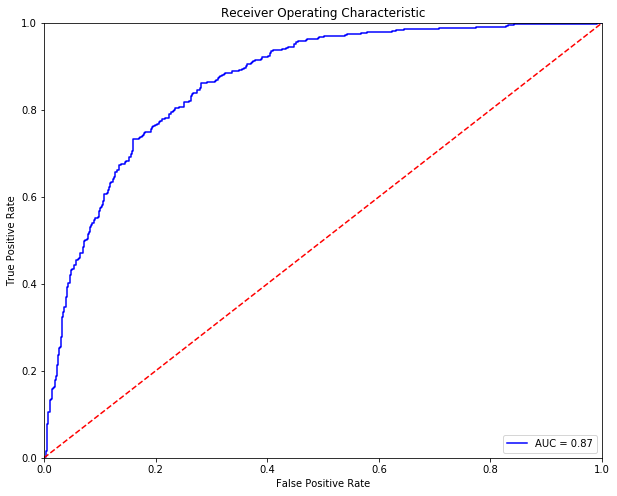

Optimal Threshold is 0.6659364
Accuracy on test data is: 0.7809278350515464


Predicted  False  True  __all__
Actual                         
False        475   133      608
True         122   434      556
__all__      597   567     1164

In [272]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [273]:
table_80_50_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [274]:
table_80_50_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.804768  1947.0  1800.0  502.0  407.0  0.218071   
LogisticRegression          0.796607  1841.0  1868.0  434.0  513.0  0.188532   
RandomForestClassifier      0.805198  1983.0  1766.0  536.0  371.0  0.232841   
AdaBoostClassifier          0.804553  2029.0  1717.0  585.0  325.0  0.254127   
GradientBoostingClassifier  0.806701  2003.0  1753.0  549.0  351.0  0.238488   
ExtraTreeClassifier         0.800687  1981.0  1747.0  555.0  373.0  0.241095   
BaggingClassifier           0.891108  2183.0  1966.0  336.0  171.0  0.145960   
VotingClassifier            0.898196  2173.0  2009.0  293.0  181.0  0.127281   
Neural Network-1            0.886598  1990.0  2138.0  164.0  364.0  0.071242   
Neural-Network-2            0.802191  1991.0  1744.0  558.0  363.0  0.242398   

                                 FNR  
index                                 
KNeighborsClassifier        0.172897  
LogisticRegression          0.217927  
RandomForestClassifier      0.157604  
AdaBoostClassifier          0.138063  
GradientBoostingClassifier  0.149108  
ExtraTreeClassifier         0.158454  
BaggingClassifier           0.072642  
VotingClassifier            0.076890  
Neural Network-1            0.154630  
Neural-Network-2            0.154206

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.795533  452.0  474.0  134.0  104.0  0.220395   
LogisticRegression          0.786082  422.0  493.0  115.0  134.0  0.189145   
RandomForestClassifier      0.789519  458.0  461.0  147.0   98.0  0.241776   
AdaBoostClassifier          0.785223  468.0  446.0  162.0   88.0  0.266447   
GradientBoostingClassifier  0.792096  471.0  451.0  157.0   85.0  0.258224   
ExtraTreeClassifier         0.789519  461.0  458.0  150.0   95.0  0.246711   
BaggingClassifier           0.795533  460.0  466.0  142.0   96.0  0.233553   
VotingClassifier            0.786082  459.0  456.0  152.0   97.0  0.250000   
Neural Network-1            0.750859  393.0  481.0  127.0  163.0  0.208882   
Neural-Network-2            0.780069  460.0  448.0  160.0   96.0  0.263158   

                                 FNR  
index                                 
KNeighborsClassifier        0.187050  
LogisticRegression          0.241007  
RandomForestClassifier      0.176259  
AdaBoostClassifier          0.158273  
GradientBoostingClassifier  0.152878  
ExtraTreeClassifier         0.170863  
BaggingClassifier           0.172662  
VotingClassifier            0.174460  
Neural Network-1            0.293165  
Neural-Network-2            0.172662

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.787801  428.000000  489.000000  119.000000   
LogisticRegression          0.779210  433.000000  474.000000  134.000000   
RandomForestClassifier      0.786082  436.000000  479.000000  129.000000   
AdaBoostClassifier          0.783505  430.000000  482.000000  126.000000   
GradientBoostingClassifier  0.798969  444.000000  486.000000  122.000000   
ExtraTreeClassifier         0.522337  317.580756  290.419244  290.419244   
BaggingClassifier           0.789519  438.000000  481.000000  127.000000   
VotingClassifier            0.793814  441.000000  483.000000  125.000000   
Neural Network-1            0.754296  419.000000  459.000000  149.000000   
Neural-Network-2            0.780928  434.000000  475.000000  133.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        128.000000  0.195724  0.230216   0.566667   
LogisticRegression          123.000000  0.220395  0.221223   0.480156   
RandomForestClassifier      120.000000  0.212171  0.215827   0.637568   
AdaBoostClassifier          126.000000  0.207237  0.226619   0.504387   
GradientBoostingClassifier  112.000000  0.200658  0.201439   0.595485   
ExtraTreeClassifier         265.580756  0.522337  0.477663   0.781151   
BaggingClassifier           118.000000  0.208882  0.212230   0.563333   
VotingClassifier            115.000000  0.205592  0.206835   0.543492   
Neural Network-1            137.000000  0.245066  0.246403   0.422068   
Neural-Network-2            122.000000  0.218750  0.219424   0.665936   

                                 auc  
index                                 
KNeighborsClassifier        0.865729  
LogisticRegression          0.867223  
RandomForestClassifier      0.855473  
AdaBoostClassifier          0.866717  
GradientBoostingClassifier  0.870894  
ExtraTreeClassifier         0.791213  
BaggingClassifier           0.867344  
VotingClassifier            0.864158  
Neural Network-1            0.832309  
Neural-Network-2            0.865235

#### Random State 20

In [275]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_20.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
columns=X.columns
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  994  23    34  106  305   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   38   6     6    6   15   

                                                    NREC         PAR  \
User                                                                   
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  1011  280.252226   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    38   12.368421   

                                                           PAS        LEN  \
User                                                                        
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  164.641939  83.002967   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   10.394737  48.078947   

                                                             BYS  \
User                                                               
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  13987.476756   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   1728.315789   

                                                              BYR  0000  0100  \
User                                                                            
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  359758.589515     0     0   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    9966.815789     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     0     0     0     0   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     0     0     1     2   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...    58    80   103    68   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    1400  1500  1600  1700  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...    62   111   155   226   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    10    15    13     0   

                                                    1800  1900  2000  2100  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...   100    12    15     6   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    2200  2300  
User                                                            
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     8     4  
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0

In [276]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target

display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec429a3f1a997c5ba98    0
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9e976b79fa3511fa48    0
a70d401cfd6804c5711ae7620658b6be8b25483f999cb8bf73e44e011f877dd9    1
22730c54b8e7377fdfa932bf6b6c14741966f73ac8cc7d945fae9264c808afbb    0
47d304146c958a1134c7c928152e25972e4b8e660576183ae7dbca7d7db049db    1
c907dce84bf23f3a6d3557491ca1cd8299c7cf46a3fea156ed6d75cd73982d20    0
2de335ff62784aac8ad3bcb51dd0144c50b2d44135deb94ac508656f17b4111d    1
6686179791f655e042b2f5a0d6ebcdeb209ff33c0a2603941f4e0358e01390c1    0
4ada88478afa02b860f7d645393828b21da8a8cbd0e8fdd37b1c56a45de94f5c    0
757f0a16eec1045dfec4e23d7f6cd4a3f219bc6ba8f723741238f948eebb9681    0
Name: Target, dtype: int64

In [277]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [278]:
## Table to store training and test measures
table_80_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [279]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           30  uniform

Accuracy of the  KNN  model for the training data is: 0.8011168384879725

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1860   497     2357
True         429  1870     2299
__all__     2289  2367     4656

Accuracy of the  KNN  model for test data is: 0.8067010309278351

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        448   105      553
True         120   491      611
__all__      568   596     1164

In [280]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

Optimal Threshold is 0.5333333333333333
Accuracy on test data is: 0.7920962199312714


Predicted  False  True  __all__
Actual                         
False        455    98      553
True         144   467      611
__all__      599   565     1164

In [281]:
table_80_50_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [282]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.7858676975945017

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1904   453     2357
True         544  1755     2299
__all__     2448  2208     4656

Accuracy of the  Logistic  model for test data is: 0.7998281786941581

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        462    91      553
True         142   469      611
__all__      604   560     1164

In [283]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

Optimal Threshold is 0.4693383719351701
Accuracy on test data is: 0.8067010309278351


Predicted  False  True  __all__
Actual                         
False        447   106      553
True         119   492      611
__all__      566   598     1164

In [284]:
table_80_50_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [285]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7981099656357389

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1797   560     2357
True         380  1919     2299
__all__     2177  2479     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.813573883161512

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        443   110      553
True         107   504      611
__all__      550   614     1164

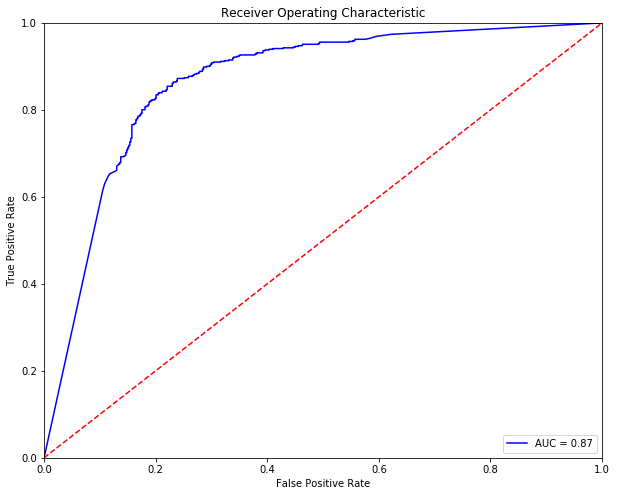

Optimal Threshold is 0.5411195605659256
Accuracy on test data is: 0.8127147766323024


Predicted  False  True  __all__
Actual                         
False        450   103      553
True         115   496      611
__all__      565   599     1164

In [286]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [287]:
table_80_50_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [288]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [289]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8021907216494846

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1789   568     2357
True         353  1946     2299
__all__     2142  2514     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8195876288659794

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        443   110      553
True         100   511      611
__all__      543   621     1164

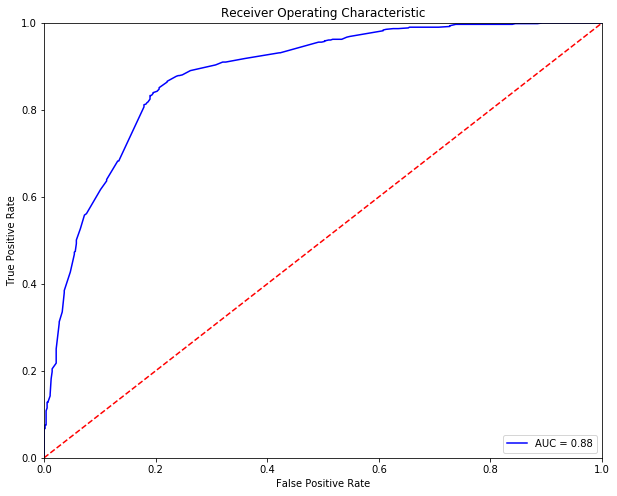

Optimal Threshold is 0.5036163227993056
Accuracy on test data is: 0.8152920962199313


Predicted  False  True  __all__
Actual                         
False        452   101      553
True         114   497      611
__all__      566   598     1164

In [290]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [291]:
table_80_50_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [292]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [293]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1           100             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8142182130584192

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1825   532     2357
True         333  1966     2299
__all__     2158  2498     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.813573883161512

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        437   116      553
True         101   510      611
__all__      538   626     1164

In [294]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

Optimal Threshold is 0.5510091348584801
Accuracy on test data is: 0.8144329896907216


Predicted  False  True  __all__
Actual                         
False        451   102      553
True         114   497      611
__all__      565   599     1164

In [295]:
table_80_50_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [296]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [297]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.7957474226804123

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1770   587     2357
True         364  1935     2299
__all__     2134  2522     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.802405498281787

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        429   124      553
True         106   505      611
__all__      535   629     1164

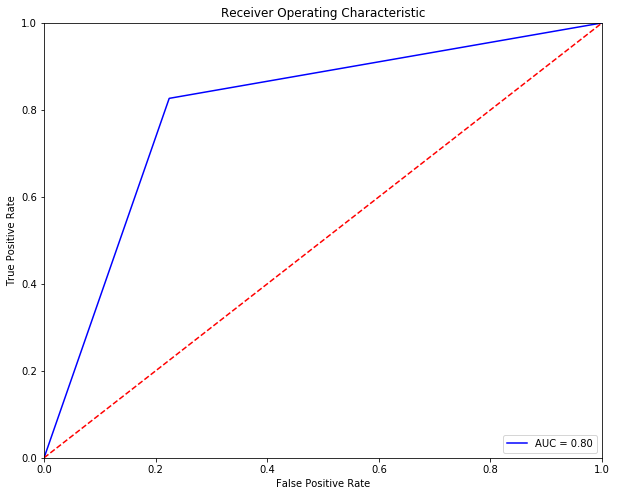

Optimal Threshold is 0.767248215701824
Accuracy on test data is: 0.47508591065292094


Predicted   0.0  1.0  __all__
Actual                       
0.0         553    0      553
1.0         611    0      611
__all__    1164    0     1164

In [298]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [299]:
table_80_50_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [300]:
%%capture
table_80_50_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

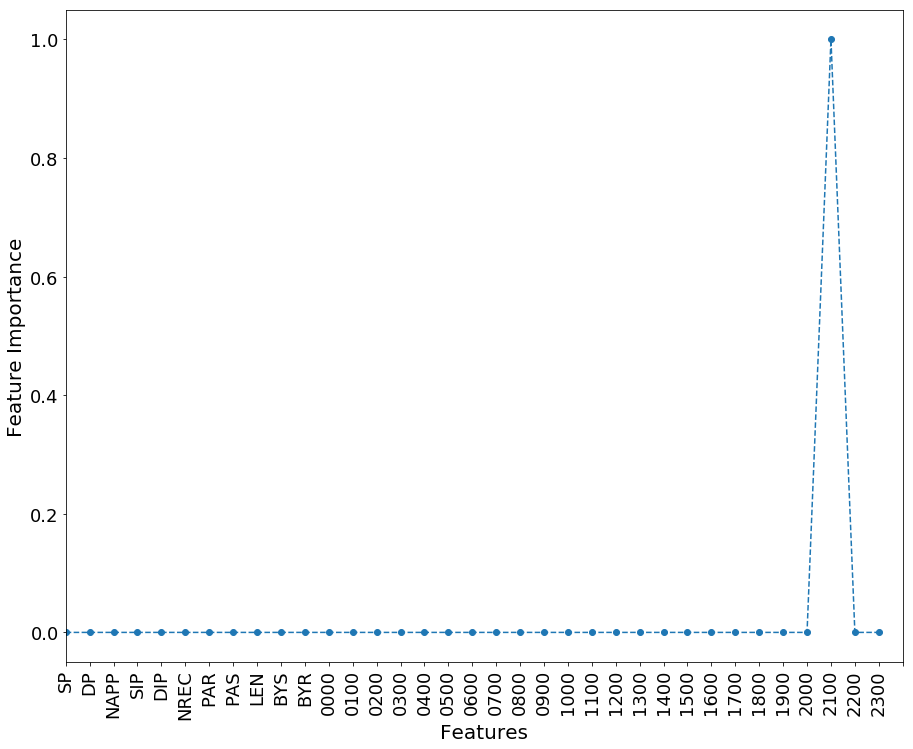

In [301]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [302]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.8969072164948454

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2044   313     2357
True         167  2132     2299
__all__     2211  2445     4656

Accuracy of the  Bagging  model for test data is: 0.8152920962199313

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        435   118      553
True          97   514      611
__all__      532   632     1164

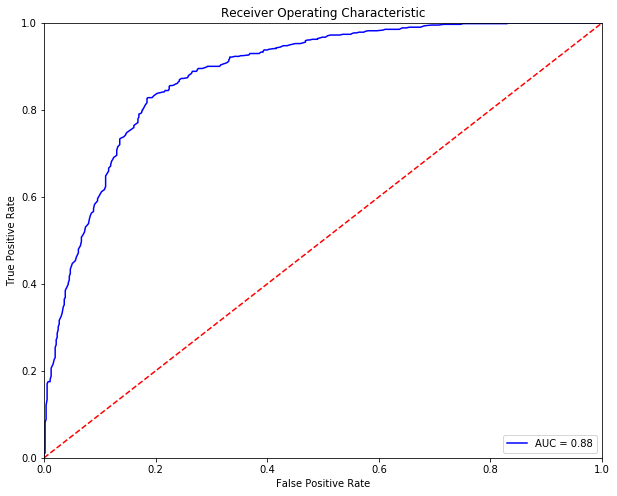

Optimal Threshold is 0.5433333333333333
Accuracy on test data is: 0.8152920962199313


Predicted  False  True  __all__
Actual                         
False        452   101      553
True         114   497      611
__all__      566   598     1164

In [303]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [304]:
table_80_50_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [305]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9070017182130584


Predicted  False  True  __all__
Actual                         
False       2104   253     2357
True         180  2119     2299
__all__     2284  2372     4656

The test accuracy is: 0.8161512027491409


Predicted  False  True  __all__
Actual                         
False        445   108      553
True         106   505      611
__all__      551   613     1164

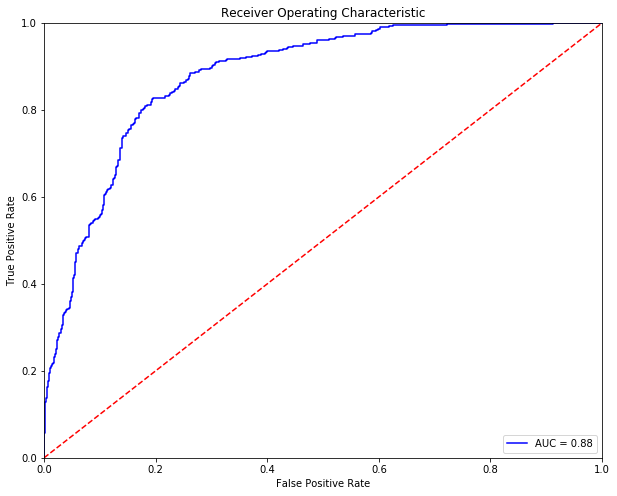

Optimal Threshold is 0.512581987049271
Accuracy on test data is: 0.8109965635738832


Predicted  False  True  __all__
Actual                         
False        449   104      553
True         116   495      611
__all__      565   599     1164

In [306]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [307]:
table_80_50_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [308]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8917525773195877


Predicted  False  True  __all__
Actual                         
False       2124   233     2357
True         271  2028     2299
__all__     2395  2261     4656

The accuracy of the model on test data is: 0.7457044673539519


Predicted  False  True  __all__
Actual                         
False        423   130      553
True         166   445      611
__all__      589   575     1164

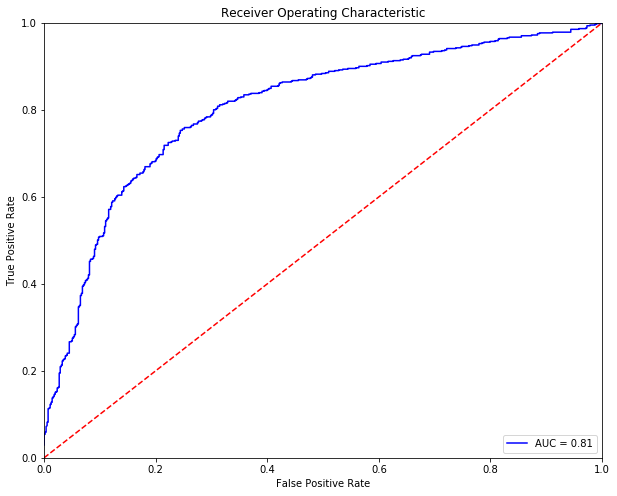

Optimal Threshold is 0.46968228
Accuracy of Logistic Model on training data is: 0.7534364261168385


Predicted  False  True  __all__
Actual                         
False        417   136      553
True         151   460      611
__all__      568   596     1164

In [309]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [310]:
table_80_50_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [311]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.1min finished


The accuracy of the model on training data is: 0.7899484536082474


Predicted  False  True  __all__
Actual                         
False       1651   706     2357
True         272  2027     2299
__all__     1923  2733     4656

The accuracy of the model on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False        400   153      553
True          78   533      611
__all__      478   686     1164

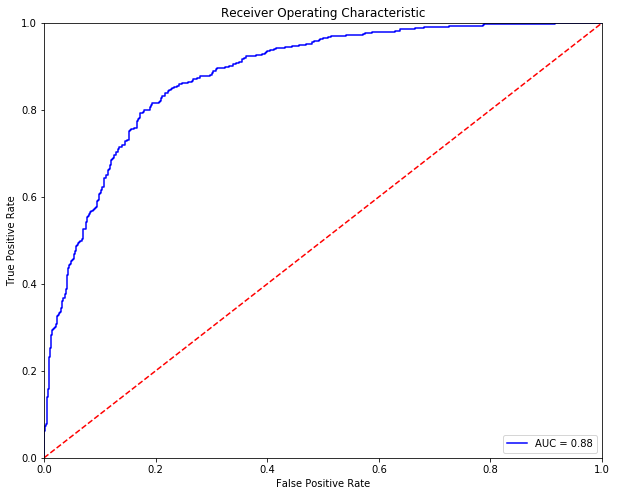

Optimal Threshold is 0.6505041
Accuracy on test data is: 0.8084192439862543


Predicted  False  True  __all__
Actual                         
False        448   105      553
True         118   493      611
__all__      566   598     1164

In [312]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [313]:
table_80_50_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [314]:
table_80_50_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.801117  1870.0  1860.0  497.0  429.0  0.210861   
LogisticRegression          0.785868  1755.0  1904.0  453.0  544.0  0.192193   
RandomForestClassifier      0.798110  1919.0  1797.0  560.0  380.0  0.237590   
AdaBoostClassifier          0.802191  1946.0  1789.0  568.0  353.0  0.240984   
GradientBoostingClassifier  0.814218  1966.0  1825.0  532.0  333.0  0.225711   
ExtraTreeClassifier         0.795747  1935.0  1770.0  587.0  364.0  0.249045   
BaggingClassifier           0.896907  2132.0  2044.0  313.0  167.0  0.132796   
VotingClassifier            0.907002  2119.0  2104.0  253.0  180.0  0.107340   
Neural Network-1            0.891753  2028.0  2124.0  233.0  271.0  0.098854   
Neural-Network-2            0.789948  2027.0  1651.0  706.0  272.0  0.299533   

                                 FNR  
index                                 
KNeighborsClassifier        0.186603  
LogisticRegression          0.236625  
RandomForestClassifier      0.165289  
AdaBoostClassifier          0.153545  
GradientBoostingClassifier  0.144846  
ExtraTreeClassifier         0.158330  
BaggingClassifier           0.072640  
VotingClassifier            0.078295  
Neural Network-1            0.117877  
Neural-Network-2            0.118312

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.806701  491.0  448.0  105.0  120.0  0.189873   
LogisticRegression          0.799828  469.0  462.0   91.0  142.0  0.164557   
RandomForestClassifier      0.813574  504.0  443.0  110.0  107.0  0.198915   
AdaBoostClassifier          0.819588  511.0  443.0  110.0  100.0  0.198915   
GradientBoostingClassifier  0.813574  510.0  437.0  116.0  101.0  0.209765   
ExtraTreeClassifier         0.802405  505.0  429.0  124.0  106.0  0.224231   
BaggingClassifier           0.815292  514.0  435.0  118.0   97.0  0.213382   
VotingClassifier            0.816151  505.0  445.0  108.0  106.0  0.195298   
Neural Network-1            0.745704  445.0  423.0  130.0  166.0  0.235081   
Neural-Network-2            0.801546  533.0  400.0  153.0   78.0  0.276673   

                                 FNR  
index                                 
KNeighborsClassifier        0.196399  
LogisticRegression          0.232406  
RandomForestClassifier      0.175123  
AdaBoostClassifier          0.163666  
GradientBoostingClassifier  0.165303  
ExtraTreeClassifier         0.173486  
BaggingClassifier           0.158756  
VotingClassifier            0.173486  
Neural Network-1            0.271686  
Neural-Network-2            0.127660

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.792096  467.000000  455.000000   98.000000   
LogisticRegression          0.806701  492.000000  447.000000  106.000000   
RandomForestClassifier      0.812715  496.000000  450.000000  103.000000   
AdaBoostClassifier          0.815292  497.000000  452.000000  101.000000   
GradientBoostingClassifier  0.814433  497.000000  451.000000  102.000000   
ExtraTreeClassifier         0.475086  262.722509  290.277491  290.277491   
BaggingClassifier           0.815292  497.000000  452.000000  101.000000   
VotingClassifier            0.810997  495.000000  449.000000  104.000000   
Neural Network-1            0.753436  460.000000  417.000000  136.000000   
Neural-Network-2            0.808419  493.000000  448.000000  105.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        144.000000  0.177215  0.235679   0.533333   
LogisticRegression          119.000000  0.191682  0.194763   0.469338   
RandomForestClassifier      115.000000  0.186257  0.188216   0.541120   
AdaBoostClassifier          114.000000  0.182640  0.186579   0.503616   
GradientBoostingClassifier  114.000000  0.184448  0.186579   0.551009   
ExtraTreeClassifier         320.722509  0.475086  0.524914   0.767248   
BaggingClassifier           114.000000  0.182640  0.186579   0.543333   
VotingClassifier            116.000000  0.188065  0.189853   0.512582   
Neural Network-1            151.000000  0.245931  0.247136   0.469682   
Neural-Network-2            118.000000  0.189873  0.193126   0.650504   

                                 auc  
index                                 
KNeighborsClassifier        0.877527  
LogisticRegression          0.880559  
RandomForestClassifier      0.865760  
AdaBoostClassifier          0.882666  
GradientBoostingClassifier  0.885329  
ExtraTreeClassifier         0.801141  
BaggingClassifier           0.884645  
VotingClassifier            0.879011  
Neural Network-1            0.805390  
Neural-Network-2            0.881332

In [315]:
table_80_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [316]:
table_80_50_train_avg['accuracy']=(table_80_50_train['accuracy']+table_80_50_10_train['accuracy']+table_80_50_20_train['accuracy'])/3.0
table_80_50_train_avg['FPR']=(table_80_50_train['FPR']+table_80_50_10_train['FPR']+table_80_50_20_train['FPR'])/3.0
table_80_50_train_avg['FNR']=(table_80_50_train['FNR']+table_80_50_10_train['FNR']+table_80_50_20_train['FNR'])/3.0

In [317]:
table_80_50_test_avg['accuracy']=(table_80_50_test['accuracy']+table_80_50_10_test['accuracy']+table_80_50_20_test['accuracy'])/3.0
table_80_50_test_avg['FPR']=(table_80_50_test['FPR']+table_80_50_10_test['FPR']+table_80_50_20_test['FPR'])/3.0
table_80_50_test_avg['FNR']=(table_80_50_test['FNR']+table_80_50_10_test['FNR']+table_80_50_20_test['FNR'])/3.0

In [318]:
table_80_50_test_roc_avg['accuracy']=(table_80_50_test_roc['accuracy']+table_80_50_10_test_roc['accuracy']+table_80_50_20_test_roc['accuracy'])/3.0
table_80_50_test_roc_avg['FPR']=(table_80_50_test_roc['FPR']+table_80_50_10_test_roc['FPR']+table_80_50_20_test_roc['FPR'])/3.0
table_80_50_test_roc_avg['FNR']=(table_80_50_test_roc['FNR']+table_80_50_10_test_roc['FNR']+table_80_50_20_test_roc['FNR'])/3.0
table_80_50_test_roc_avg['auc']=(table_80_50_test_roc['auc']+table_80_50_10_test_roc['auc']+table_80_50_20_test_roc['auc'])/3.0

In [319]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.802907  0.213183  0.181113
LogisticRegression          0.791166  0.189345  0.228331
RandomForestClassifier      0.800616  0.236655  0.162213
AdaBoostClassifier          0.803551  0.246033  0.147081
GradientBoostingClassifier  0.811211  0.233427  0.144301
ExtraTreeClassifier         0.798540  0.230996  0.171862
BaggingClassifier           0.925473  0.097235  0.051848
VotingClassifier            0.903852  0.118345  0.074103
Neural Network-1            0.887743  0.106332  0.118056
Neural-Network-2            0.795032  0.260201  0.149411

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.804124  0.200837  0.190280
LogisticRegression          0.797824  0.172426  0.231943
RandomForestClassifier      0.805269  0.218848  0.169667
AdaBoostClassifier          0.802978  0.236065  0.156350
GradientBoostingClassifier  0.802405  0.237503  0.156264
ExtraTreeClassifier         0.798969  0.218251  0.183668
BaggingClassifier           0.805556  0.222615  0.165931
VotingClassifier            0.803551  0.222070  0.169689
Neural Network-1            0.760023  0.233429  0.246661
Neural-Network-2            0.794101  0.255829  0.156733

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.797251  0.185583  0.219513  0.871974
LogisticRegression          0.796105  0.203126  0.204628  0.875349
RandomForestClassifier      0.802119  0.196328  0.199480  0.862633
AdaBoostClassifier          0.797824  0.193478  0.211288  0.874712
GradientBoostingClassifier  0.809278  0.190201  0.191219  0.878856
ExtraTreeClassifier         0.601375  0.386437  0.409499  0.819950
BaggingClassifier           0.804124  0.194026  0.197735  0.876696
VotingClassifier            0.804983  0.194176  0.195860  0.873478
Neural Network-1            0.763746  0.235616  0.236901  0.829250
Neural-Network-2            0.796678  0.202537  0.204067  0.875620

###  <a id='1.B' style="text-decoration : none; color : #000000;">B. 70:30 Train Test Split</a>
#### Random State 0

In [320]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_0.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
columns=X.columns
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP   DIP  \
User                                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  6855  69    70  102  1503   
3c45372db59b842faec38488806b64c282270417f6755ba...    13   4     4    3     8   

                                                    NREC         PAR  \
User                                                                   
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  7494  182.050440   
3c45372db59b842faec38488806b64c282270417f6755ba...    13   97.769231   

                                                          PAS         LEN  \
User                                                                        
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  70.107419  109.414331   
3c45372db59b842faec38488806b64c282270417f6755ba...  90.000000   88.461538   

                                                             BYS  \
User                                                               
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  18672.453563   
3c45372db59b842faec38488806b64c282270417f6755ba...   7757.153846   

                                                              BYR  0000  0100  \
User                                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  223011.614091   319   339   
3c45372db59b842faec38488806b64c282270417f6755ba...  120738.153846     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   265   588   981   782   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   183   139    87   167   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...    70   122   149   313   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     5     0   

                                                    1400  1500  1600  1700  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   268   399   825   309   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     1     7     0   

                                                    1800  1900  2000  2100  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   223   264   229   125   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    2200  2300  
User                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   126   222  
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0

In [321]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target

display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953    1
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402    0
653fe3e24024826e008a512560be7abb15b06bd46e89ba4159dbdc6b8b5983c3    0
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107    1
ac87be58a25e50356ef8d66135f93392ac6c40f3c7b557e7c16f663ce168e9fc    1
8df0db56b5bb9ff4cc7b00413a2a4c211db8a7d9d4dcf78a73cd79904bc395cd    1
e3a357295e4a68d988b39f98f9751f6ea4098f7443b6ca0fff6f5d6c804d36f5    0
481ba91002ea25e7b1470715bc8dbb26dff02ad090bba34cc8cc3188e4a49813    1
9bf5181f7d61d1d2357434a6f710f3630c854a1b692dc7f6f3d3b2697f1a983d    1
e5615a3ffc7932b6beb79fdbb4adca13f9a0fb79f3210a0ef275419005e37268    1
Name: Target, dtype: int64

In [322]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [323]:
## Table to store training and test measures
table_70_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [324]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2028     0     2028
True           0  2046     2046
__all__     2028  2046     4074

Accuracy of the  KNN  model for test data is: 0.8098510882016037

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        705   177      882
True         155   709      864
__all__      860   886     1746

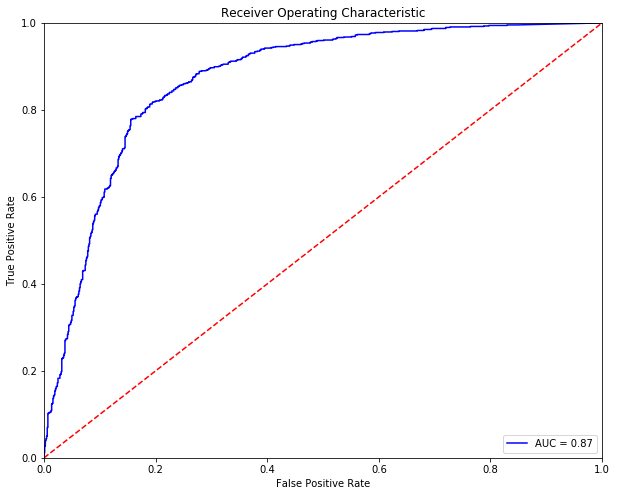

Optimal Threshold is 0.5203343283746086
Accuracy on test data is: 0.8109965635738832


Predicted  False  True  __all__
Actual                         
False        715   167      882
True         163   701      864
__all__      878   868     1746

In [325]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [326]:
table_70_50_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [327]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.7881688757977418

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1644   384     2028
True         479  1567     2046
__all__     2123  1951     4074

Accuracy of the  Logistic  model for test data is: 0.8018327605956472

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        732   150      882
True         196   668      864
__all__      928   818     1746

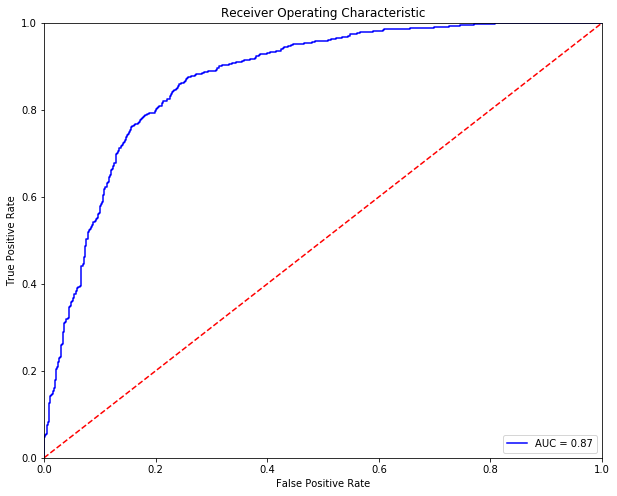

Optimal Threshold is 0.4742513892155784
Accuracy on test data is: 0.7995418098510882


Predicted  False  True  __all__
Actual                         
False        706   176      882
True         174   690      864
__all__      880   866     1746

In [328]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [329]:
table_70_50_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [330]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7979872361315661

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1535   493     2028
True         330  1716     2046
__all__     1865  2209     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.8098510882016037

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        683   199      882
True         133   731      864
__all__      816   930     1746

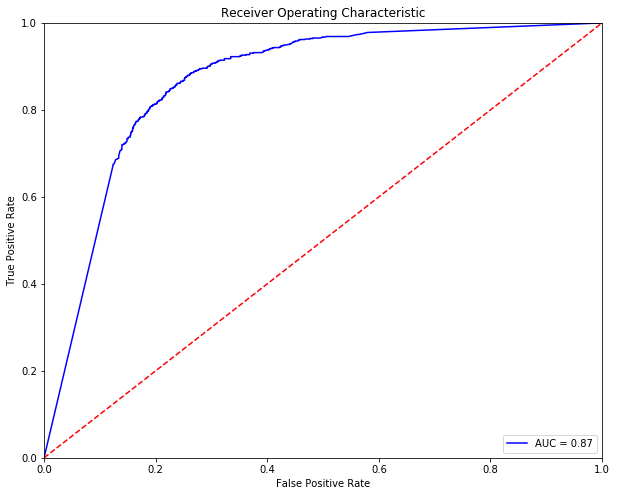

Optimal Threshold is 0.6428839674972495
Accuracy on test data is: 0.8081328751431844


Predicted  False  True  __all__
Actual                         
False        713   169      882
True         166   698      864
__all__      879   867     1746

In [331]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [332]:
table_70_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

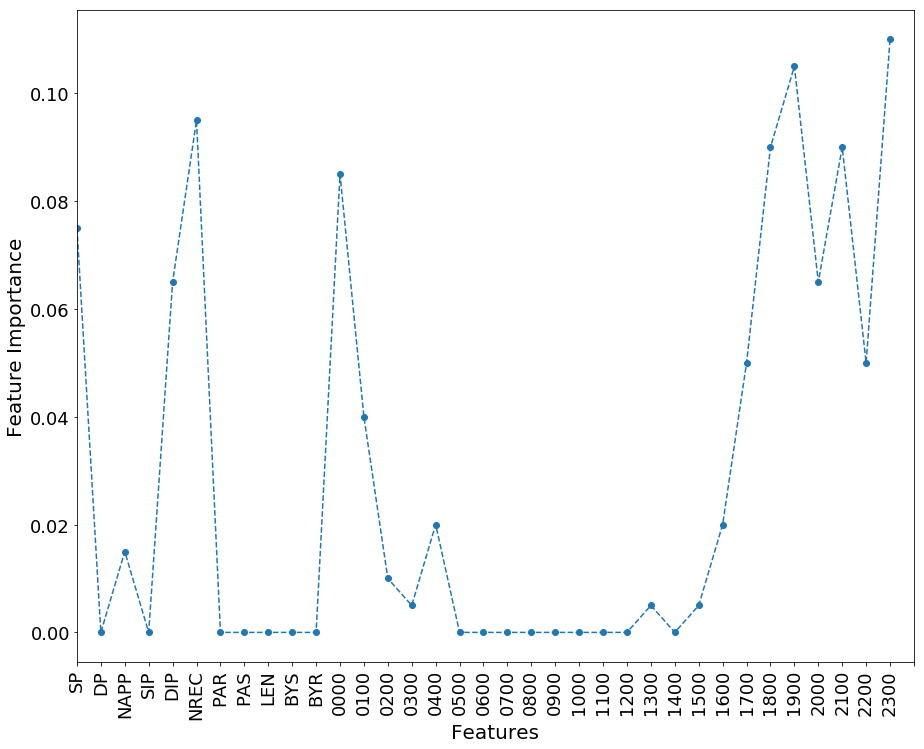

In [333]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [334]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.802405498281787

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1526   502     2028
True         303  1743     2046
__all__     1829  2245     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.806987399770905

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        667   215      882
True         122   742      864
__all__      789   957     1746

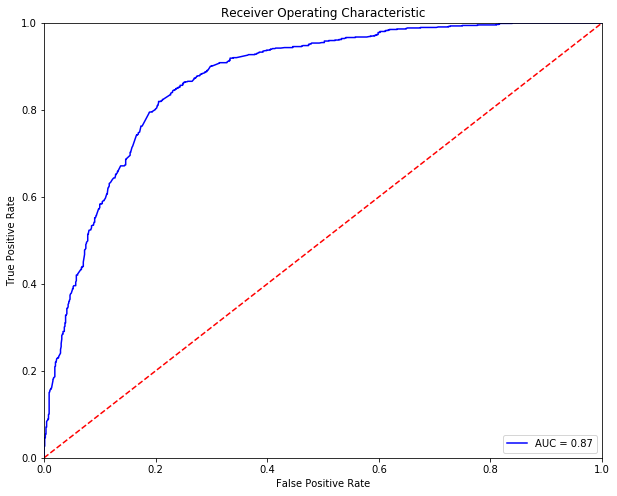

Optimal Threshold is 0.5099708240338869
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        711   171      882
True         176   688      864
__all__      887   859     1746

In [335]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [336]:
table_70_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

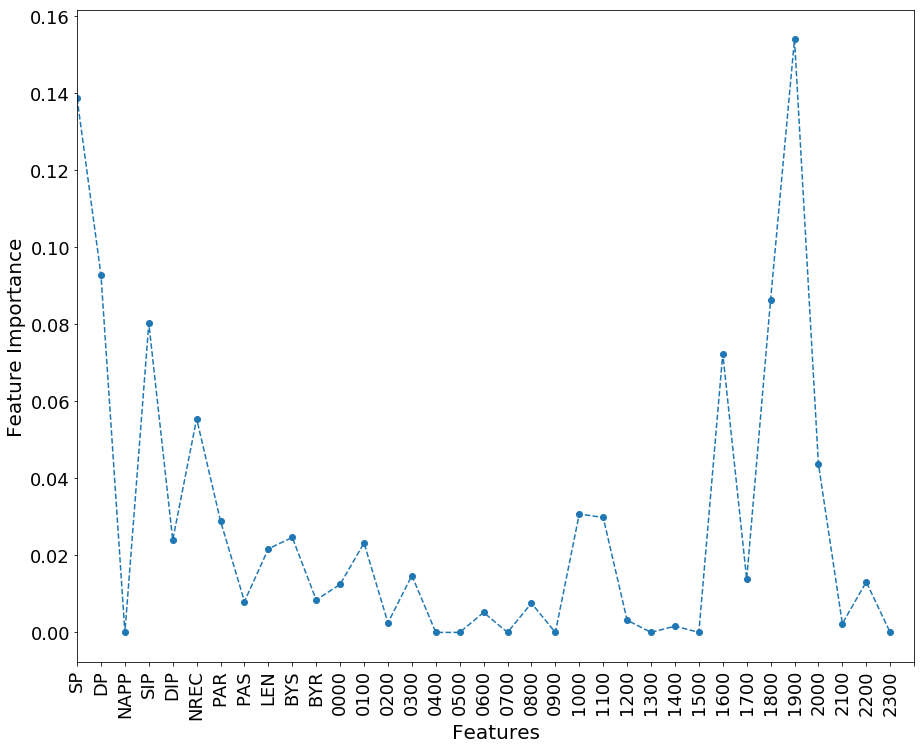

In [337]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [338]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse            0.1  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2            50             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8109965635738832

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1540   488     2028
True         282  1764     2046
__all__     1822  2252     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8127147766323024

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        677   205      882
True         122   742      864
__all__      799   947     1746

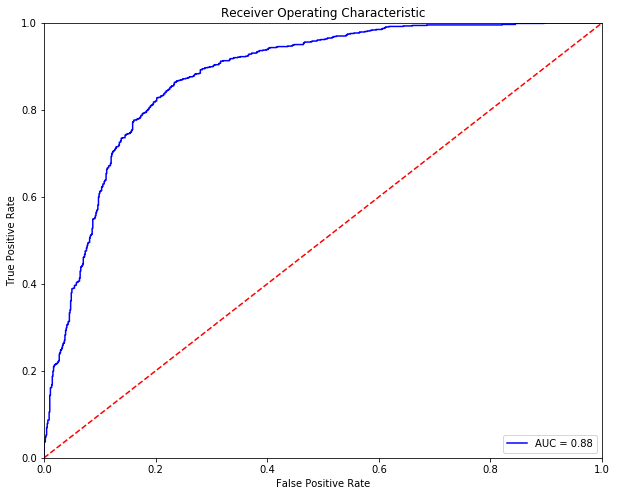

Optimal Threshold is 0.5892052711296358
Accuracy on test data is: 0.8087056128293242


Predicted  False  True  __all__
Actual                         
False        714   168      882
True         166   698      864
__all__      880   866     1746

In [339]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [340]:
table_70_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

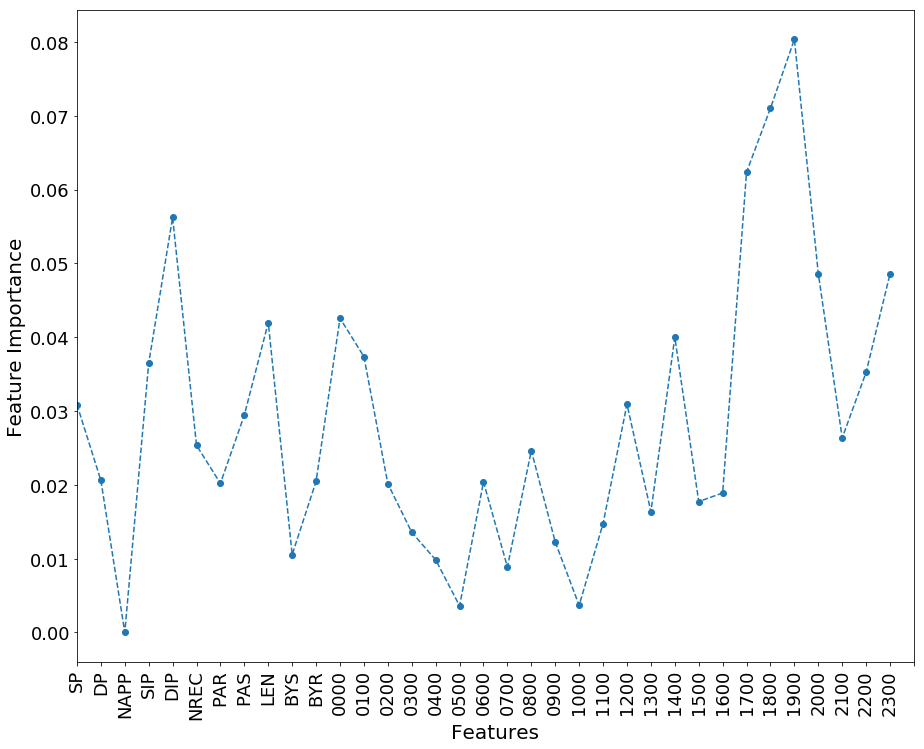

In [341]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [342]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0    random

Accuracy of the  Extra Decision Tree  model for the training data is: 0.7950417280314187

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1550   478     2028
True         357  1689     2046
__all__     1907  2167     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.8127147766323024

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        703   179      882
True         148   716      864
__all__      851   895     1746

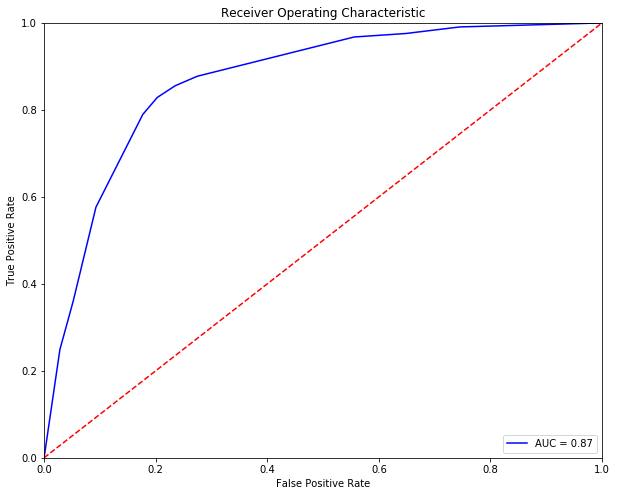

Optimal Threshold is 0.6666666666666666
Accuracy on test data is: 0.8064146620847652


Predicted  False  True  __all__
Actual                         
False        726   156      882
True         182   682      864
__all__      908   838     1746

In [343]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [344]:
table_70_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [345]:
%%capture
table_70_50_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

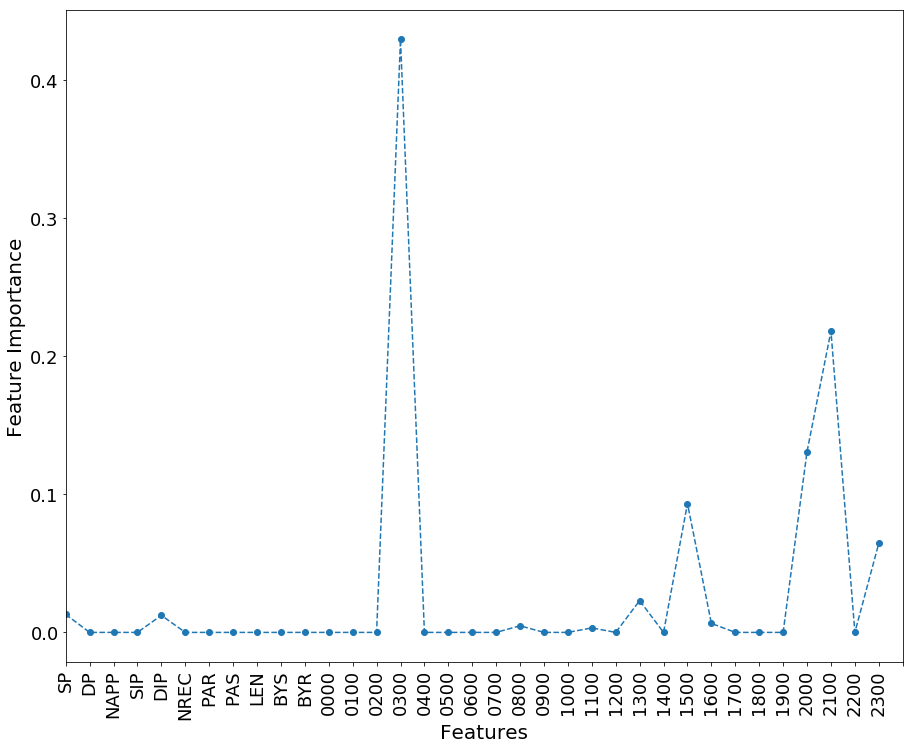

In [346]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [347]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.8924889543446245

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1735   293     2028
True         145  1901     2046
__all__     1880  2194     4074

Accuracy of the  Bagging  model for test data is: 0.8127147766323024

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        686   196      882
True         131   733      864
__all__      817   929     1746

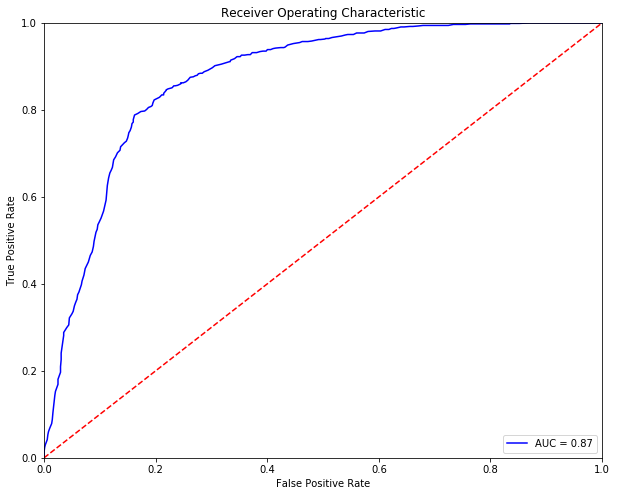

Optimal Threshold is 0.57
Accuracy on test data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False        717   165      882
True         168   696      864
__all__      885   861     1746

In [348]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [349]:
table_70_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [350]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9047619047619048


Predicted  False  True  __all__
Actual                         
False       1785   243     2028
True         145  1901     2046
__all__     1930  2144     4074

The test accuracy is: 0.800114547537228


Predicted  False  True  __all__
Actual                         
False        685   197      882
True         152   712      864
__all__      837   909     1746

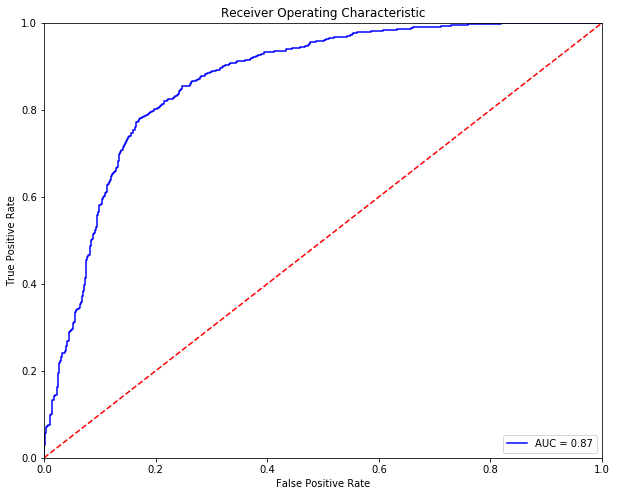

Optimal Threshold is 0.544132851173606
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        708   174      882
True         173   691      864
__all__      881   865     1746

In [351]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [352]:
table_70_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [353]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.885861561119293


Predicted  False  True  __all__
Actual                         
False       1836   192     2028
True         273  1773     2046
__all__     2109  1965     4074

The accuracy of the model on test data is: 0.786368843069874


Predicted  False  True  __all__
Actual                         
False        703   179      882
True         194   670      864
__all__      897   849     1746

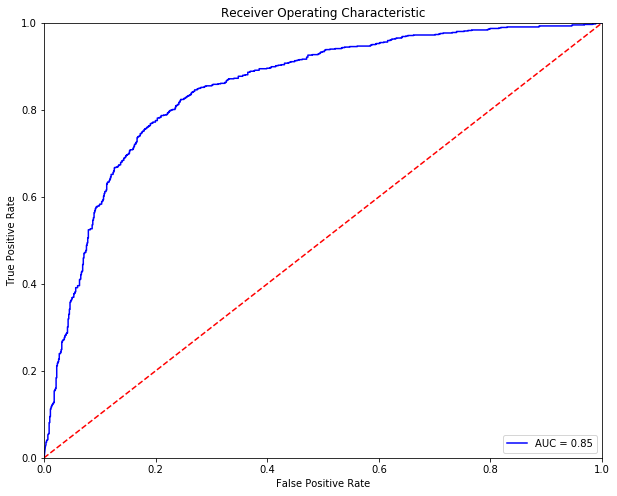

Optimal Threshold is 0.4701945
Accuracy of Logistic Model on training data is: 0.7869415807560137


Predicted  False  True  __all__
Actual                         
False        694   188      882
True         184   680      864
__all__      878   868     1746

In [354]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [355]:
table_70_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [356]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.6min finished


The accuracy of the model on training data is: 0.792341678939617


Predicted  False  True  __all__
Actual                         
False       1510   518     2028
True         328  1718     2046
__all__     1838  2236     4074

The accuracy of the model on test data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False        674   208      882
True         125   739      864
__all__      799   947     1746

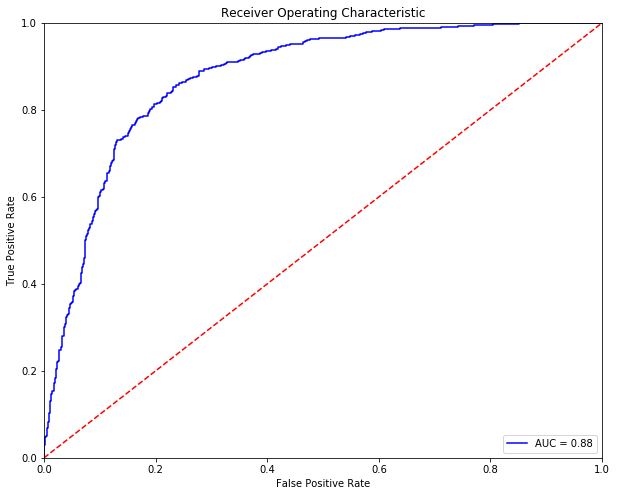

Optimal Threshold is 0.64054525
Accuracy on test data is: 0.8052691867124857


Predicted  False  True  __all__
Actual                         
False        711   171      882
True         169   695      864
__all__      880   866     1746

In [357]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [358]:
table_70_50_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [359]:
table_70_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_test.set_index(['index'],drop=True,inplace=True)
table_70_50_train.set_index(['index'],drop=True,inplace=True)
table_70_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2046.0  2028.0    0.0    0.0  0.000000   
LogisticRegression          0.788169  1567.0  1644.0  384.0  479.0  0.189349   
RandomForestClassifier      0.797987  1716.0  1535.0  493.0  330.0  0.243097   
AdaBoostClassifier          0.802405  1743.0  1526.0  502.0  303.0  0.247535   
GradientBoostingClassifier  0.810997  1764.0  1540.0  488.0  282.0  0.240631   
ExtraTreeClassifier         0.795042  1689.0  1550.0  478.0  357.0  0.235700   
BaggingClassifier           0.892489  1901.0  1735.0  293.0  145.0  0.144477   
VotingClassifier            0.904762  1901.0  1785.0  243.0  145.0  0.119822   
Neural Network-1            0.885862  1773.0  1836.0  192.0  273.0  0.094675   
Neural-Network-2            0.792342  1718.0  1510.0  518.0  328.0  0.255424   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.234115  
RandomForestClassifier      0.161290  
AdaBoostClassifier          0.148094  
GradientBoostingClassifier  0.137830  
ExtraTreeClassifier         0.174487  
BaggingClassifier           0.070870  
VotingClassifier            0.070870  
Neural Network-1            0.133431  
Neural-Network-2            0.160313

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.809851  709.0  705.0  177.0  155.0  0.200680   
LogisticRegression          0.801833  668.0  732.0  150.0  196.0  0.170068   
RandomForestClassifier      0.809851  731.0  683.0  199.0  133.0  0.225624   
AdaBoostClassifier          0.806987  742.0  667.0  215.0  122.0  0.243764   
GradientBoostingClassifier  0.812715  742.0  677.0  205.0  122.0  0.232426   
ExtraTreeClassifier         0.812715  716.0  703.0  179.0  148.0  0.202948   
BaggingClassifier           0.812715  733.0  686.0  196.0  131.0  0.222222   
VotingClassifier            0.800115  712.0  685.0  197.0  152.0  0.223356   
Neural Network-1            0.786369  670.0  703.0  179.0  194.0  0.202948   
Neural-Network-2            0.809278  739.0  674.0  208.0  125.0  0.235828   

                                 FNR  
index                                 
KNeighborsClassifier        0.179398  
LogisticRegression          0.226852  
RandomForestClassifier      0.153935  
AdaBoostClassifier          0.141204  
GradientBoostingClassifier  0.141204  
ExtraTreeClassifier         0.171296  
BaggingClassifier           0.151620  
VotingClassifier            0.175926  
Neural Network-1            0.224537  
Neural-Network-2            0.144676

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.810997  701.0  715.0  167.0  163.0  0.189342   
LogisticRegression          0.799542  690.0  706.0  176.0  174.0  0.199546   
RandomForestClassifier      0.808133  698.0  713.0  169.0  166.0  0.191610   
AdaBoostClassifier          0.801260  688.0  711.0  171.0  176.0  0.193878   
GradientBoostingClassifier  0.808706  698.0  714.0  168.0  166.0  0.190476   
ExtraTreeClassifier         0.806415  682.0  726.0  156.0  182.0  0.176871   
BaggingClassifier           0.809278  696.0  717.0  165.0  168.0  0.187075   
VotingClassifier            0.801260  691.0  708.0  174.0  173.0  0.197279   
Neural Network-1            0.786942  680.0  694.0  188.0  184.0  0.213152   
Neural-Network-2            0.805269  695.0  711.0  171.0  169.0  0.193878   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.188657   0.520334  0.870512  
LogisticRegression          0.201389   0.474251  0.872990  
RandomForestClassifier      0.192130   0.642884  0.866632  
AdaBoostClassifier          0.203704   0.509971  0.871862  
GradientBoostingClassifier  0.192130   0.589205  0.878229  
ExtraTreeClassifier         0.210648   0.666667  0.867768  
BaggingClassifier           0.194444   0.570000  0.872861  
VotingClassifier            0.200231   0.544133  0.867399  
Neural Network-1            0.212963   0.470194  0.851950  
Neural-Network-2            0.195602   0.640545  0.875693

#### Random State 10

In [360]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_10.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
columns=X.columns
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP   DP  NAPP  SIP  \
User                                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  4555  135    61  234   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  9874   59    59  112   

                                                     DIP   NREC         PAR  \
User                                                                          
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1180   5030  132.304771   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  2319  11943   72.815373   

                                                          PAS         LEN  \
User                                                                        
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  73.091252  117.687475   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  68.967847   53.259315   

                                                             BYS  \
User                                                               
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  16211.290656   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  33132.043708   

                                                              BYR  0000  0100  \
User                                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  162537.369185   505   537   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   73635.531525   226   124   

                                                    0200  0300  0400  0500  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   405   191   123    63   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   250   322   544  1307   

                                                    0600  0700  0800  0900  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    55    31    60    58   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   803   855   806   600   

                                                    1000  1100  1200  1300  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    68   140   306   137   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   729   512   249   247   

                                                    1400  1500  1600  1700  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   125   191   109   234   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   321   471   643   417   

                                                    1800  1900  2000  2100  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   264   244   361   205   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   561   406   539   466   

                                                    2200  2300  
User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   399   219  
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   373   172

In [361]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target

display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
910f8814c078483a86a1030fa3fce449aaeafd169b144fb3131f4c1577252cc3    1
117f95f1e1e2f68a2fcbb99523c4d6b2cd4307a559b566c799ea644cefadcf3b    0
4d648f5609b96f24133ff4ca6473d1bc6ae1e4d8723701c182c856b3eb4abebb    1
d225251f106c00909acb89ddc8766a8221b31e5d48cf3cd0d1dbbb877c47e30a    1
bc061b23b6d1179d337399a71613b80018088f800da352cb1e7d144a3b2d3071    0
a7c5796a8ab263860b6c5eec4327a0ec0b27b9ca4ccf4295c2f92a13e30be632    1
cf239e821992dafc5c241fe455516522cc2d9373e29ae5b98fad3f9b280fc411    1
4141438cff5d7504861d7975f4500b631086713f9f7f346acfc0628dd2731b47    1
2c8825817f4c53b8ae632ed4335e76115fb1e41b414a9bcd6bcf902edad2c2a2    0
Name: Target, dtype: int64

In [362]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [363]:
## Table to store training and test measures
table_70_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [364]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           30  uniform

Accuracy of the  KNN  model for the training data is: 0.8080510554737359

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1580   433     2013
True         349  1712     2061
__all__     1929  2145     4074

Accuracy of the  KNN  model for test data is: 0.7961053837342497

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        713   184      897
True         172   677      849
__all__      885   861     1746

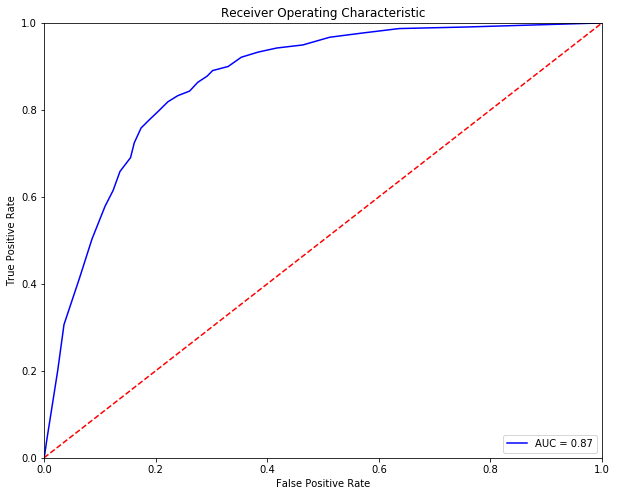

Optimal Threshold is 0.5333333333333333
Accuracy on test data is: 0.7949599083619702


Predicted  False  True  __all__
Actual                         
False        726   171      897
True         187   662      849
__all__      913   833     1746

In [365]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [366]:
table_70_50_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [367]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.5        50  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001

Accuracy of the  Logistic  model for the training data is: 0.7974963181148749

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1617   396     2013
True         429  1632     2061
__all__     2046  2028     4074

Accuracy of the  Logistic  model for test data is: 0.7789232531500573

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        719   178      897
True         208   641      849
__all__      927   819     1746

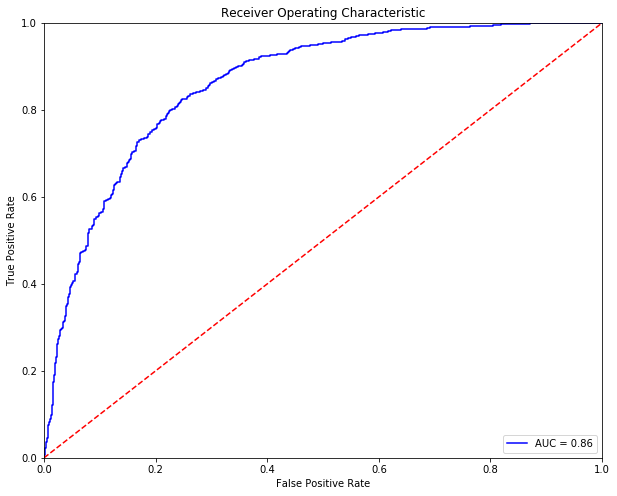

Optimal Threshold is 0.4798731503240661
Accuracy on test data is: 0.7812142038946163


Predicted  False  True  __all__
Actual                         
False        702   195      897
True         187   662      849
__all__      889   857     1746

In [368]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [369]:
table_70_50_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [370]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.8065783014236623

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1553   460     2013
True         328  1733     2061
__all__     1881  2193     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.7938144329896907

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        699   198      897
True         162   687      849
__all__      861   885     1746

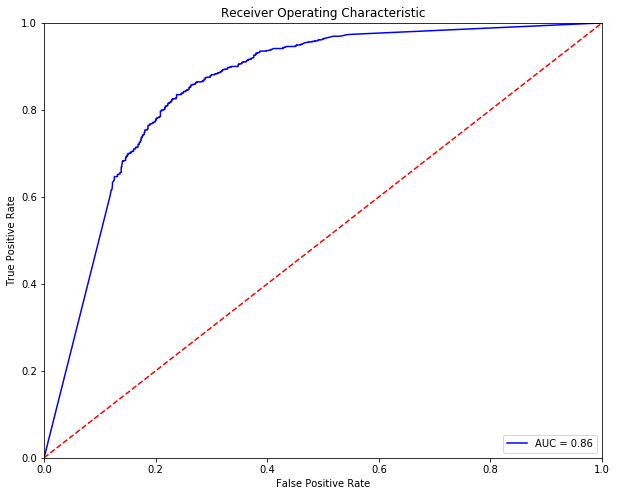

Optimal Threshold is 0.5490085019635139
Accuracy on test data is: 0.7938144329896907


Predicted  False  True  __all__
Actual                         
False        710   187      897
True         173   676      849
__all__      883   863     1746

In [371]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [372]:
table_70_50_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

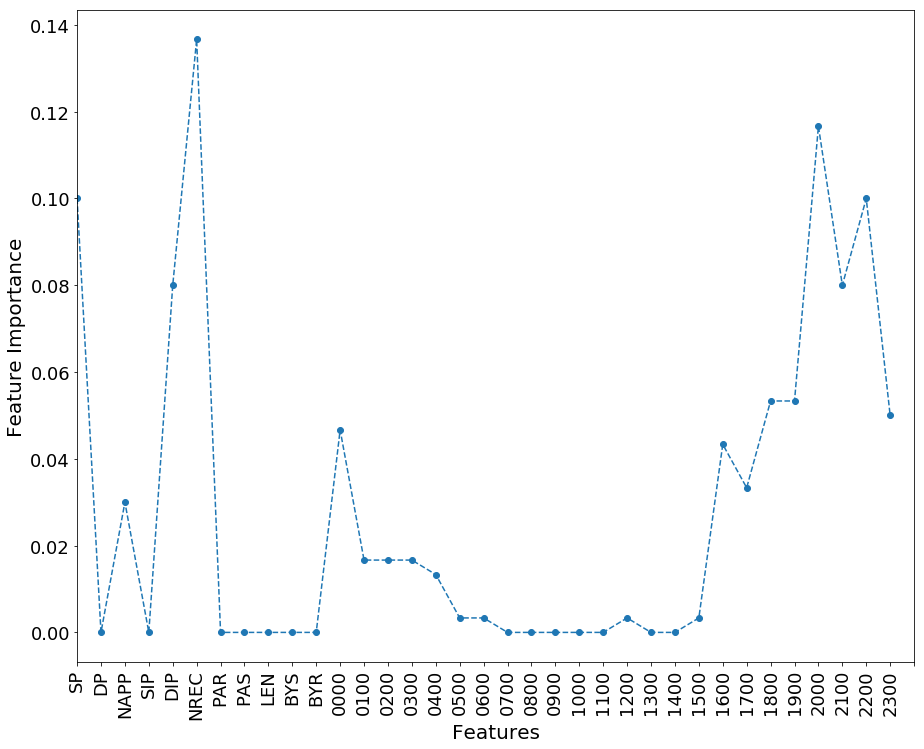

In [373]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [374]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8060873834069711

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1543   470     2013
True         320  1741     2061
__all__     1863  2211     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7938144329896907

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        695   202      897
True         158   691      849
__all__      853   893     1746

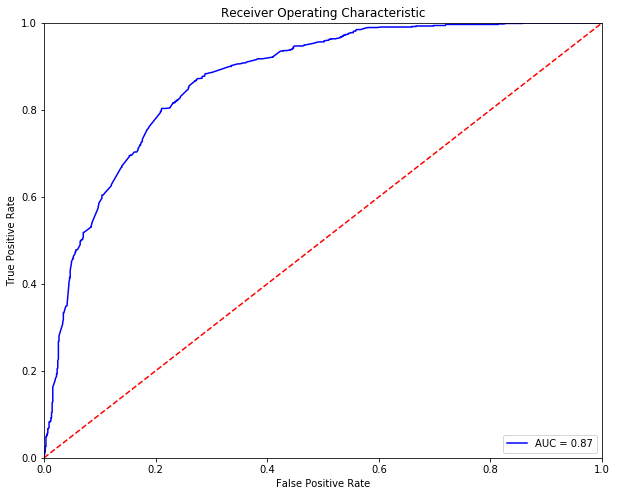

Optimal Threshold is 0.511780150763068
Accuracy on test data is: 0.7869415807560137


Predicted  False  True  __all__
Actual                         
False        729   168      897
True         204   645      849
__all__      933   813     1746

In [375]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [376]:
table_70_50_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

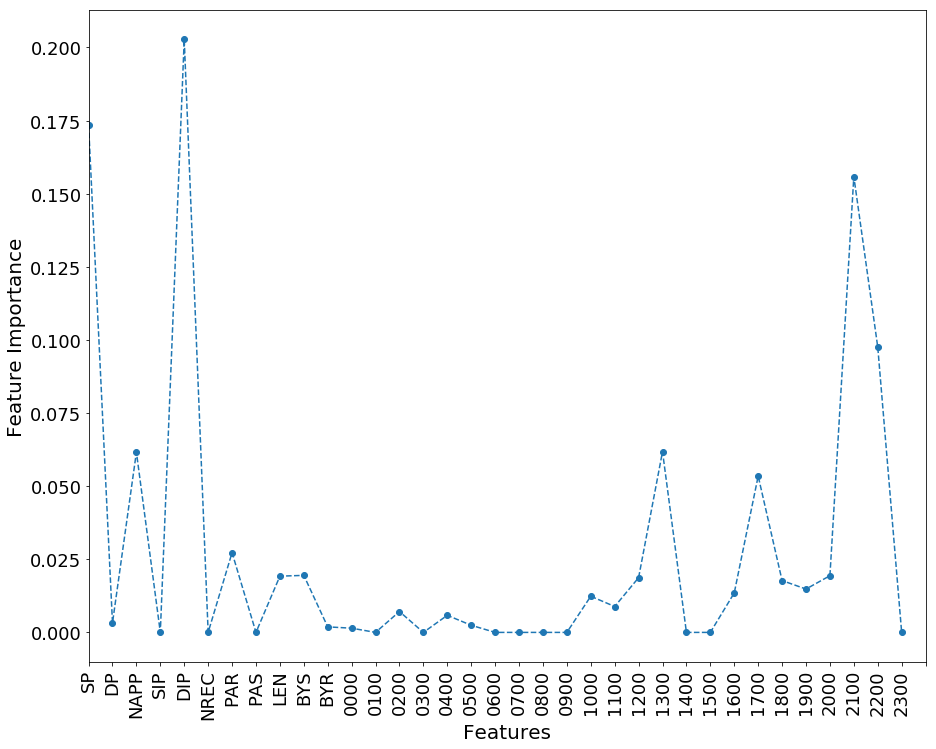

In [377]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [378]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           100             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8087874324987727

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1545   468     2013
True         311  1750     2061
__all__     1856  2218     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.7961053837342497

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        692   205      897
True         151   698      849
__all__      843   903     1746

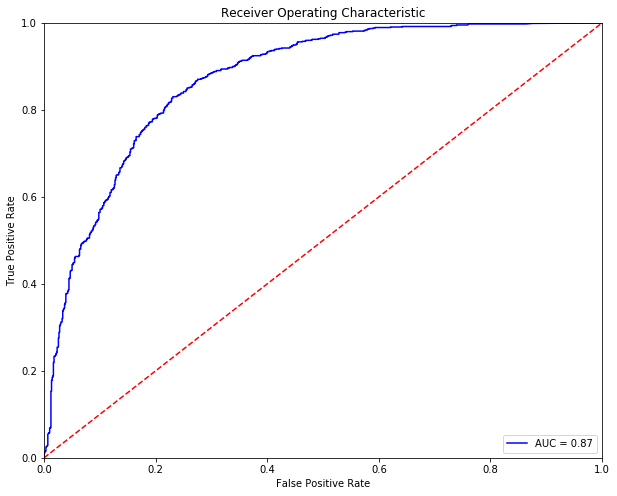

Optimal Threshold is 0.5529217809200557
Accuracy on test data is: 0.7915234822451317


Predicted  False  True  __all__
Actual                         
False        710   187      897
True         177   672      849
__all__      887   859     1746

In [379]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [380]:
table_70_50_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

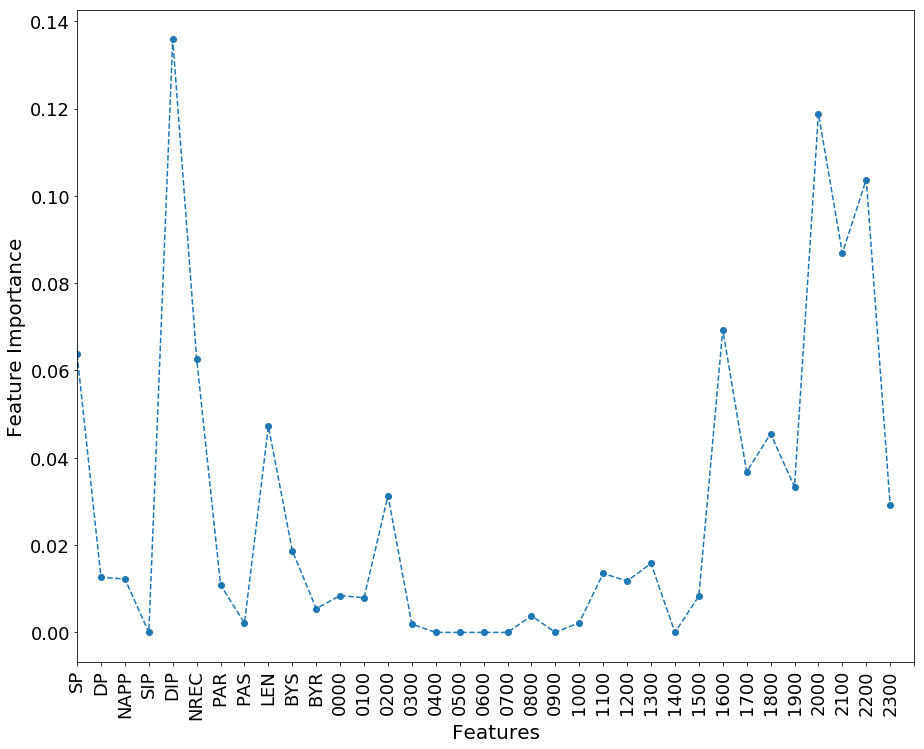

In [381]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [382]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8009327442317133

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1502   511     2013
True         300  1761     2061
__all__     1802  2272     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.788659793814433

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        678   219      897
True         150   699      849
__all__      828   918     1746

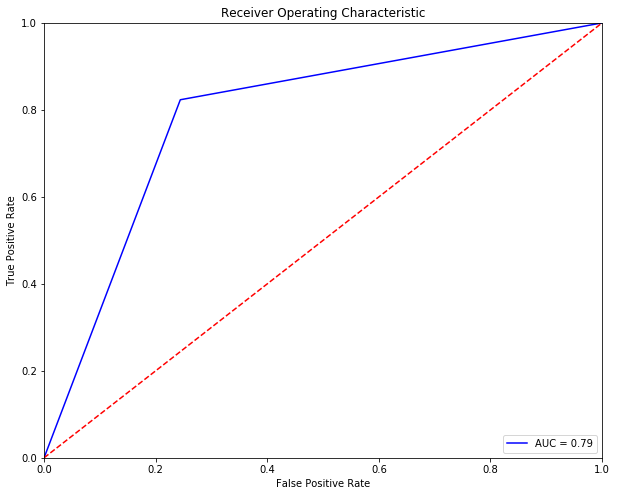

Optimal Threshold is 0.7750880281690141
Accuracy on test data is: 0.5137457044673539


Predicted   0.0  1.0  __all__
Actual                       
0.0         897    0      897
1.0         849    0      849
__all__    1746    0     1746

In [383]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [384]:
table_70_50_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [385]:
%%capture
table_70_50_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

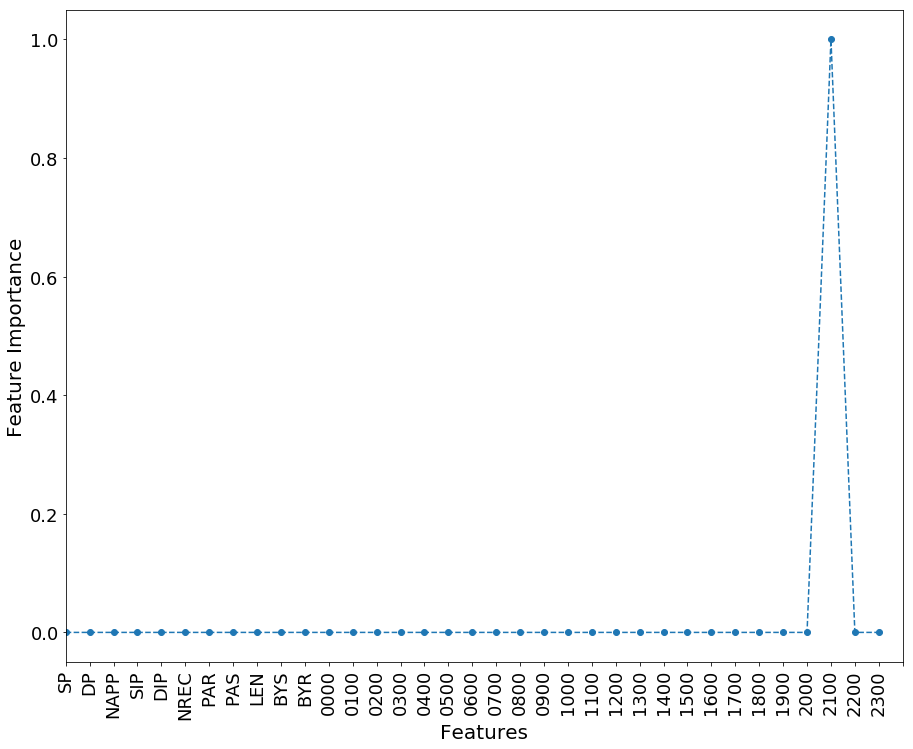

In [386]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [387]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9216985763377515

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1792   221     2013
True          98  1963     2061
__all__     1890  2184     4074

Accuracy of the  Bagging  model for test data is: 0.7926689576174112

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        694   203      897
True         159   690      849
__all__      853   893     1746

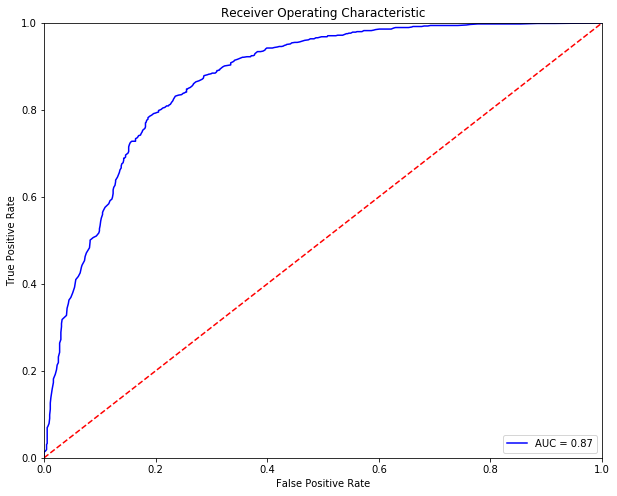

Optimal Threshold is 0.5366666666666666
Accuracy on test data is: 0.7961053837342497


Predicted  False  True  __all__
Actual                         
False        716   181      897
True         175   674      849
__all__      891   855     1746

In [388]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [389]:
table_70_50_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [390]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.8976435935198822


Predicted  False  True  __all__
Actual                         
False       1755   258     2013
True         159  1902     2061
__all__     1914  2160     4074

The test accuracy is: 0.7892325315005727


Predicted  False  True  __all__
Actual                         
False        689   208      897
True         160   689      849
__all__      849   897     1746

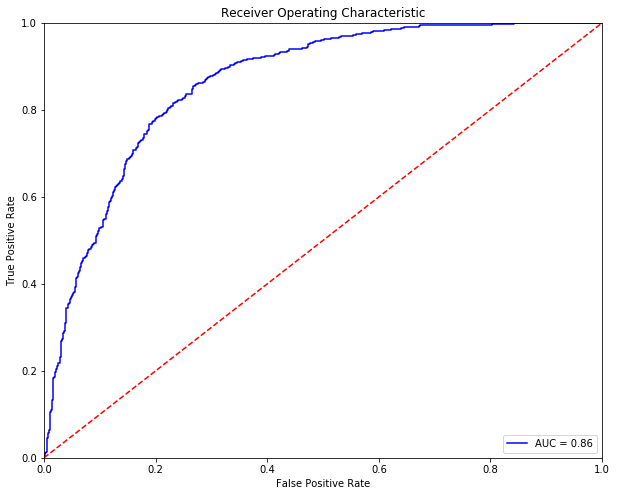

Optimal Threshold is 0.5344216228382227
Accuracy on test data is: 0.7880870561282932


Predicted  False  True  __all__
Actual                         
False        707   190      897
True         180   669      849
__all__      887   859     1746

In [391]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [392]:
table_70_50_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [393]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8888070691901794


Predicted  False  True  __all__
Actual                         
False       1812   201     2013
True         252  1809     2061
__all__     2064  2010     4074

The accuracy of the model on test data is: 0.7680412371134021


Predicted  False  True  __all__
Actual                         
False        697   200      897
True         205   644      849
__all__      902   844     1746

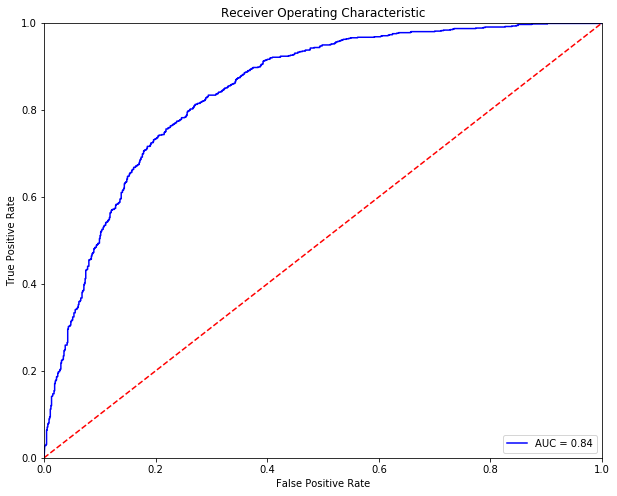

Optimal Threshold is 0.4884008
Accuracy of Logistic Model on training data is: 0.7674684994272624


Predicted  False  True  __all__
Actual                         
False        689   208      897
True         198   651      849
__all__      887   859     1746

In [394]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [395]:
table_70_50_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [396]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.4min finished


The accuracy of the model on training data is: 0.8016691212567502


Predicted  False  True  __all__
Actual                         
False       1496   517     2013
True         291  1770     2061
__all__     1787  2287     4074

The accuracy of the model on test data is: 0.788659793814433


Predicted  False  True  __all__
Actual                         
False        671   226      897
True         143   706      849
__all__      814   932     1746

In [397]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

Optimal Threshold is 0.59369344
Accuracy on test data is: 0.7915234822451317


Predicted  False  True  __all__
Actual                         
False        710   187      897
True         177   672      849
__all__      887   859     1746

In [398]:
table_70_50_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [399]:
table_70_50_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.808051  1712.0  1580.0  433.0  349.0  0.215102   
LogisticRegression          0.797496  1632.0  1617.0  396.0  429.0  0.196721   
RandomForestClassifier      0.806578  1733.0  1553.0  460.0  328.0  0.228515   
AdaBoostClassifier          0.806087  1741.0  1543.0  470.0  320.0  0.233482   
GradientBoostingClassifier  0.808787  1750.0  1545.0  468.0  311.0  0.232489   
ExtraTreeClassifier         0.800933  1761.0  1502.0  511.0  300.0  0.253850   
BaggingClassifier           0.921699  1963.0  1792.0  221.0   98.0  0.109786   
VotingClassifier            0.897644  1902.0  1755.0  258.0  159.0  0.128167   
Neural Network-1            0.888807  1809.0  1812.0  201.0  252.0  0.099851   
Neural-Network-2            0.801669  1770.0  1496.0  517.0  291.0  0.256831   

                                 FNR  
index                                 
KNeighborsClassifier        0.169335  
LogisticRegression          0.208151  
RandomForestClassifier      0.159146  
AdaBoostClassifier          0.155264  
GradientBoostingClassifier  0.150898  
ExtraTreeClassifier         0.145560  
BaggingClassifier           0.047550  
VotingClassifier            0.077147  
Neural Network-1            0.122271  
Neural-Network-2            0.141194

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.796105  677.0  713.0  184.0  172.0  0.205128   
LogisticRegression          0.778923  641.0  719.0  178.0  208.0  0.198439   
RandomForestClassifier      0.793814  687.0  699.0  198.0  162.0  0.220736   
AdaBoostClassifier          0.793814  691.0  695.0  202.0  158.0  0.225195   
GradientBoostingClassifier  0.796105  698.0  692.0  205.0  151.0  0.228540   
ExtraTreeClassifier         0.788660  699.0  678.0  219.0  150.0  0.244147   
BaggingClassifier           0.792669  690.0  694.0  203.0  159.0  0.226310   
VotingClassifier            0.789233  689.0  689.0  208.0  160.0  0.231884   
Neural Network-1            0.768041  644.0  697.0  200.0  205.0  0.222965   
Neural-Network-2            0.788660  706.0  671.0  226.0  143.0  0.251951   

                                 FNR  
index                                 
KNeighborsClassifier        0.202591  
LogisticRegression          0.244994  
RandomForestClassifier      0.190813  
AdaBoostClassifier          0.186101  
GradientBoostingClassifier  0.177856  
ExtraTreeClassifier         0.176678  
BaggingClassifier           0.187279  
VotingClassifier            0.188457  
Neural Network-1            0.241461  
Neural-Network-2            0.168433

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.794960  662.000000  726.000000  171.000000   
LogisticRegression          0.781214  662.000000  702.000000  195.000000   
RandomForestClassifier      0.793814  676.000000  710.000000  187.000000   
AdaBoostClassifier          0.786942  645.000000  729.000000  168.000000   
GradientBoostingClassifier  0.791523  672.000000  710.000000  187.000000   
ExtraTreeClassifier         0.513746  460.829897  436.170103  436.170103   
BaggingClassifier           0.796105  674.000000  716.000000  181.000000   
VotingClassifier            0.788087  669.000000  707.000000  190.000000   
Neural Network-1            0.767468  651.000000  689.000000  208.000000   
Neural-Network-2            0.791523  672.000000  710.000000  187.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        187.000000  0.190635  0.220259   0.533333   
LogisticRegression          187.000000  0.217391  0.220259   0.479873   
RandomForestClassifier      173.000000  0.208473  0.203769   0.549009   
AdaBoostClassifier          204.000000  0.187291  0.240283   0.511780   
GradientBoostingClassifier  177.000000  0.208473  0.208481   0.552922   
ExtraTreeClassifier         412.829897  0.513746  0.486254   0.775088   
BaggingClassifier           175.000000  0.201784  0.206125   0.536667   
VotingClassifier            180.000000  0.211817  0.212014   0.534422   
Neural Network-1            198.000000  0.231884  0.233216   0.488401   
Neural-Network-2            177.000000  0.208473  0.208481   0.593693   

                                 auc  
index                                 
KNeighborsClassifier        0.866043  
LogisticRegression          0.862142  
RandomForestClassifier      0.855186  
AdaBoostClassifier          0.870583  
GradientBoostingClassifier  0.871878  
ExtraTreeClassifier         0.789587  
BaggingClassifier           0.869706  
VotingClassifier            0.862971  
Neural Network-1            0.843631  
Neural-Network-2            0.869154

#### Random State 20

In [400]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_20.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  994  23    34  106  305   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   38   6     6    6   15   

                                                    NREC         PAR  \
User                                                                   
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  1011  280.252226   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    38   12.368421   

                                                           PAS        LEN  \
User                                                                        
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  164.641939  83.002967   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   10.394737  48.078947   

                                                             BYS  \
User                                                               
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  13987.476756   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   1728.315789   

                                                              BYR  0000  0100  \
User                                                                            
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  359758.589515     0     0   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    9966.815789     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     0     0     0     0   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     0     0     1     2   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...    58    80   103    68   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    1400  1500  1600  1700  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...    62   111   155   226   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    10    15    13     0   

                                                    1800  1900  2000  2100  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...   100    12    15     6   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    2200  2300  
User                                                            
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     8     4  
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0

In [401]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec429a3f1a997c5ba98    0
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9e976b79fa3511fa48    0
a70d401cfd6804c5711ae7620658b6be8b25483f999cb8bf73e44e011f877dd9    1
22730c54b8e7377fdfa932bf6b6c14741966f73ac8cc7d945fae9264c808afbb    0
47d304146c958a1134c7c928152e25972e4b8e660576183ae7dbca7d7db049db    1
c907dce84bf23f3a6d3557491ca1cd8299c7cf46a3fea156ed6d75cd73982d20    0
2de335ff62784aac8ad3bcb51dd0144c50b2d44135deb94ac508656f17b4111d    1
6686179791f655e042b2f5a0d6ebcdeb209ff33c0a2603941f4e0358e01390c1    0
4ada88478afa02b860f7d645393828b21da8a8cbd0e8fdd37b1c56a45de94f5c    0
757f0a16eec1045dfec4e23d7f6cd4a3f219bc6ba8f723741238f948eebb9681    0
Name: Target, dtype: int64

In [402]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [403]:
## Table to store training and test measures
table_70_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [404]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2065     0     2065
True           0  2009     2009
__all__     2065  2009     4074

Accuracy of the  KNN  model for test data is: 0.8018327605956472

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        676   169      845
True         177   724      901
__all__      853   893     1746

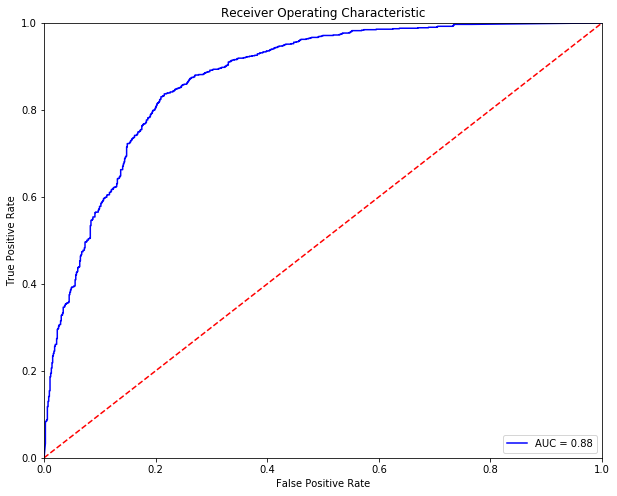

Optimal Threshold is 0.5042266358279812
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        678   167      845
True         180   721      901
__all__      858   888     1746

In [405]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [406]:
table_70_50_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [407]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7       100  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.7874324987727049

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1668   397     2065
True         469  1540     2009
__all__     2137  1937     4074

Accuracy of the  Logistic  model for test data is: 0.7869415807560137

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        706   139      845
True         233   668      901
__all__      939   807     1746

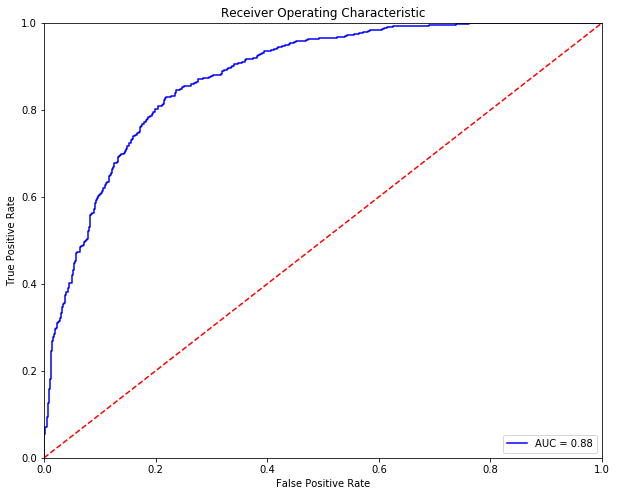

Optimal Threshold is 0.45472741744071904
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        677   168      845
True         179   722      901
__all__      856   890     1746

In [408]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [409]:
table_70_50_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [410]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0        entropy         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.8021600392734414

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1568   497     2065
True         309  1700     2009
__all__     1877  2197     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.8064146620847652

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        673   172      845
True         166   735      901
__all__      839   907     1746

In [411]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

Optimal Threshold is 0.5387872025008884
Accuracy on test data is: 0.8058419243986255


Predicted  False  True  __all__
Actual                         
False        681   164      845
True         175   726      901
__all__      856   890     1746

In [412]:
table_70_50_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [413]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [414]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8009327442317133

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1560   505     2065
True         306  1703     2009
__all__     1866  2208     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.797823596792669

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        661   184      845
True         169   732      901
__all__      830   916     1746

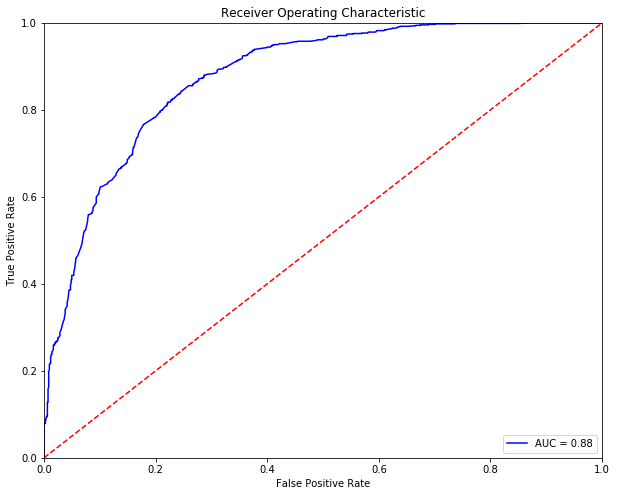

Optimal Threshold is 0.5104244609753609
Accuracy on test data is: 0.7915234822451317


Predicted  False  True  __all__
Actual                         
False        677   168      845
True         196   705      901
__all__      873   873     1746

In [415]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [416]:
table_70_50_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

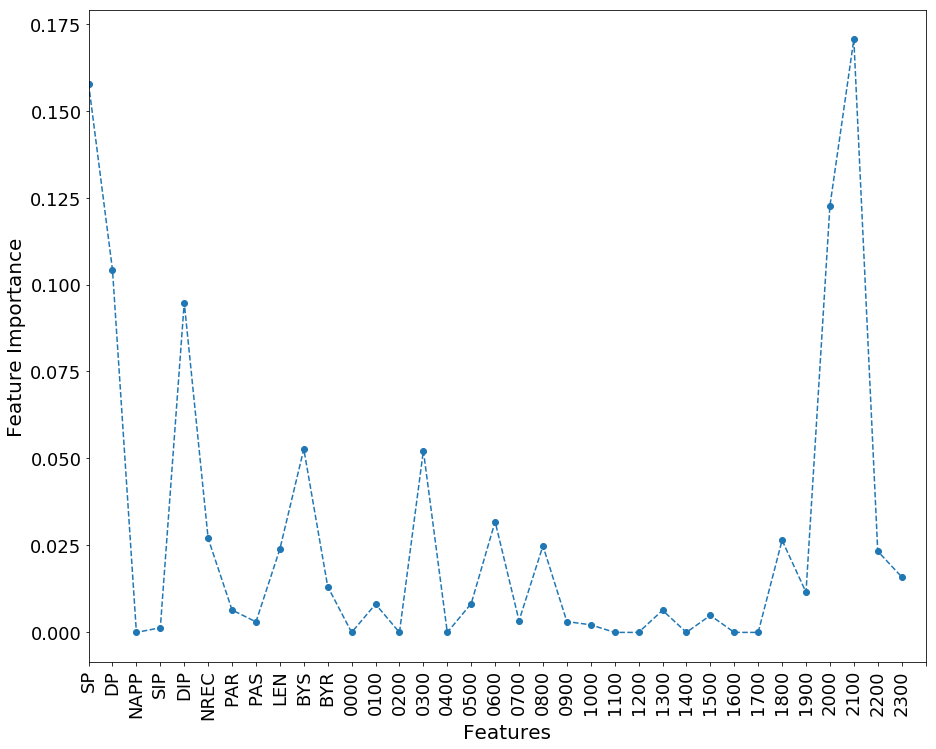

In [417]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [418]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse            0.2  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8267059401080019

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1636   429     2065
True         277  1732     2009
__all__     1913  2161     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8029782359679267

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        661   184      845
True         160   741      901
__all__      821   925     1746

In [419]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

Optimal Threshold is 0.5407121792226216
Accuracy on test data is: 0.802405498281787


Predicted  False  True  __all__
Actual                         
False        679   166      845
True         179   722      901
__all__      858   888     1746

In [420]:
table_70_50_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [421]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [422]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8058419243986255

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1495   570     2065
True         221  1788     2009
__all__     1716  2358     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.7949599083619702

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        618   227      845
True         131   770      901
__all__      749   997     1746

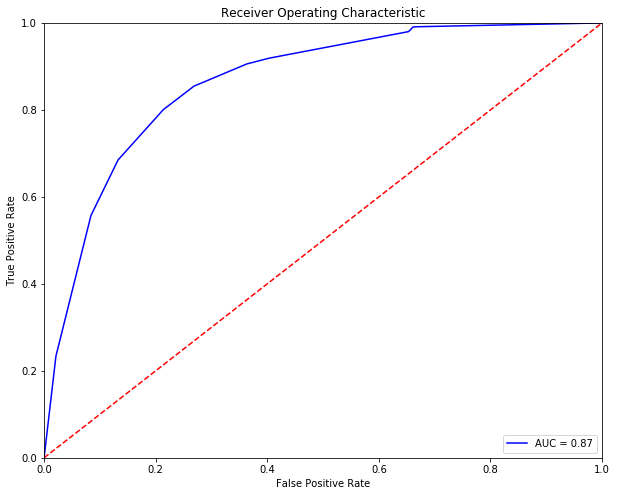

Optimal Threshold is 0.5862068965517241
Accuracy on test data is: 0.7731958762886598


Predicted  False  True  __all__
Actual                         
False        733   112      845
True         284   617      901
__all__     1017   729     1746

In [423]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [424]:
table_70_50_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [425]:
%%capture
table_70_50_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

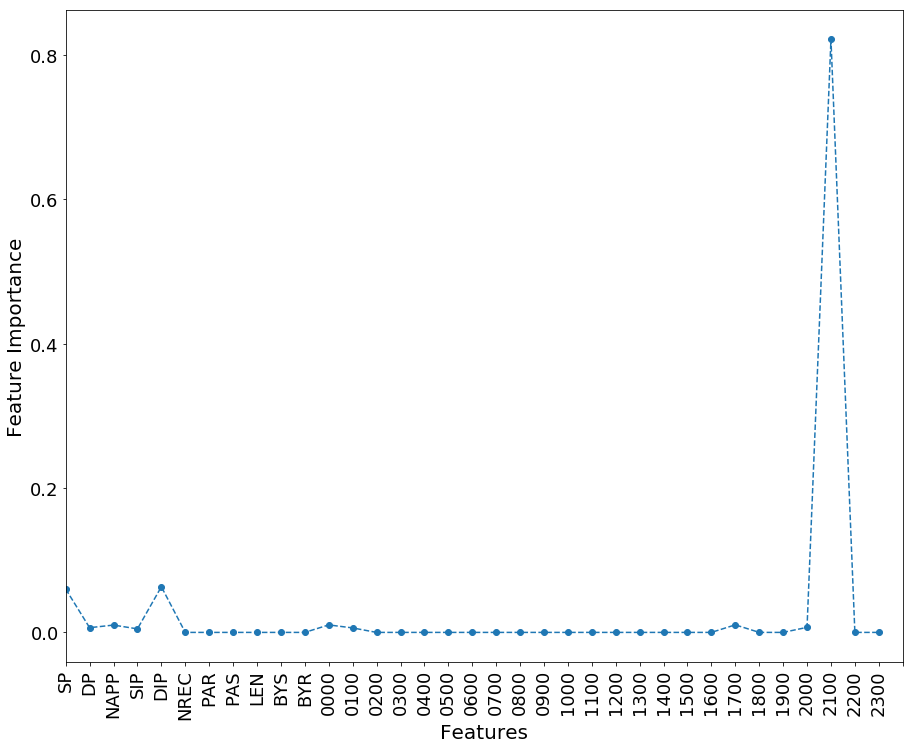

In [426]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [427]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9290623465881198

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1885   180     2065
True         109  1900     2009
__all__     1994  2080     4074

Accuracy of the  Bagging  model for test data is: 0.8052691867124857

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        666   179      845
True         161   740      901
__all__      827   919     1746

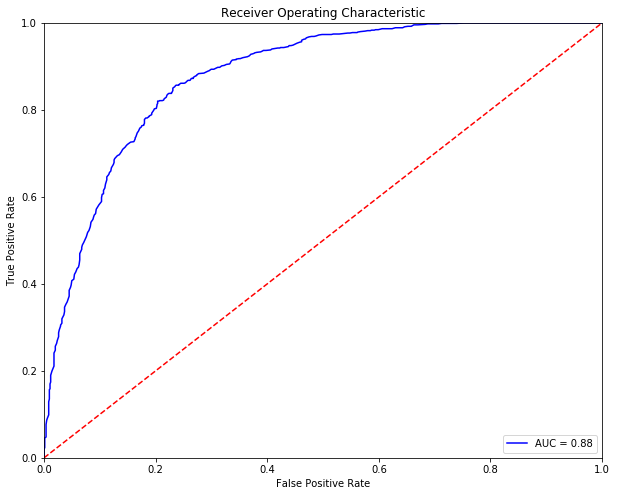

Optimal Threshold is 0.54
Accuracy on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        679   166      845
True         181   720      901
__all__      860   886     1746

In [428]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [429]:
table_70_50_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [430]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9089347079037801


Predicted  False  True  __all__
Actual                         
False       1848   217     2065
True         154  1855     2009
__all__     2002  2072     4074

The test accuracy is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False        665   180      845
True         171   730      901
__all__      836   910     1746

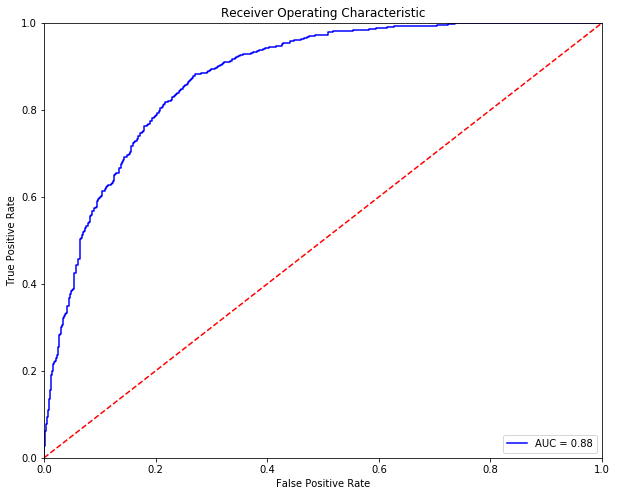

Optimal Threshold is 0.5182315708351927
Accuracy on test data is: 0.7943871706758304


Predicted  False  True  __all__
Actual                         
False        672   173      845
True         186   715      901
__all__      858   888     1746

In [431]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [432]:
table_70_50_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [433]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.9035346097201767


Predicted  False  True  __all__
Actual                         
False       1933   132     2065
True         261  1748     2009
__all__     2194  1880     4074

The accuracy of the model on test data is: 0.7714776632302406


Predicted  False  True  __all__
Actual                         
False        682   163      845
True         236   665      901
__all__      918   828     1746

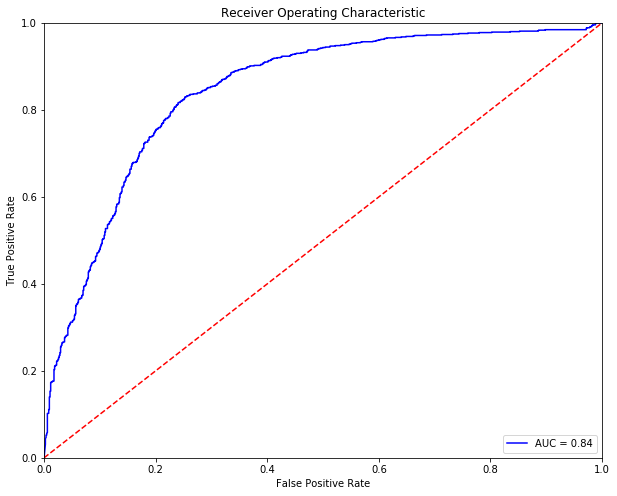

Optimal Threshold is 0.42481855
Accuracy of Logistic Model on training data is: 0.7800687285223368


Predicted  False  True  __all__
Actual                         
False        659   186      845
True         198   703      901
__all__      857   889     1746

In [434]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [435]:
table_70_50_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [436]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.3min finished


The accuracy of the model on training data is: 0.7938144329896907


Predicted  False  True  __all__
Actual                         
False       1554   511     2065
True         329  1680     2009
__all__     1883  2191     4074

The accuracy of the model on test data is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False        664   181      845
True         170   731      901
__all__      834   912     1746

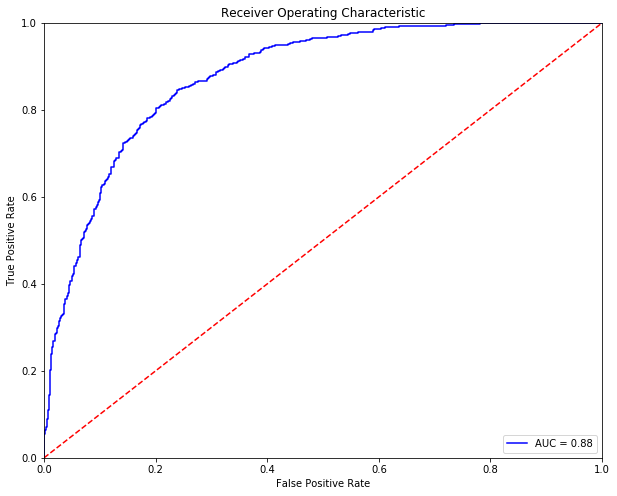

Optimal Threshold is 0.54774517
Accuracy on test data is: 0.800114547537228


Predicted  False  True  __all__
Actual                         
False        676   169      845
True         180   721      901
__all__      856   890     1746

In [437]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [438]:
table_70_50_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [439]:
table_70_50_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2009.0  2065.0    0.0    0.0  0.000000   
LogisticRegression          0.787432  1540.0  1668.0  397.0  469.0  0.192252   
RandomForestClassifier      0.802160  1700.0  1568.0  497.0  309.0  0.240678   
AdaBoostClassifier          0.800933  1703.0  1560.0  505.0  306.0  0.244552   
GradientBoostingClassifier  0.826706  1732.0  1636.0  429.0  277.0  0.207748   
ExtraTreeClassifier         0.805842  1788.0  1495.0  570.0  221.0  0.276029   
BaggingClassifier           0.929062  1900.0  1885.0  180.0  109.0  0.087167   
VotingClassifier            0.908935  1855.0  1848.0  217.0  154.0  0.105085   
Neural Network-1            0.903535  1748.0  1933.0  132.0  261.0  0.063923   
Neural-Network-2            0.793814  1680.0  1554.0  511.0  329.0  0.247458   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.233449  
RandomForestClassifier      0.153808  
AdaBoostClassifier          0.152315  
GradientBoostingClassifier  0.137880  
ExtraTreeClassifier         0.110005  
BaggingClassifier           0.054256  
VotingClassifier            0.076655  
Neural Network-1            0.129915  
Neural-Network-2            0.163763

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.801833  724.0  676.0  169.0  177.0  0.200000   
LogisticRegression          0.786942  668.0  706.0  139.0  233.0  0.164497   
RandomForestClassifier      0.806415  735.0  673.0  172.0  166.0  0.203550   
AdaBoostClassifier          0.797824  732.0  661.0  184.0  169.0  0.217751   
GradientBoostingClassifier  0.802978  741.0  661.0  184.0  160.0  0.217751   
ExtraTreeClassifier         0.794960  770.0  618.0  227.0  131.0  0.268639   
BaggingClassifier           0.805269  740.0  666.0  179.0  161.0  0.211834   
VotingClassifier            0.798969  730.0  665.0  180.0  171.0  0.213018   
Neural Network-1            0.771478  665.0  682.0  163.0  236.0  0.192899   
Neural-Network-2            0.798969  731.0  664.0  181.0  170.0  0.214201   

                                 FNR  
index                                 
KNeighborsClassifier        0.196448  
LogisticRegression          0.258602  
RandomForestClassifier      0.184240  
AdaBoostClassifier          0.187569  
GradientBoostingClassifier  0.177580  
ExtraTreeClassifier         0.145394  
BaggingClassifier           0.178690  
VotingClassifier            0.189789  
Neural Network-1            0.261931  
Neural-Network-2            0.188679

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.801260  721.0  678.0  167.0  180.0  0.197633   
LogisticRegression          0.801260  722.0  677.0  168.0  179.0  0.198817   
RandomForestClassifier      0.805842  726.0  681.0  164.0  175.0  0.194083   
AdaBoostClassifier          0.791523  705.0  677.0  168.0  196.0  0.198817   
GradientBoostingClassifier  0.802405  722.0  679.0  166.0  179.0  0.196450   
ExtraTreeClassifier         0.773196  617.0  733.0  112.0  284.0  0.132544   
BaggingClassifier           0.801260  720.0  679.0  166.0  181.0  0.196450   
VotingClassifier            0.794387  715.0  672.0  173.0  186.0  0.204734   
Neural Network-1            0.780069  703.0  659.0  186.0  198.0  0.220118   
Neural-Network-2            0.800115  721.0  676.0  169.0  180.0  0.200000   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.199778   0.504227  0.875686  
LogisticRegression          0.198668   0.454727  0.877676  
RandomForestClassifier      0.194229   0.538787  0.860374  
AdaBoostClassifier          0.217536   0.510424  0.876870  
GradientBoostingClassifier  0.198668   0.540712  0.880586  
ExtraTreeClassifier         0.315205   0.586207  0.865418  
BaggingClassifier           0.200888   0.540000  0.879147  
VotingClassifier            0.206437   0.518232  0.877534  
Neural Network-1            0.219756   0.424819  0.843227  
Neural-Network-2            0.199778   0.547745  0.878323

In [440]:
table_70_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [441]:
table_70_50_train_avg['accuracy']=(table_70_50_train['accuracy']+table_70_50_10_train['accuracy']+table_70_50_20_train['accuracy'])/3.0
table_70_50_train_avg['FPR']=(table_70_50_train['FPR']+table_70_50_10_train['FPR']+table_70_50_20_train['FPR'])/3.0
table_70_50_train_avg['FNR']=(table_70_50_train['FNR']+table_70_50_10_train['FNR']+table_70_50_20_train['FNR'])/3.0

In [442]:
table_70_50_test_avg['accuracy']=(table_70_50_test['accuracy']+table_70_50_10_test['accuracy']+table_70_50_20_test['accuracy'])/3.0
table_70_50_test_avg['FPR']=(table_70_50_test['FPR']+table_70_50_10_test['FPR']+table_70_50_20_test['FPR'])/3.0
table_70_50_test_avg['FNR']=(table_70_50_test['FNR']+table_70_50_10_test['FNR']+table_70_50_20_test['FNR'])/3.0

In [443]:
table_70_50_test_roc_avg['accuracy']=(table_70_50_test_roc['accuracy']+table_70_50_10_test_roc['accuracy']+table_70_50_20_test_roc['accuracy'])/3.0
table_70_50_test_roc_avg['FPR']=(table_70_50_test_roc['FPR']+table_70_50_10_test_roc['FPR']+table_70_50_20_test_roc['FPR'])/3.0
table_70_50_test_roc_avg['FNR']=(table_70_50_test_roc['FNR']+table_70_50_10_test_roc['FNR']+table_70_50_20_test_roc['FNR'])/3.0
table_70_50_test_roc_avg['auc']=(table_70_50_test_roc['auc']+table_70_50_10_test_roc['auc']+table_70_50_20_test_roc['auc'])/3.0

In [444]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.936017  0.071701  0.056445
LogisticRegression          0.791033  0.192774  0.225239
RandomForestClassifier      0.802242  0.237430  0.158081
AdaBoostClassifier          0.803142  0.241856  0.151891
GradientBoostingClassifier  0.815497  0.226956  0.142202
ExtraTreeClassifier         0.800605  0.255193  0.143351
BaggingClassifier           0.914417  0.113810  0.057559
VotingClassifier            0.903780  0.117691  0.074891
Neural Network-1            0.892734  0.086149  0.128539
Neural-Network-2            0.795942  0.253237  0.155090

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.802596  0.201936  0.192813
LogisticRegression          0.789233  0.177668  0.243483
RandomForestClassifier      0.803360  0.216637  0.176329
AdaBoostClassifier          0.799542  0.228904  0.171625
GradientBoostingClassifier  0.803933  0.226239  0.165547
ExtraTreeClassifier         0.798778  0.238578  0.164456
BaggingClassifier           0.803551  0.220122  0.172530
VotingClassifier            0.796105  0.222753  0.184724
Neural Network-1            0.775296  0.206271  0.242643
Neural-Network-2            0.798969  0.233993  0.167263

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.802405  0.192537  0.202898  0.870747
LogisticRegression          0.794005  0.205251  0.206772  0.870936
RandomForestClassifier      0.802596  0.198055  0.196709  0.860731
AdaBoostClassifier          0.793242  0.193328  0.220507  0.873105
GradientBoostingClassifier  0.800878  0.198466  0.199759  0.876898
ExtraTreeClassifier         0.697785  0.274387  0.337369  0.840924
BaggingClassifier           0.802215  0.195103  0.200486  0.873905
VotingClassifier            0.794578  0.204610  0.206228  0.869301
Neural Network-1            0.778160  0.221718  0.221978  0.846269
Neural-Network-2            0.798969  0.200783  0.201287  0.874390

###  <a id='1.C' style="text-decoration : none; color : #000000;">80:20 Train Test Split with PCA</a>
#### Random State 0

In [445]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_0.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP   DIP  \
User                                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  6855  69    70  102  1503   
3c45372db59b842faec38488806b64c282270417f6755ba...    13   4     4    3     8   

                                                    NREC         PAR  \
User                                                                   
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  7494  182.050440   
3c45372db59b842faec38488806b64c282270417f6755ba...    13   97.769231   

                                                          PAS         LEN  \
User                                                                        
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  70.107419  109.414331   
3c45372db59b842faec38488806b64c282270417f6755ba...  90.000000   88.461538   

                                                             BYS  \
User                                                               
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  18672.453563   
3c45372db59b842faec38488806b64c282270417f6755ba...   7757.153846   

                                                              BYR  0000  0100  \
User                                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  223011.614091   319   339   
3c45372db59b842faec38488806b64c282270417f6755ba...  120738.153846     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   265   588   981   782   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   183   139    87   167   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...    70   122   149   313   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     5     0   

                                                    1400  1500  1600  1700  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   268   399   825   309   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     1     7     0   

                                                    1800  1900  2000  2100  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   223   264   229   125   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    2200  2300  
User                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   126   222  
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0

1 -> Infected
0 -> Uninfected


User
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953    1
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402    0
653fe3e24024826e008a512560be7abb15b06bd46e89ba4159dbdc6b8b5983c3    0
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107    1
ac87be58a25e50356ef8d66135f93392ac6c40f3c7b557e7c16f663ce168e9fc    1
8df0db56b5bb9ff4cc7b00413a2a4c211db8a7d9d4dcf78a73cd79904bc395cd    1
e3a357295e4a68d988b39f98f9751f6ea4098f7443b6ca0fff6f5d6c804d36f5    0
481ba91002ea25e7b1470715bc8dbb26dff02ad090bba34cc8cc3188e4a49813    1
9bf5181f7d61d1d2357434a6f710f3630c854a1b692dc7f6f3d3b2697f1a983d    1
e5615a3ffc7932b6beb79fdbb4adca13f9a0fb79f3210a0ef275419005e37268    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9392012639691998
The train/test split ratio is 80:20


In [446]:
display(X_pca_13[0:1])

array([[ 0.56688539,  0.02745154, -0.0152951 ,  0.14080916, -0.8121737 ,
        -0.02917753,  0.28777364, -0.18640774, -3.30589935, -1.69785299,
         2.16904765, -0.45300289, -0.27789365]])

In [447]:
## Table to store training and test measures
table_80_50_PCA_0_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_0_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_0_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [448]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2317     0     2317
True           0  2339     2339
__all__     2317  2339     4656

Accuracy of the  KNN  model for test data is: 0.8075601374570447

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        485   108      593
True         116   455      571
__all__      601   563     1164

In [449]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

Optimal Threshold is 0.4867489433989628
Accuracy on test data is: 0.8101374570446735


Predicted  False  True  __all__
Actual                         
False        481   112      593
True         109   462      571
__all__      590   574     1164

In [450]:
table_80_50_PCA_0_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [451]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False          False                0.7        50          ovr   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001

Accuracy of the  Logistic  model for the training data is: 0.7839347079037801

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1865   452     2317
True         554  1785     2339
__all__     2419  2237     4656

Accuracy of the  Logistic  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        493   100      593
True         128   443      571
__all__      621   543     1164

In [452]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

Optimal Threshold is 0.461362192709859
Accuracy on test data is: 0.8032646048109966


Predicted  False  True  __all__
Actual                         
False        477   116      593
True         113   458      571
__all__      590   574     1164

In [453]:
table_80_50_PCA_0_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [454]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7929553264604811

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1689   628     2317
True         336  2003     2339
__all__     2025  2631     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.8032646048109966

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        444   149      593
True          80   491      571
__all__      524   640     1164

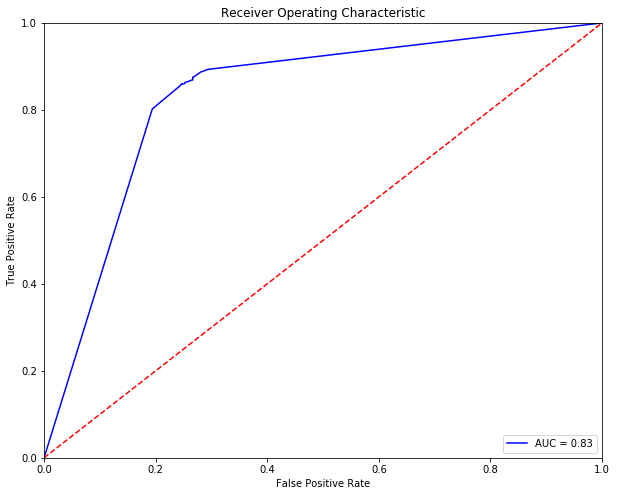

Optimal Threshold is 0.5556752319697215
Accuracy on test data is: 0.5094501718213058


Predicted   0.0  1.0  __all__
Actual                       
0.0         593    0      593
1.0         571    0      571
__all__    1164    0     1164

In [455]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [456]:
table_80_50_PCA_0_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

593
0
0
593
571
0
0
571
1.0
0.0
0.0
1.0


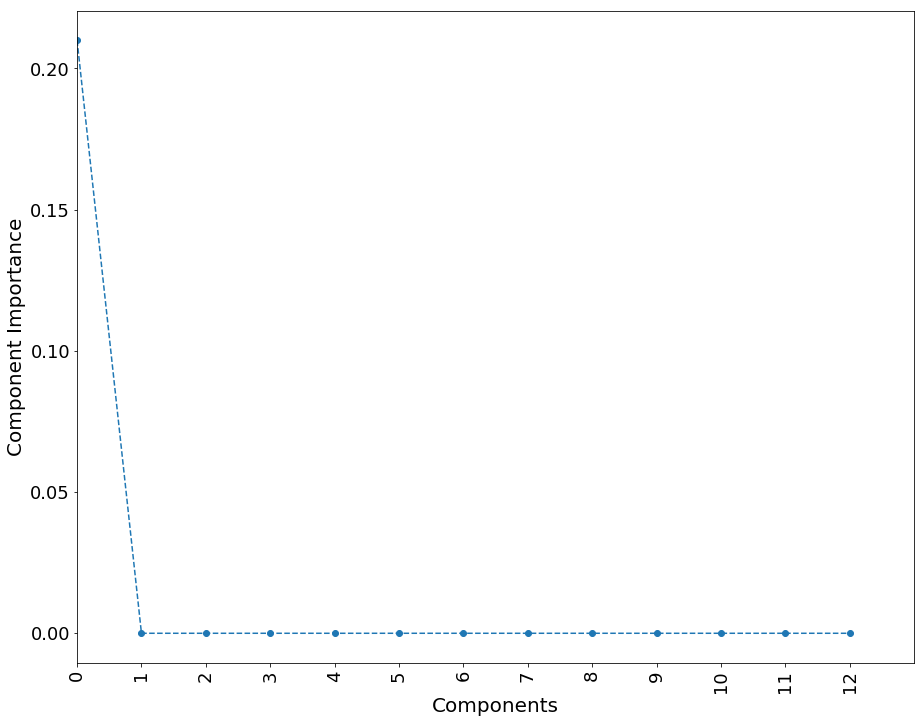

In [457]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [458]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8043384879725086

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1758   559     2317
True         352  1987     2339
__all__     2110  2546     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8067010309278351

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        456   137      593
True          88   483      571
__all__      544   620     1164

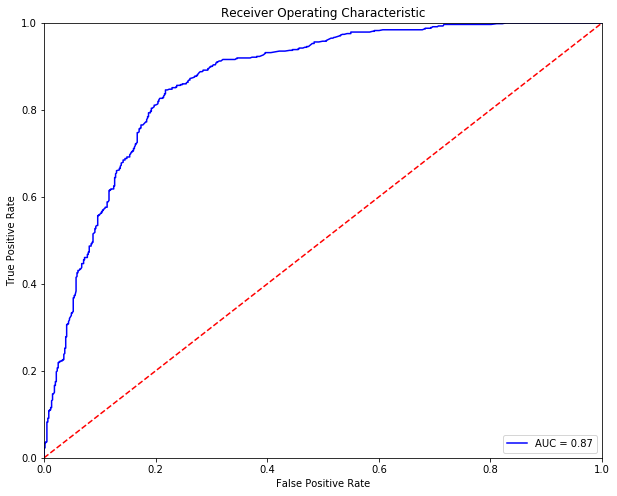

Optimal Threshold is 0.5089073109915986
Accuracy on test data is: 0.8058419243986255


Predicted  False  True  __all__
Actual                         
False        479   114      593
True         112   459      571
__all__      591   573     1164

In [459]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [460]:
table_80_50_PCA_0_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

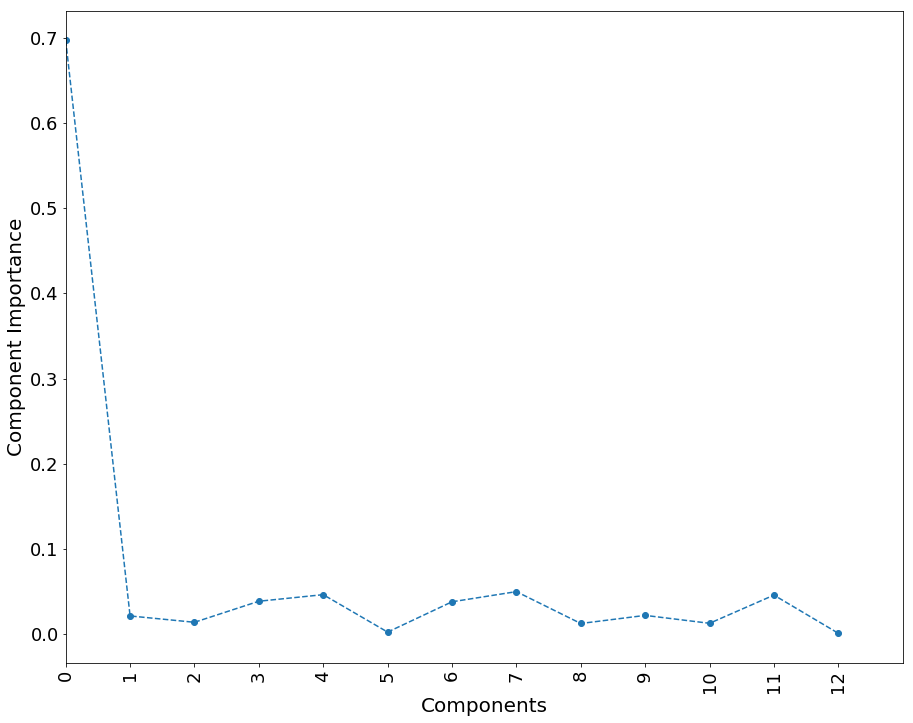

In [461]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [462]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1           150             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8105670103092784

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1803   514     2317
True         368  1971     2339
__all__     2171  2485     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8144329896907216

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        467   126      593
True          90   481      571
__all__      557   607     1164

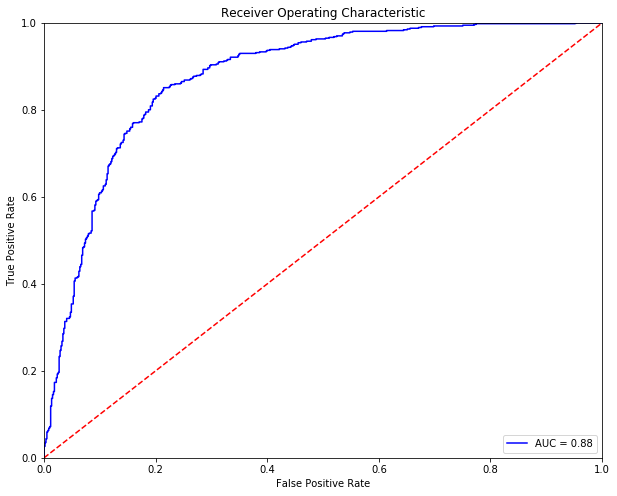

Optimal Threshold is 0.5811805352861916
Accuracy on test data is: 0.8084192439862543


Predicted  False  True  __all__
Actual                         
False        480   113      593
True         110   461      571
__all__      590   574     1164

In [463]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [464]:
table_80_50_PCA_0_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

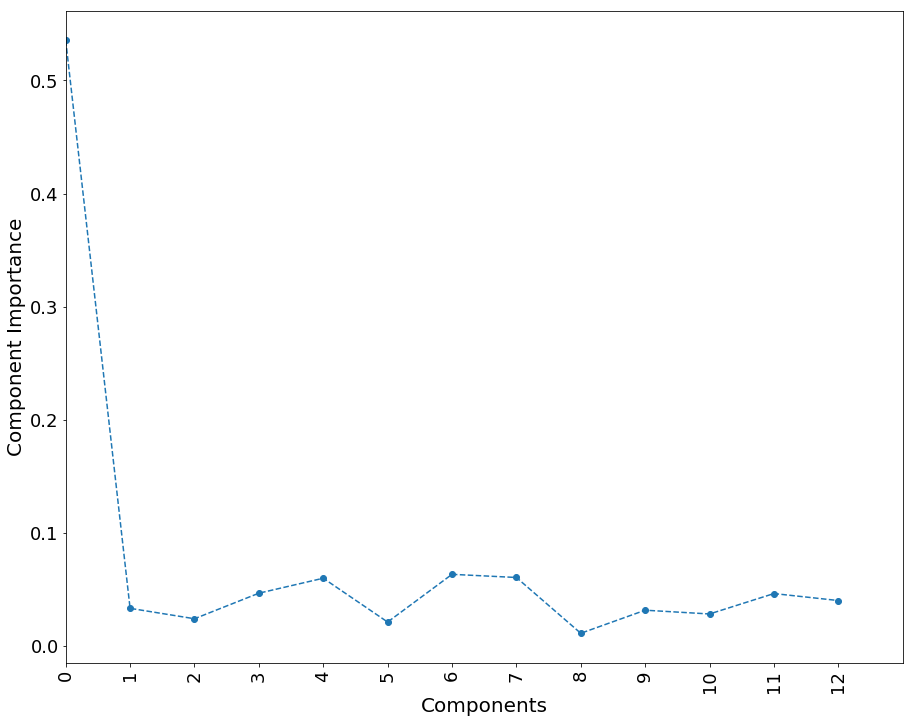

In [465]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [466]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8000429553264605

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1711   606     2317
True         325  2014     2339
__all__     2036  2620     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.7903780068728522

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        439   154      593
True          90   481      571
__all__      529   635     1164

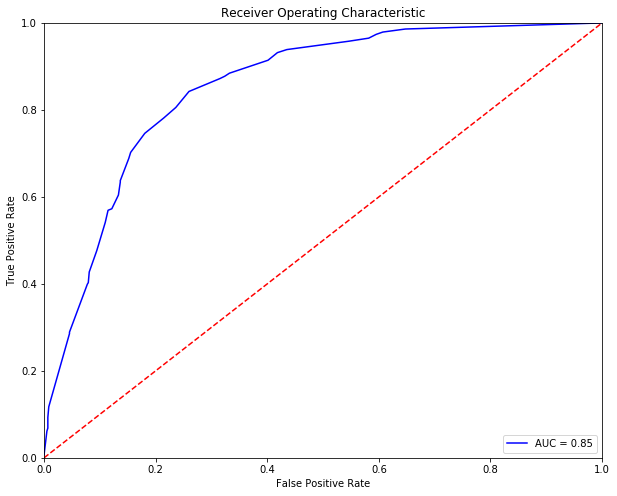

Optimal Threshold is 0.5802469135802469
Accuracy on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False        482   111      593
True         141   430      571
__all__      623   541     1164

In [467]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [468]:
table_80_50_PCA_0_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [469]:
%%capture
table_80_50_PCA_0_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

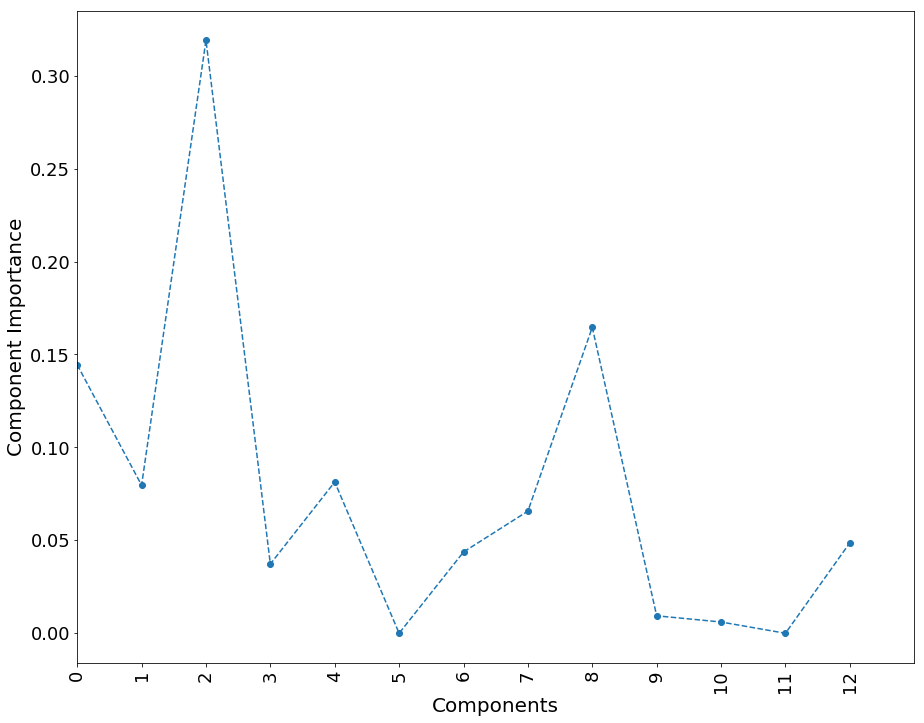

In [470]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [471]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.8969072164948454

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1987   330     2317
True         150  2189     2339
__all__     2137  2519     4656

Accuracy of the  Bagging  model for test data is: 0.8118556701030928

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        458   135      593
True          84   487      571
__all__      542   622     1164

In [472]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

Optimal Threshold is 0.57
Accuracy on test data is: 0.8067010309278351


Predicted  False  True  __all__
Actual                         
False        480   113      593
True         112   459      571
__all__      592   572     1164

In [473]:
table_80_50_PCA_0_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [474]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9347079037800687


Predicted  False  True  __all__
Actual                         
False       2121   196     2317
True         108  2231     2339
__all__     2229  2427     4656

The test accuracy is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False        470   123      593
True          99   472      571
__all__      569   595     1164

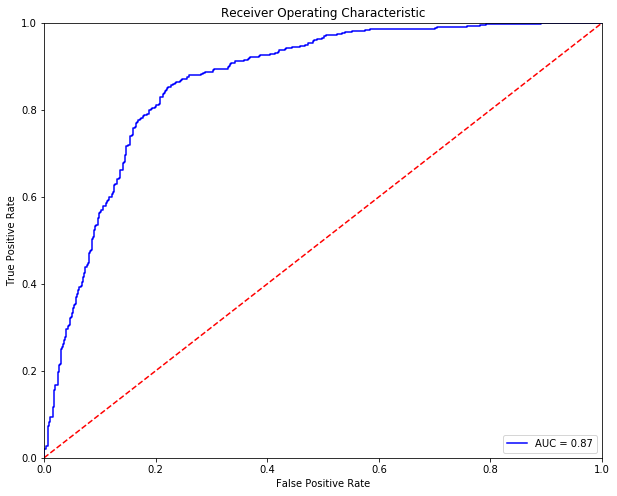

Optimal Threshold is 0.5236841559326041
Accuracy on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False        478   115      593
True         113   458      571
__all__      591   573     1164

In [475]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [476]:
table_80_50_PCA_0_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [477]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8365549828178694


Predicted  False  True  __all__
Actual                         
False       1759   558     2317
True         203  2136     2339
__all__     1962  2694     4656

The accuracy of the model on test data is: 0.7903780068728522


Predicted  False  True  __all__
Actual                         
False        429   164      593
True          80   491      571
__all__      509   655     1164

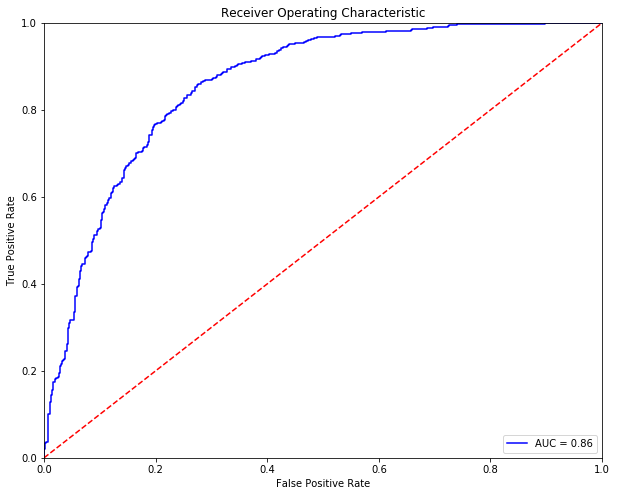

Optimal Threshold is 0.63732237
Accuracy of Logistic Model on training data is: 0.7843642611683849


Predicted  False  True  __all__
Actual                         
False        465   128      593
True         123   448      571
__all__      588   576     1164

In [478]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [479]:
table_80_50_PCA_0_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [480]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.2min finished


The accuracy of the model on training data is: 0.7981099656357389


Predicted  False  True  __all__
Actual                         
False       1786   531     2317
True         409  1930     2339
__all__     2195  2461     4656

The accuracy of the model on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False        464   129      593
True          99   472      571
__all__      563   601     1164

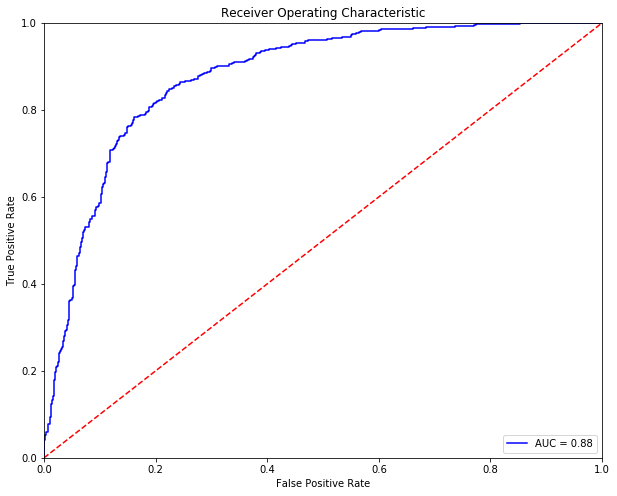

Optimal Threshold is 0.5434481
Accuracy on test data is: 0.8075601374570447


Predicted  False  True  __all__
Actual                         
False        479   114      593
True         110   461      571
__all__      589   575     1164

In [481]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [482]:
table_80_50_PCA_0_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [483]:
table_80_50_PCA_0_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_0_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_0_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_0_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_0_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_0_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_0_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_0_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_0_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2339.0  2317.0    0.0    0.0  0.000000   
LogisticRegression          0.783935  1785.0  1865.0  452.0  554.0  0.195080   
RandomForestClassifier      0.792955  2003.0  1689.0  628.0  336.0  0.271040   
AdaBoostClassifier          0.804338  1987.0  1758.0  559.0  352.0  0.241260   
GradientBoostingClassifier  0.810567  1971.0  1803.0  514.0  368.0  0.221839   
ExtraTreeClassifier         0.800043  2014.0  1711.0  606.0  325.0  0.261545   
BaggingClassifier           0.896907  2189.0  1987.0  330.0  150.0  0.142426   
VotingClassifier            0.934708  2231.0  2121.0  196.0  108.0  0.084592   
Neural Network-1            0.836555  2136.0  1759.0  558.0  203.0  0.240829   
Neural-Network-2            0.798110  1930.0  1786.0  531.0  409.0  0.229176   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.236853  
RandomForestClassifier      0.143651  
AdaBoostClassifier          0.150492  
GradientBoostingClassifier  0.157332  
ExtraTreeClassifier         0.138948  
BaggingClassifier           0.064130  
VotingClassifier            0.046174  
Neural Network-1            0.086789  
Neural-Network-2            0.174861

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.807560  455.0  485.0  108.0  116.0  0.182125   
LogisticRegression          0.804124  443.0  493.0  100.0  128.0  0.168634   
RandomForestClassifier      0.803265  491.0  444.0  149.0   80.0  0.251265   
AdaBoostClassifier          0.806701  483.0  456.0  137.0   88.0  0.231029   
GradientBoostingClassifier  0.814433  481.0  467.0  126.0   90.0  0.212479   
ExtraTreeClassifier         0.790378  481.0  439.0  154.0   90.0  0.259696   
BaggingClassifier           0.811856  487.0  458.0  135.0   84.0  0.227656   
VotingClassifier            0.809278  472.0  470.0  123.0   99.0  0.207420   
Neural Network-1            0.790378  491.0  429.0  164.0   80.0  0.276560   
Neural-Network-2            0.804124  472.0  464.0  129.0   99.0  0.217538   

                                 FNR  
index                                 
KNeighborsClassifier        0.203152  
LogisticRegression          0.224168  
RandomForestClassifier      0.140105  
AdaBoostClassifier          0.154116  
GradientBoostingClassifier  0.157618  
ExtraTreeClassifier         0.157618  
BaggingClassifier           0.147110  
VotingClassifier            0.173380  
Neural Network-1            0.140105  
Neural-Network-2            0.173380

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.810137  462.000000  481.000000  112.000000   
LogisticRegression          0.803265  458.000000  477.000000  116.000000   
RandomForestClassifier      0.509450  302.103952  290.896048  290.896048   
AdaBoostClassifier          0.805842  459.000000  479.000000  114.000000   
GradientBoostingClassifier  0.808419  461.000000  480.000000  113.000000   
ExtraTreeClassifier         0.783505  430.000000  482.000000  111.000000   
BaggingClassifier           0.806701  459.000000  480.000000  113.000000   
VotingClassifier            0.804124  458.000000  478.000000  115.000000   
Neural Network-1            0.784364  448.000000  465.000000  128.000000   
Neural-Network-2            0.807560  461.000000  479.000000  114.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        109.000000  0.188870  0.190893   0.486749   
LogisticRegression          113.000000  0.195616  0.197898   0.461362   
RandomForestClassifier      280.103952  0.509450  0.490550   0.555675   
AdaBoostClassifier          112.000000  0.192243  0.196147   0.508907   
GradientBoostingClassifier  110.000000  0.190556  0.192644   0.581181   
ExtraTreeClassifier         141.000000  0.187184  0.246935   0.580247   
BaggingClassifier           112.000000  0.190556  0.196147   0.570000   
VotingClassifier            113.000000  0.193929  0.197898   0.523684   
Neural Network-1            123.000000  0.215852  0.215412   0.637322   
Neural-Network-2            110.000000  0.192243  0.192644   0.543448   

                                 auc  
index                                 
KNeighborsClassifier        0.875745  
LogisticRegression          0.875406  
RandomForestClassifier      0.831375  
AdaBoostClassifier          0.869377  
GradientBoostingClassifier  0.877191  
ExtraTreeClassifier         0.853127  
BaggingClassifier           0.876524  
VotingClassifier            0.868604  
Neural Network-1            0.860093  
Neural-Network-2            0.877547

#### Random State 10

In [484]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_10.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP   DP  NAPP  SIP  \
User                                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  4555  135    61  234   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  9874   59    59  112   

                                                     DIP   NREC         PAR  \
User                                                                          
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1180   5030  132.304771   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  2319  11943   72.815373   

                                                          PAS         LEN  \
User                                                                        
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  73.091252  117.687475   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  68.967847   53.259315   

                                                             BYS  \
User                                                               
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  16211.290656   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  33132.043708   

                                                              BYR  0000  0100  \
User                                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  162537.369185   505   537   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   73635.531525   226   124   

                                                    0200  0300  0400  0500  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   405   191   123    63   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   250   322   544  1307   

                                                    0600  0700  0800  0900  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    55    31    60    58   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   803   855   806   600   

                                                    1000  1100  1200  1300  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    68   140   306   137   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   729   512   249   247   

                                                    1400  1500  1600  1700  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   125   191   109   234   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   321   471   643   417   

                                                    1800  1900  2000  2100  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   264   244   361   205   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   561   406   539   466   

                                                    2200  2300  
User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   399   219  
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   373   172

1 -> Infected
0 -> Uninfected


User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
910f8814c078483a86a1030fa3fce449aaeafd169b144fb3131f4c1577252cc3    1
117f95f1e1e2f68a2fcbb99523c4d6b2cd4307a559b566c799ea644cefadcf3b    0
4d648f5609b96f24133ff4ca6473d1bc6ae1e4d8723701c182c856b3eb4abebb    1
d225251f106c00909acb89ddc8766a8221b31e5d48cf3cd0d1dbbb877c47e30a    1
bc061b23b6d1179d337399a71613b80018088f800da352cb1e7d144a3b2d3071    0
a7c5796a8ab263860b6c5eec4327a0ec0b27b9ca4ccf4295c2f92a13e30be632    1
cf239e821992dafc5c241fe455516522cc2d9373e29ae5b98fad3f9b280fc411    1
4141438cff5d7504861d7975f4500b631086713f9f7f346acfc0628dd2731b47    1
2c8825817f4c53b8ae632ed4335e76115fb1e41b414a9bcd6bcf902edad2c2a2    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9376145588647304
The train/test split ratio is 80:20


In [485]:
display(X_pca_13[0:1])

array([[ 0.18830338,  0.05512442, -0.34650998, -0.60116503,  0.96287036,
         0.08587245,  0.08204481, -1.10009357, -0.43303999, -1.14066842,
        -0.04462948,  0.07951634,  0.48598075]])

In [486]:
## Table to store training and test measures
table_80_50_PCA_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [487]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2302     0     2302
True           0  2354     2354
__all__     2302  2354     4656

Accuracy of the  KNN  model for test data is: 0.7852233676975945

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        473   135      608
True         115   441      556
__all__      588   576     1164

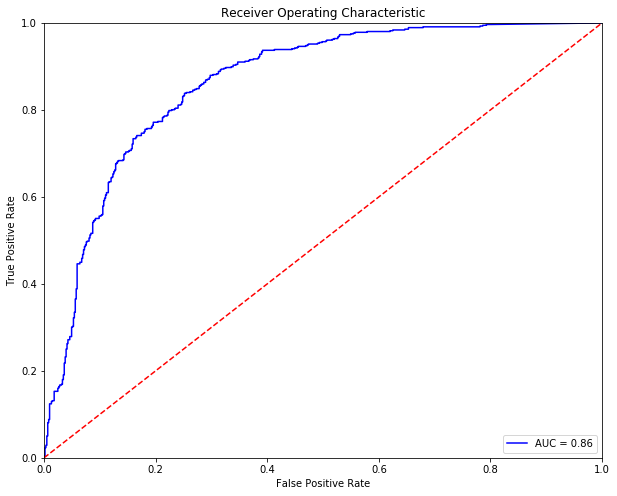

Optimal Threshold is 0.5138669282795044
Accuracy on test data is: 0.7852233676975945


Predicted  False  True  __all__
Actual                         
False        478   130      608
True         120   436      556
__all__      598   566     1164

In [488]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [489]:
table_80_50_PCA_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [490]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.5        50          ovr   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001

Accuracy of the  Logistic  model for the training data is: 0.7963917525773195

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1848   454     2302
True         494  1860     2354
__all__     2342  2314     4656

Accuracy of the  Logistic  model for test data is: 0.7740549828178694

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        477   131      608
True         132   424      556
__all__      609   555     1164

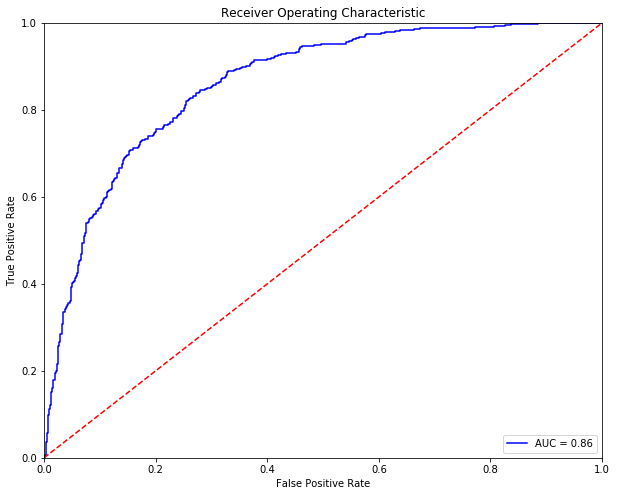

Optimal Threshold is 0.479087813056766
Accuracy on test data is: 0.7714776632302406


Predicted  False  True  __all__
Actual                         
False        469   139      608
True         127   429      556
__all__      596   568     1164

In [491]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [492]:
table_80_50_PCA_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [493]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7998281786941581

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1664   638     2302
True         294  2060     2354
__all__     1958  2698     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.781786941580756

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        433   175      608
True          79   477      556
__all__      512   652     1164

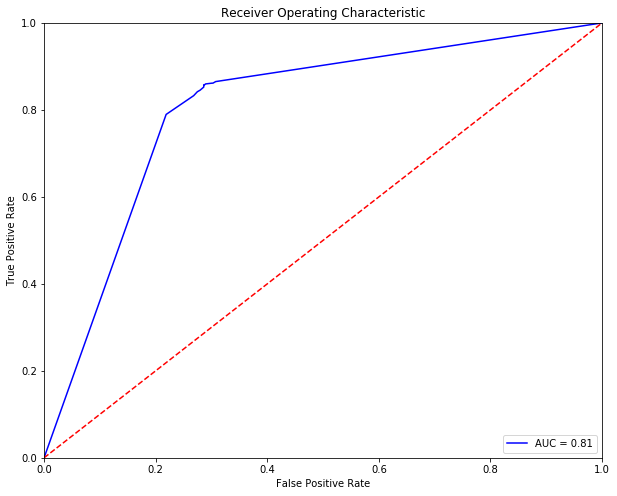

Optimal Threshold is 0.5600708893800384
Accuracy on test data is: 0.5223367697594502


Predicted   0.0  1.0  __all__
Actual                       
0.0         608    0      608
1.0         556    0      556
__all__    1164    0     1164

In [494]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [495]:
table_80_50_PCA_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

608
0
0
608
556
0
0
556
1.0
0.0
0.0
1.0


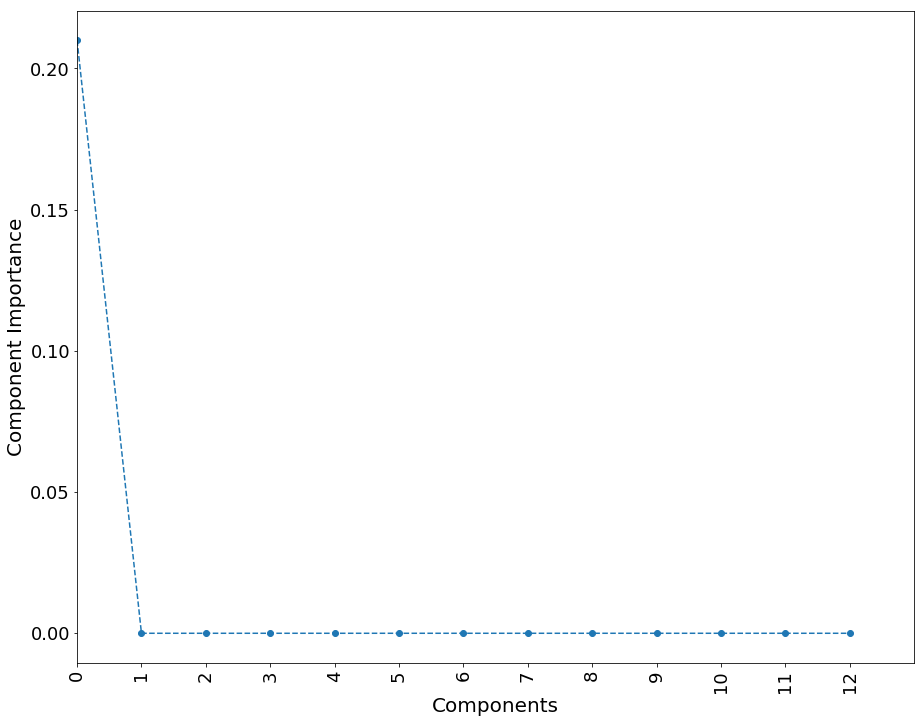

In [496]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [497]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8099226804123711

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1761   541     2302
True         344  2010     2354
__all__     2105  2551     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7878006872852233

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        449   159      608
True          88   468      556
__all__      537   627     1164

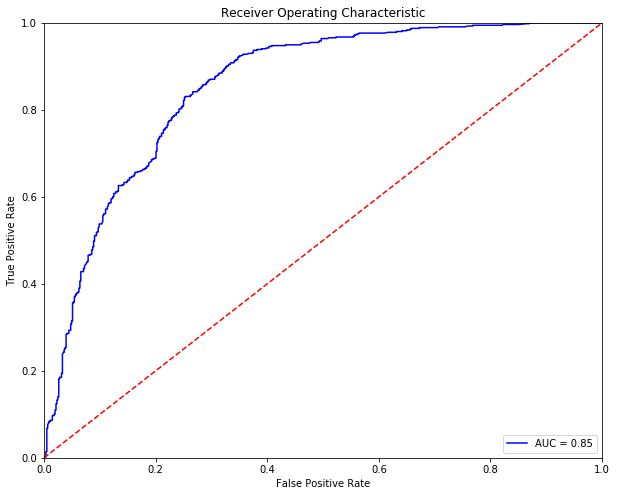

Optimal Threshold is 0.5013547325428175
Accuracy on test data is: 0.7749140893470791


Predicted  False  True  __all__
Actual                         
False        472   136      608
True         126   430      556
__all__      598   566     1164

In [498]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [499]:
table_80_50_PCA_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

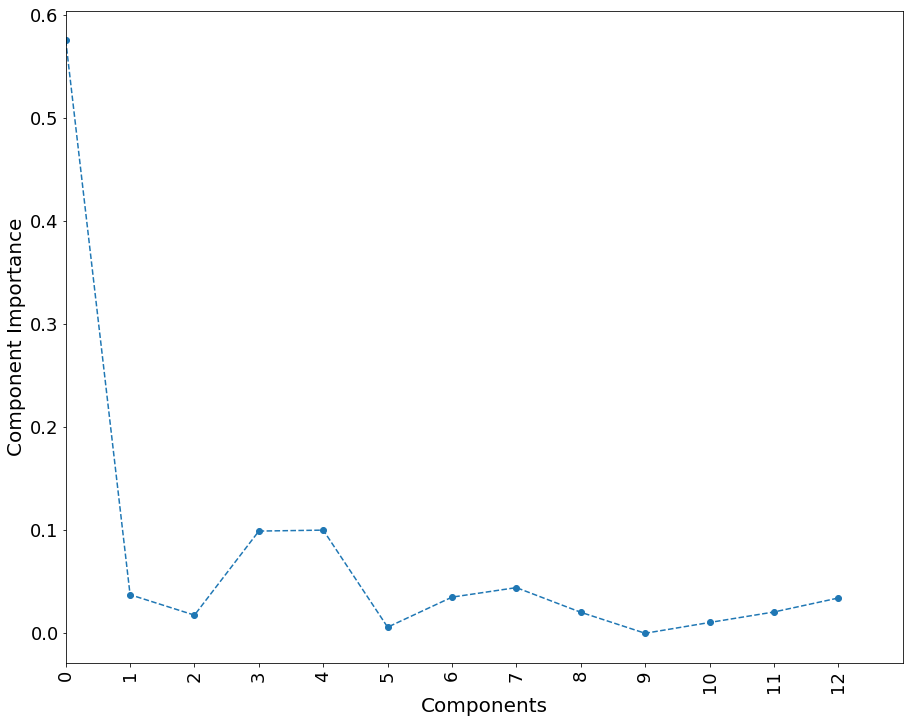

In [500]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [501]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse            0.2  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3            50             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8101374570446735

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1775   527     2302
True         357  1997     2354
__all__     2132  2524     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.7852233676975945

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        454   154      608
True          96   460      556
__all__      550   614     1164

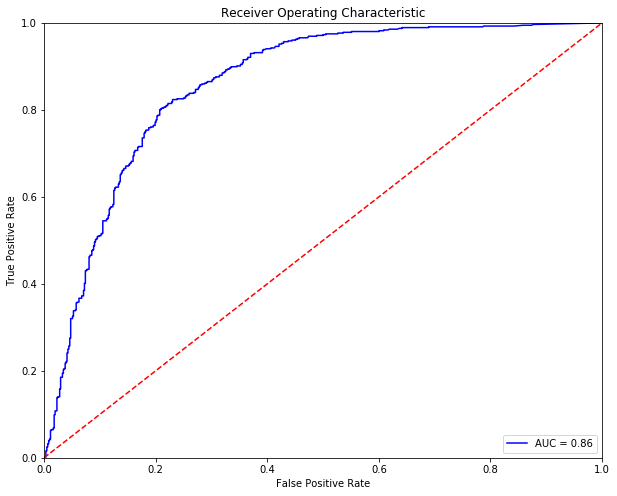

Optimal Threshold is 0.5951587328735359
Accuracy on test data is: 0.7912371134020618


Predicted  False  True  __all__
Actual                         
False        483   125      608
True         118   438      556
__all__      601   563     1164

In [502]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [503]:
table_80_50_PCA_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

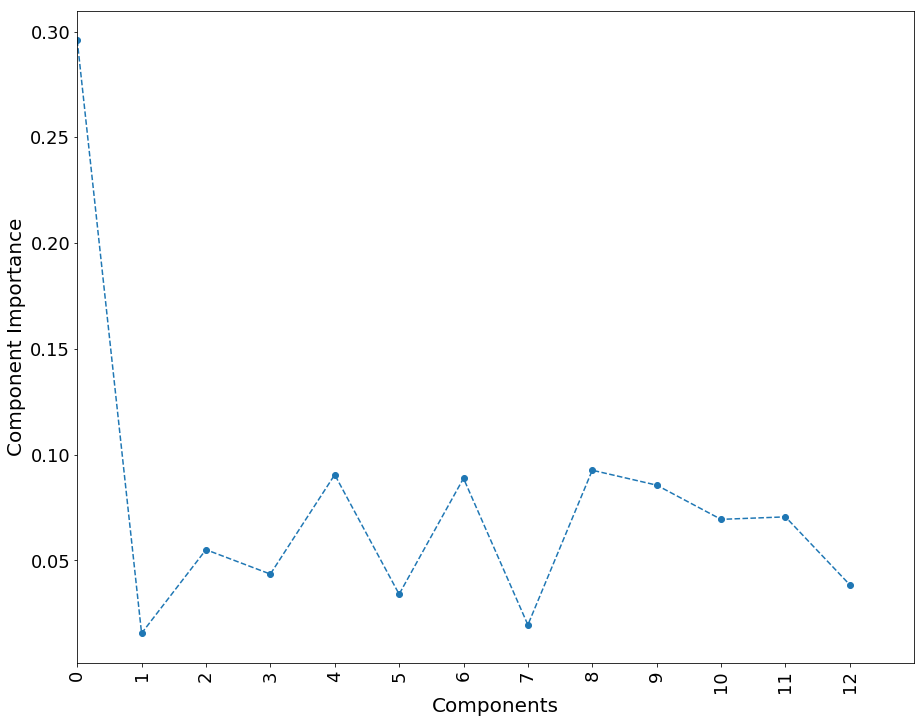

In [504]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [505]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8120704467353952

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1741   561     2302
True         314  2040     2354
__all__     2055  2601     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.7577319587628866

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        432   176      608
True         106   450      556
__all__      538   626     1164

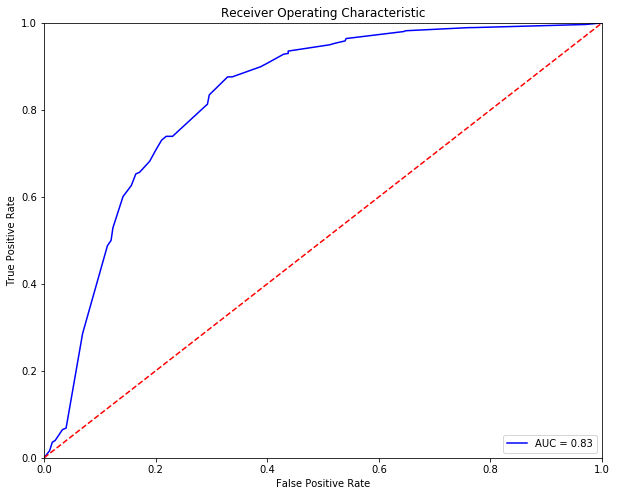

Optimal Threshold is 0.5263157894736842
Accuracy on test data is: 0.761168384879725


Predicted  False  True  __all__
Actual                         
False        475   133      608
True         145   411      556
__all__      620   544     1164

In [506]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [507]:
table_80_50_PCA_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [508]:
%%capture
table_80_50_PCA_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

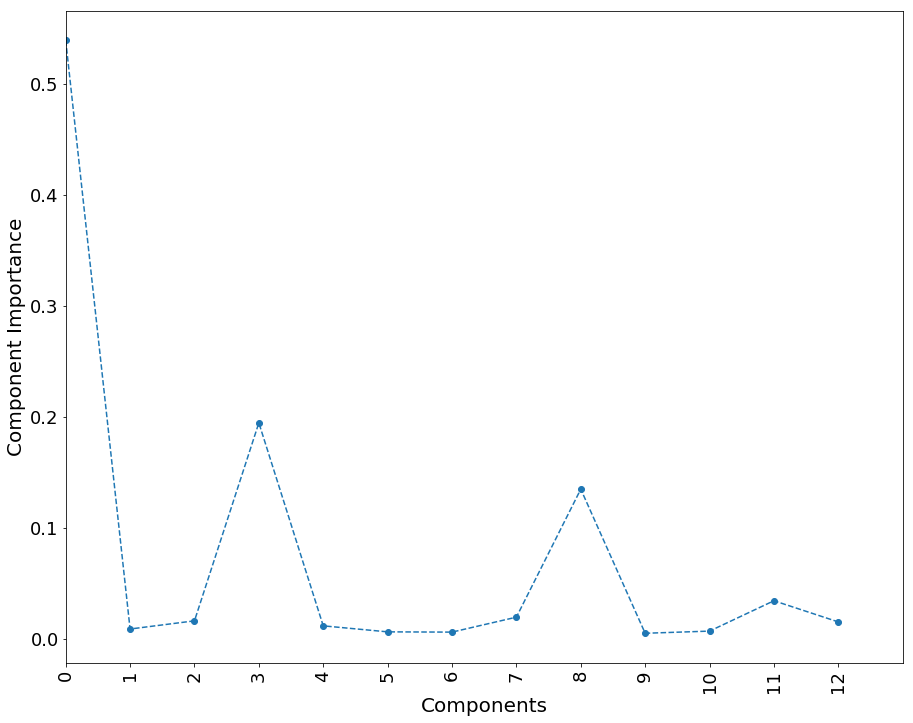

In [509]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [510]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9954896907216495

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2294     8     2302
True          13  2341     2354
__all__     2307  2349     4656

Accuracy of the  Bagging  model for test data is: 0.781786941580756

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        431   177      608
True          77   479      556
__all__      508   656     1164

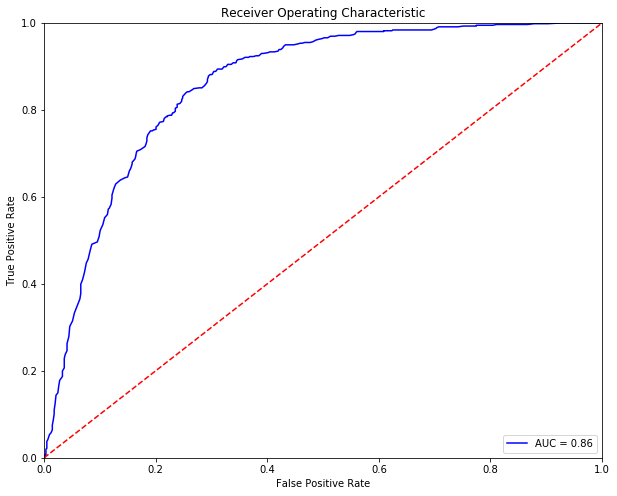

Optimal Threshold is 0.5933333333333334
Accuracy on test data is: 0.7826460481099656


Predicted  False  True  __all__
Actual                         
False        477   131      608
True         122   434      556
__all__      599   565     1164

In [511]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [512]:
table_80_50_PCA_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [513]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9254725085910653


Predicted  False  True  __all__
Actual                         
False       2090   212     2302
True         135  2219     2354
__all__     2225  2431     4656

The test accuracy is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False        458   150      608
True         102   454      556
__all__      560   604     1164

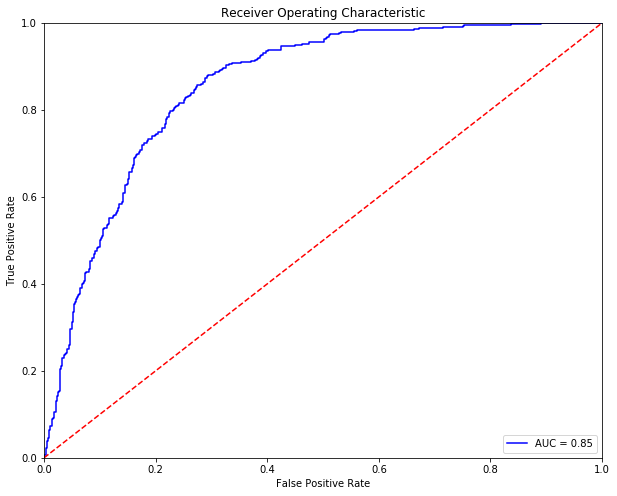

Optimal Threshold is 0.5484018945228597
Accuracy on test data is: 0.7800687285223368


Predicted  False  True  __all__
Actual                         
False        475   133      608
True         123   433      556
__all__      598   566     1164

In [514]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [515]:
table_80_50_PCA_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [516]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8524484536082474


Predicted  False  True  __all__
Actual                         
False       1915   387     2302
True         300  2054     2354
__all__     2215  2441     4656

The accuracy of the model on test data is: 0.7731958762886598


Predicted  False  True  __all__
Actual                         
False        454   154      608
True         110   446      556
__all__      564   600     1164

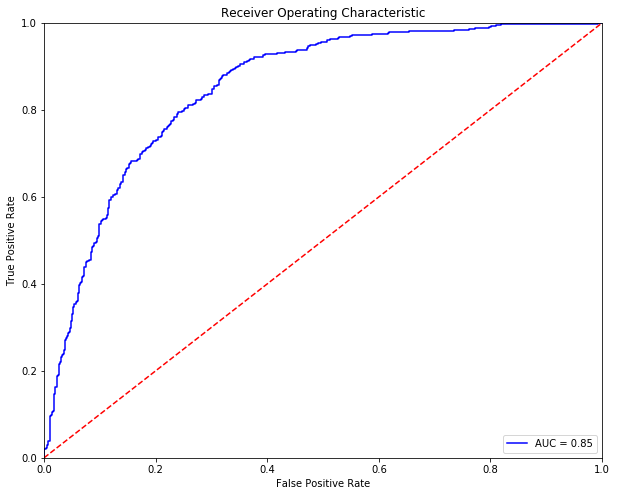

Optimal Threshold is 0.5569156
Accuracy of Logistic Model on training data is: 0.7723367697594502


Predicted  False  True  __all__
Actual                         
False        470   138      608
True         127   429      556
__all__      597   567     1164

In [517]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [518]:
table_80_50_PCA_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [519]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  9.0min finished


The accuracy of the model on training data is: 0.7976804123711341


Predicted  False  True  __all__
Actual                         
False       1659   643     2302
True         299  2055     2354
__all__     1958  2698     4656

The accuracy of the model on test data is: 0.7800687285223368


Predicted  False  True  __all__
Actual                         
False        429   179      608
True          77   479      556
__all__      506   658     1164

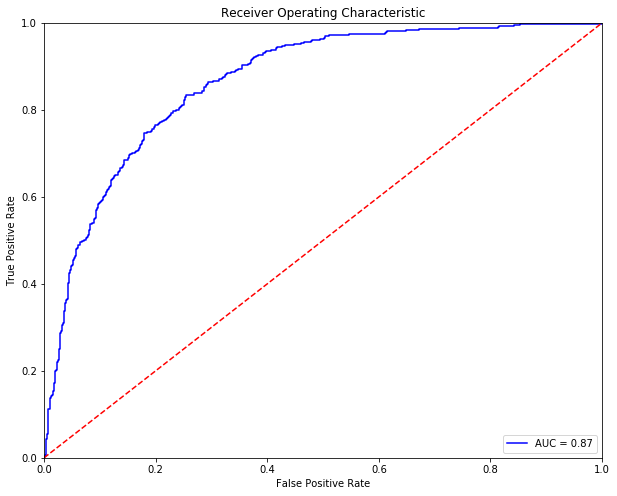

Optimal Threshold is 0.6693546
Accuracy on test data is: 0.7800687285223368


Predicted  False  True  __all__
Actual                         
False        475   133      608
True         123   433      556
__all__      598   566     1164

In [520]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [521]:
table_80_50_PCA_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [522]:
table_80_50_PCA_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2354.0  2302.0    0.0    0.0  0.000000   
LogisticRegression          0.796392  1860.0  1848.0  454.0  494.0  0.197220   
RandomForestClassifier      0.799828  2060.0  1664.0  638.0  294.0  0.277150   
AdaBoostClassifier          0.809923  2010.0  1761.0  541.0  344.0  0.235013   
GradientBoostingClassifier  0.810137  1997.0  1775.0  527.0  357.0  0.228931   
ExtraTreeClassifier         0.812070  2040.0  1741.0  561.0  314.0  0.243701   
BaggingClassifier           0.995490  2341.0  2294.0    8.0   13.0  0.003475   
VotingClassifier            0.925473  2219.0  2090.0  212.0  135.0  0.092094   
Neural Network-1            0.852448  2054.0  1915.0  387.0  300.0  0.168115   
Neural-Network-2            0.797680  2055.0  1659.0  643.0  299.0  0.279322   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.209856  
RandomForestClassifier      0.124894  
AdaBoostClassifier          0.146134  
GradientBoostingClassifier  0.151657  
ExtraTreeClassifier         0.133390  
BaggingClassifier           0.005523  
VotingClassifier            0.057349  
Neural Network-1            0.127443  
Neural-Network-2            0.127018

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.785223  441.0  473.0  135.0  115.0  0.222039   
LogisticRegression          0.774055  424.0  477.0  131.0  132.0  0.215461   
RandomForestClassifier      0.781787  477.0  433.0  175.0   79.0  0.287829   
AdaBoostClassifier          0.787801  468.0  449.0  159.0   88.0  0.261513   
GradientBoostingClassifier  0.785223  460.0  454.0  154.0   96.0  0.253289   
ExtraTreeClassifier         0.757732  450.0  432.0  176.0  106.0  0.289474   
BaggingClassifier           0.781787  479.0  431.0  177.0   77.0  0.291118   
VotingClassifier            0.783505  454.0  458.0  150.0  102.0  0.246711   
Neural Network-1            0.773196  446.0  454.0  154.0  110.0  0.253289   
Neural-Network-2            0.780069  479.0  429.0  179.0   77.0  0.294408   

                                 FNR  
index                                 
KNeighborsClassifier        0.206835  
LogisticRegression          0.237410  
RandomForestClassifier      0.142086  
AdaBoostClassifier          0.158273  
GradientBoostingClassifier  0.172662  
ExtraTreeClassifier         0.190647  
BaggingClassifier           0.138489  
VotingClassifier            0.183453  
Neural Network-1            0.197842  
Neural-Network-2            0.138489

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.785223  436.000000  478.000000  130.000000   
LogisticRegression          0.771478  429.000000  469.000000  139.000000   
RandomForestClassifier      0.522337  317.580756  290.419244  290.419244   
AdaBoostClassifier          0.774914  430.000000  472.000000  136.000000   
GradientBoostingClassifier  0.791237  438.000000  483.000000  125.000000   
ExtraTreeClassifier         0.761168  411.000000  475.000000  133.000000   
BaggingClassifier           0.782646  434.000000  477.000000  131.000000   
VotingClassifier            0.780069  433.000000  475.000000  133.000000   
Neural Network-1            0.772337  429.000000  470.000000  138.000000   
Neural-Network-2            0.780069  433.000000  475.000000  133.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        120.000000  0.213816  0.215827   0.513867   
LogisticRegression          127.000000  0.228618  0.228417   0.479088   
RandomForestClassifier      265.580756  0.522337  0.477663   0.560071   
AdaBoostClassifier          126.000000  0.223684  0.226619   0.501355   
GradientBoostingClassifier  118.000000  0.205592  0.212230   0.595159   
ExtraTreeClassifier         145.000000  0.218750  0.260791   0.526316   
BaggingClassifier           122.000000  0.215461  0.219424   0.593333   
VotingClassifier            123.000000  0.218750  0.221223   0.548402   
Neural Network-1            127.000000  0.226974  0.228417   0.556916   
Neural-Network-2            123.000000  0.218750  0.221223   0.669355   

                                 auc  
index                                 
KNeighborsClassifier        0.863132  
LogisticRegression          0.860555  
RandomForestClassifier      0.805779  
AdaBoostClassifier          0.854864  
GradientBoostingClassifier  0.858523  
ExtraTreeClassifier         0.827252  
BaggingClassifier           0.857466  
VotingClassifier            0.854328  
Neural Network-1            0.850708  
Neural-Network-2            0.865389

#### Random State 20

In [523]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_20.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  994  23    34  106  305   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   38   6     6    6   15   

                                                    NREC         PAR  \
User                                                                   
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  1011  280.252226   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    38   12.368421   

                                                           PAS        LEN  \
User                                                                        
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  164.641939  83.002967   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   10.394737  48.078947   

                                                             BYS  \
User                                                               
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  13987.476756   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   1728.315789   

                                                              BYR  0000  0100  \
User                                                                            
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  359758.589515     0     0   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    9966.815789     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     0     0     0     0   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     0     0     1     2   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...    58    80   103    68   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    1400  1500  1600  1700  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...    62   111   155   226   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    10    15    13     0   

                                                    1800  1900  2000  2100  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...   100    12    15     6   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    2200  2300  
User                                                            
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     8     4  
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0

1 -> Infected
0 -> Uninfected


User
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec429a3f1a997c5ba98    0
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9e976b79fa3511fa48    0
a70d401cfd6804c5711ae7620658b6be8b25483f999cb8bf73e44e011f877dd9    1
22730c54b8e7377fdfa932bf6b6c14741966f73ac8cc7d945fae9264c808afbb    0
47d304146c958a1134c7c928152e25972e4b8e660576183ae7dbca7d7db049db    1
c907dce84bf23f3a6d3557491ca1cd8299c7cf46a3fea156ed6d75cd73982d20    0
2de335ff62784aac8ad3bcb51dd0144c50b2d44135deb94ac508656f17b4111d    1
6686179791f655e042b2f5a0d6ebcdeb209ff33c0a2603941f4e0358e01390c1    0
4ada88478afa02b860f7d645393828b21da8a8cbd0e8fdd37b1c56a45de94f5c    0
757f0a16eec1045dfec4e23d7f6cd4a3f219bc6ba8f723741238f948eebb9681    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9376584264360198
The train/test split ratio is 80:20


In [524]:
display(X_pca_13[0:1])

array([[-0.51452931,  0.02879033, -0.14742758, -0.08591206,  0.20499883,
        -0.39542974, -0.03250354, -0.94658014, -0.53414061,  0.2566418 ,
         0.03790455,  0.40463664,  0.14263103]])

In [525]:
## Table to store training and test measures
table_80_50_PCA_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [526]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2357     0     2357
True           0  2299     2299
__all__     2357  2299     4656

Accuracy of the  KNN  model for test data is: 0.8067010309278351

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        441   112      553
True         113   498      611
__all__      554   610     1164

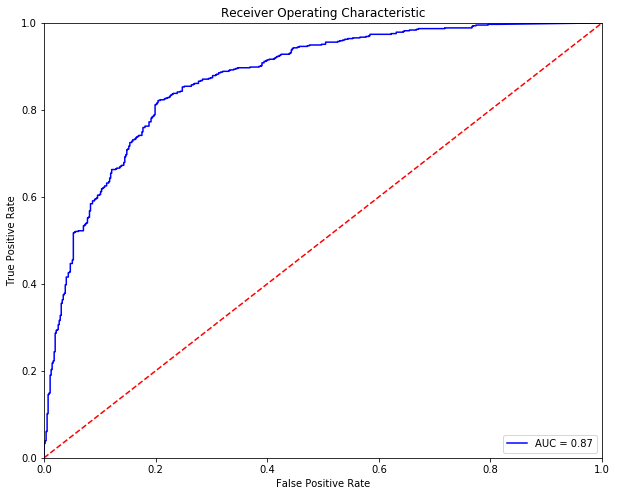

Optimal Threshold is 0.5041036962487141
Accuracy on test data is: 0.8058419243986255


Predicted  False  True  __all__
Actual                         
False        443   110      553
True         116   495      611
__all__      559   605     1164

In [527]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [528]:
table_80_50_PCA_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [529]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False          False                0.5        50  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001

Accuracy of the  Logistic  model for the training data is: 0.7835051546391752

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1895   462     2357
True         546  1753     2299
__all__     2441  2215     4656

Accuracy of the  Logistic  model for test data is: 0.7972508591065293

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        460    93      553
True         143   468      611
__all__      603   561     1164

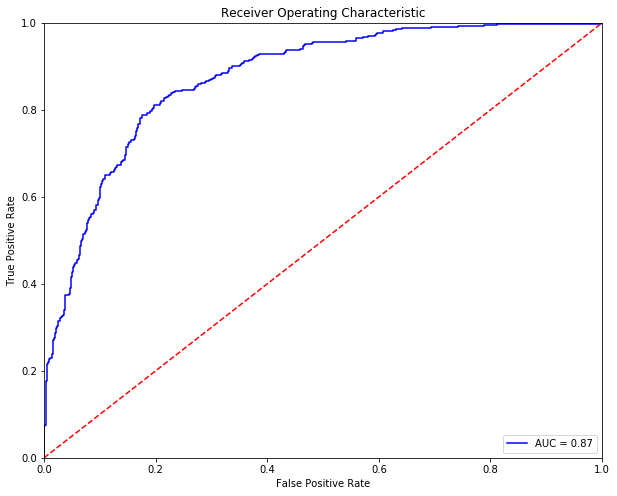

Optimal Threshold is 0.4694766091232793
Accuracy on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False        445   108      553
True         120   491      611
__all__      565   599     1164

In [530]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [531]:
table_80_50_PCA_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [532]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.789733676975945

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1709   648     2357
True         331  1968     2299
__all__     2040  2616     4656

Accuracy of the  Random Forest Trees  model for test data is: 0.8109965635738832

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        424   129      553
True          91   520      611
__all__      515   649     1164

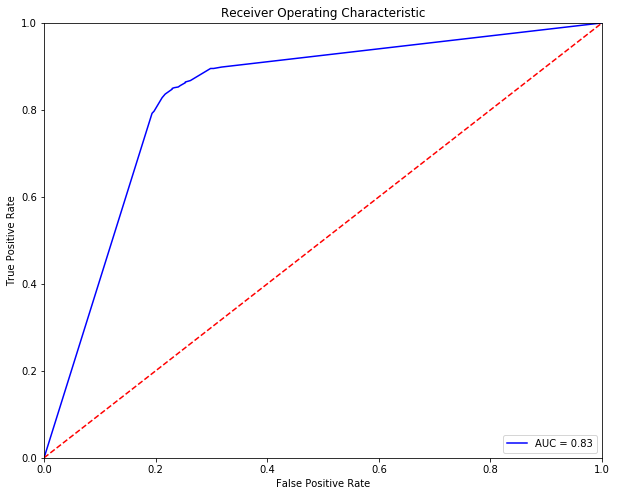

Optimal Threshold is 0.5447218125707719
Accuracy on test data is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False        446   107      553
True         127   484      611
__all__      573   591     1164

In [533]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [534]:
table_80_50_PCA_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

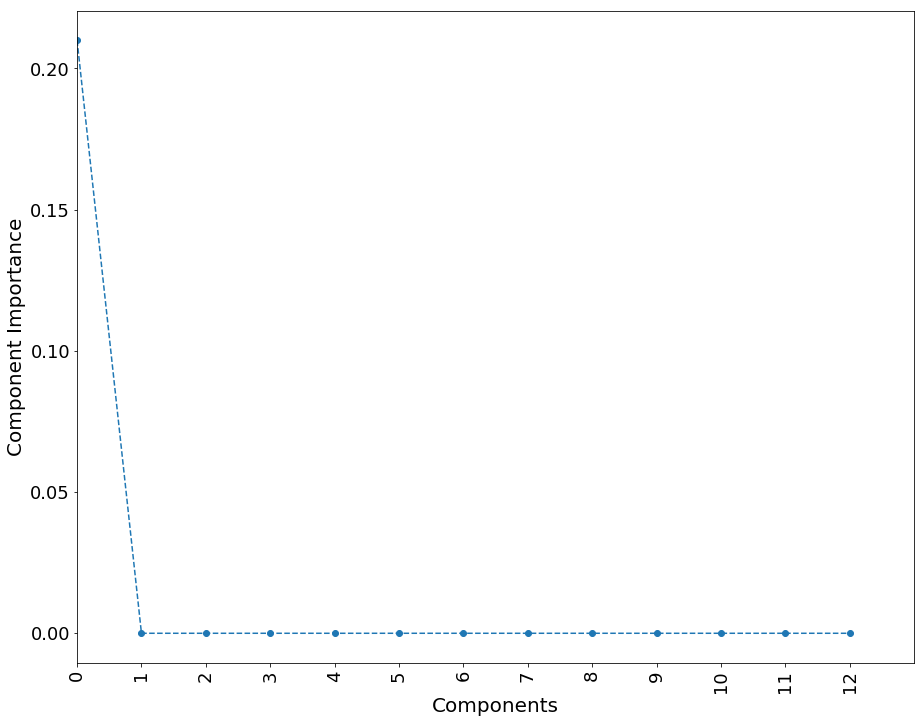

In [535]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [536]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.7974656357388317

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1765   592     2357
True         351  1948     2299
__all__     2116  2540     4656

Accuracy of the  AdaBoostClassifier  model for test data is: 0.820446735395189

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        439   114      553
True          95   516      611
__all__      534   630     1164

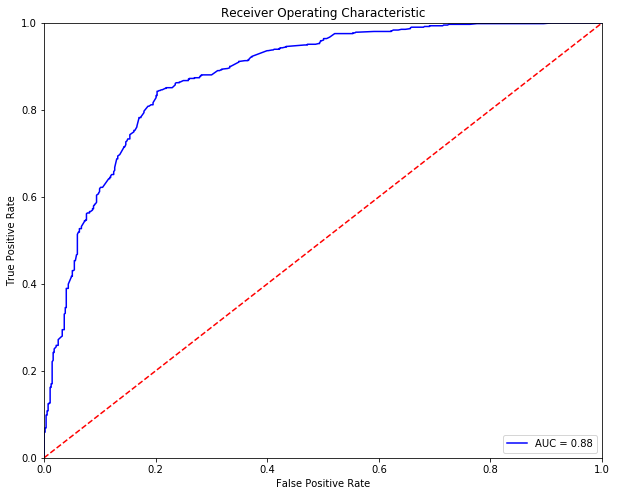

Optimal Threshold is 0.5032267717462324
Accuracy on test data is: 0.8109965635738832


Predicted  False  True  __all__
Actual                         
False        450   103      553
True         117   494      611
__all__      567   597     1164

In [537]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [538]:
table_80_50_PCA_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [539]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [540]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2           150             0          1

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8118556701030928

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1831   526     2357
True         350  1949     2299
__all__     2181  2475     4656

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8161512027491409

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        443   110      553
True         104   507      611
__all__      547   617     1164

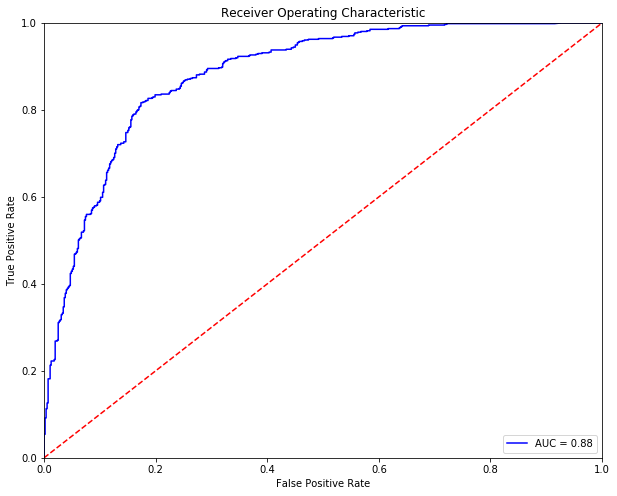

Optimal Threshold is 0.5259812728181922
Accuracy on test data is: 0.8187285223367697


Predicted  False  True  __all__
Actual                         
False        453   100      553
True         111   500      611
__all__      564   600     1164

In [541]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [542]:
table_80_50_PCA_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [543]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [544]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.7976804123711341

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1766   591     2357
True         351  1948     2299
__all__     2117  2539     4656

Accuracy of the  Extra Decision Tree  model for test data is: 0.7920962199312714

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        411   142      553
True         100   511      611
__all__      511   653     1164

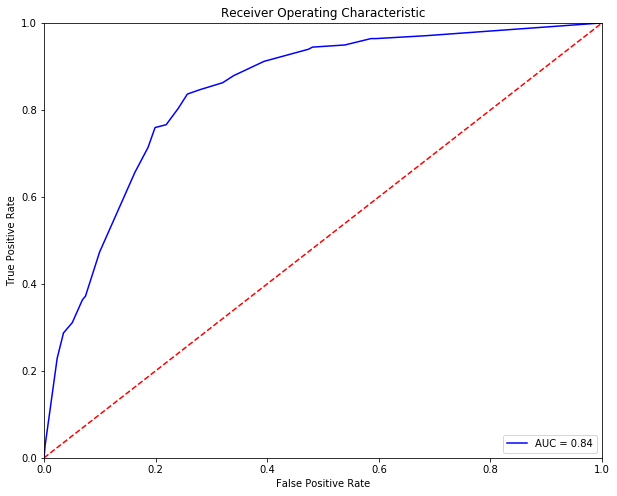

Optimal Threshold is 0.6274509803921569
Accuracy on test data is: 0.7792096219931272


Predicted  False  True  __all__
Actual                         
False        443   110      553
True         147   464      611
__all__      590   574     1164

In [545]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [546]:
table_80_50_PCA_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [547]:
%%capture
table_80_50_PCA_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

In [548]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [549]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9091494845360825

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2069   288     2357
True         135  2164     2299
__all__     2204  2452     4656

Accuracy of the  Bagging  model for test data is: 0.7946735395189003

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        411   142      553
True          97   514      611
__all__      508   656     1164

In [550]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

Optimal Threshold is 0.565
Accuracy on test data is: 0.8006872852233677


Predicted  False  True  __all__
Actual                         
False        446   107      553
True         125   486      611
__all__      571   593     1164

In [551]:
table_80_50_PCA_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [552]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.938573883161512


Predicted  False  True  __all__
Actual                         
False       2191   166     2357
True         120  2179     2299
__all__     2311  2345     4656

The test accuracy is: 0.7963917525773195


Predicted  False  True  __all__
Actual                         
False        441   112      553
True         125   486      611
__all__      566   598     1164

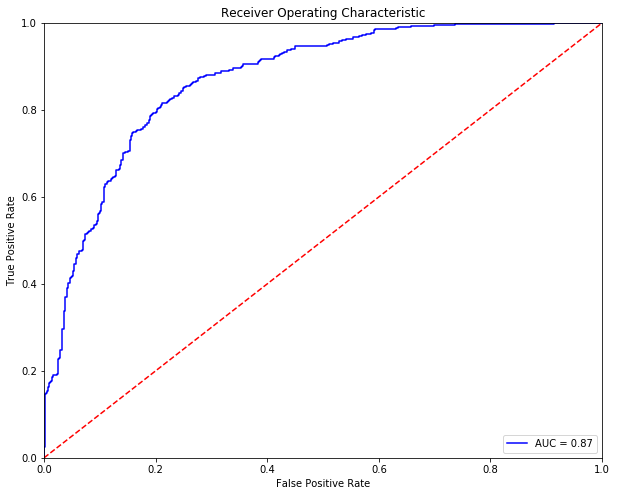

Optimal Threshold is 0.5000331108094274
Accuracy on test data is: 0.7972508591065293


Predicted  False  True  __all__
Actual                         
False        442   111      553
True         125   486      611
__all__      567   597     1164

In [553]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [554]:
table_80_50_PCA_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [555]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.843213058419244


Predicted  False  True  __all__
Actual                         
False       1881   476     2357
True         254  2045     2299
__all__     2135  2521     4656

The accuracy of the model on test data is: 0.7946735395189003


Predicted  False  True  __all__
Actual                         
False        415   138      553
True         101   510      611
__all__      516   648     1164

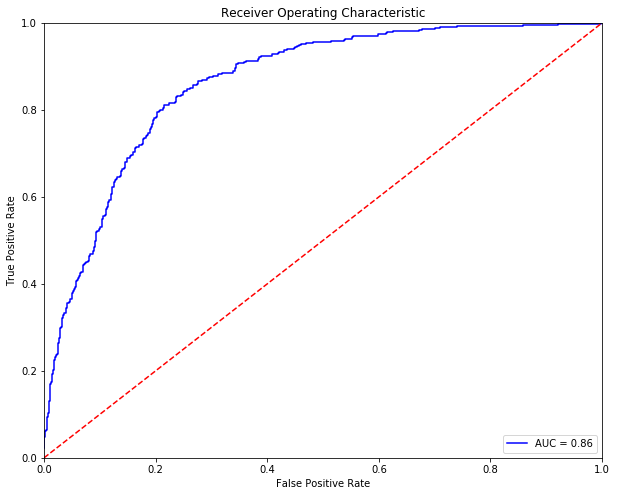

Optimal Threshold is 0.5882799
Accuracy of Logistic Model on training data is: 0.7955326460481099


Predicted  False  True  __all__
Actual                         
False        440   113      553
True         125   486      611
__all__      565   599     1164

In [556]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [557]:
table_80_50_PCA_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [558]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  9.9min finished


The accuracy of the model on training data is: 0.7878006872852233


Predicted  False  True  __all__
Actual                         
False       1603   754     2357
True         234  2065     2299
__all__     1837  2819     4656

The accuracy of the model on test data is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False        387   166      553
True          68   543      611
__all__      455   709     1164

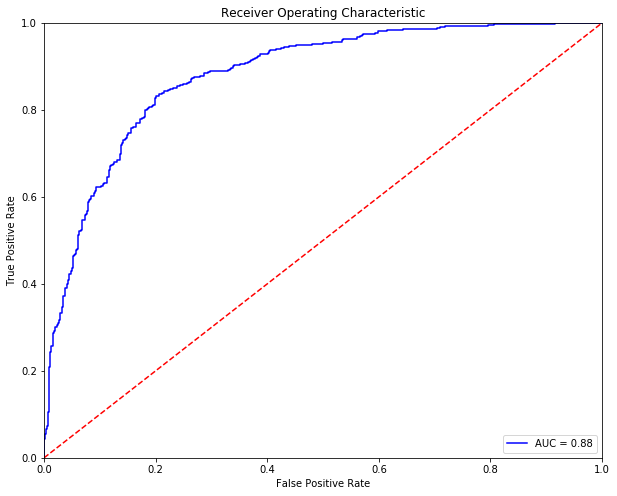

Optimal Threshold is 0.65208244
Accuracy on test data is: 0.8075601374570447


Predicted  False  True  __all__
Actual                         
False        447   106      553
True         118   493      611
__all__      565   599     1164

In [559]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [560]:
table_80_50_PCA_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [561]:
table_80_50_PCA_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2299.0  2357.0    0.0    0.0  0.000000   
LogisticRegression          0.783505  1753.0  1895.0  462.0  546.0  0.196012   
RandomForestClassifier      0.789734  1968.0  1709.0  648.0  331.0  0.274926   
AdaBoostClassifier          0.797466  1948.0  1765.0  592.0  351.0  0.251167   
GradientBoostingClassifier  0.811856  1949.0  1831.0  526.0  350.0  0.223165   
ExtraTreeClassifier         0.797680  1948.0  1766.0  591.0  351.0  0.250742   
BaggingClassifier           0.909149  2164.0  2069.0  288.0  135.0  0.122189   
VotingClassifier            0.938574  2179.0  2191.0  166.0  120.0  0.070429   
Neural Network-1            0.843213  2045.0  1881.0  476.0  254.0  0.201952   
Neural-Network-2            0.787801  2065.0  1603.0  754.0  234.0  0.319898   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.237495  
RandomForestClassifier      0.143976  
AdaBoostClassifier          0.152675  
GradientBoostingClassifier  0.152240  
ExtraTreeClassifier         0.152675  
BaggingClassifier           0.058721  
VotingClassifier            0.052197  
Neural Network-1            0.110483  
Neural-Network-2            0.101783

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.806701  498.0  441.0  112.0  113.0  0.202532   
LogisticRegression          0.797251  468.0  460.0   93.0  143.0  0.168174   
RandomForestClassifier      0.810997  520.0  424.0  129.0   91.0  0.233273   
AdaBoostClassifier          0.820447  516.0  439.0  114.0   95.0  0.206148   
GradientBoostingClassifier  0.816151  507.0  443.0  110.0  104.0  0.198915   
ExtraTreeClassifier         0.792096  511.0  411.0  142.0  100.0  0.256781   
BaggingClassifier           0.794674  514.0  411.0  142.0   97.0  0.256781   
VotingClassifier            0.796392  486.0  441.0  112.0  125.0  0.202532   
Neural Network-1            0.794674  510.0  415.0  138.0  101.0  0.249548   
Neural-Network-2            0.798969  543.0  387.0  166.0   68.0  0.300181   

                                 FNR  
index                                 
KNeighborsClassifier        0.184943  
LogisticRegression          0.234043  
RandomForestClassifier      0.148936  
AdaBoostClassifier          0.155483  
GradientBoostingClassifier  0.170213  
ExtraTreeClassifier         0.163666  
BaggingClassifier           0.158756  
VotingClassifier            0.204583  
Neural Network-1            0.165303  
Neural-Network-2            0.111293

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.805842  495.0  443.0  110.0  116.0  0.198915   
LogisticRegression          0.804124  491.0  445.0  108.0  120.0  0.195298   
RandomForestClassifier      0.798969  484.0  446.0  107.0  127.0  0.193490   
AdaBoostClassifier          0.810997  494.0  450.0  103.0  117.0  0.186257   
GradientBoostingClassifier  0.818729  500.0  453.0  100.0  111.0  0.180832   
ExtraTreeClassifier         0.779210  464.0  443.0  110.0  147.0  0.198915   
BaggingClassifier           0.800687  486.0  446.0  107.0  125.0  0.193490   
VotingClassifier            0.797251  486.0  442.0  111.0  125.0  0.200723   
Neural Network-1            0.795533  486.0  440.0  113.0  125.0  0.204340   
Neural-Network-2            0.807560  493.0  447.0  106.0  118.0  0.191682   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.189853   0.504104  0.872536  
LogisticRegression          0.196399   0.469477  0.874039  
RandomForestClassifier      0.207856   0.544722  0.831217  
AdaBoostClassifier          0.191489   0.503227  0.879899  
GradientBoostingClassifier  0.181669   0.525981  0.883562  
ExtraTreeClassifier         0.240589   0.627451  0.842061  
BaggingClassifier           0.204583   0.565000  0.875985  
VotingClassifier            0.204583   0.500033  0.870766  
Neural Network-1            0.204583   0.588280  0.862556  
Neural-Network-2            0.193126   0.652082  0.879766

In [562]:
table_80_50_PCA_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_PCA_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_PCA_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [563]:
table_80_50_PCA_train_avg['accuracy']=(table_80_50_PCA_0_train['accuracy']+table_80_50_PCA_10_train['accuracy']+table_80_50_PCA_20_train['accuracy'])/3.0
table_80_50_PCA_train_avg['FPR']=(table_80_50_PCA_0_train['FPR']+table_80_50_PCA_10_train['FPR']+table_80_50_PCA_20_train['FPR'])/3.0
table_80_50_PCA_train_avg['FNR']=(table_80_50_PCA_0_train['FNR']+table_80_50_PCA_10_train['FNR']+table_80_50_PCA_20_train['FNR'])/3.0

In [564]:
table_80_50_PCA_test_avg['accuracy']=(table_80_50_PCA_0_test['accuracy']+table_80_50_PCA_10_test['accuracy']+table_80_50_PCA_20_test['accuracy'])/3.0
table_80_50_PCA_test_avg['FPR']=(table_80_50_PCA_0_test['FPR']+table_80_50_PCA_10_test['FPR']+table_80_50_PCA_20_test['FPR'])/3.0
table_80_50_PCA_test_avg['FNR']=(table_80_50_PCA_0_test['FNR']+table_80_50_PCA_10_test['FNR']+table_80_50_PCA_20_test['FNR'])/3.0

In [565]:
table_80_50_PCA_test_roc_avg['accuracy']=(table_80_50_PCA_0_test_roc['accuracy']+table_80_50_PCA_10_test_roc['accuracy']+table_80_50_PCA_20_test_roc['accuracy'])/3.0
table_80_50_PCA_test_roc_avg['FPR']=(table_80_50_PCA_0_test_roc['FPR']+table_80_50_PCA_10_test_roc['FPR']+table_80_50_PCA_20_test_roc['FPR'])/3.0
table_80_50_PCA_test_roc_avg['FNR']=(table_80_50_PCA_0_test_roc['FNR']+table_80_50_PCA_10_test_roc['FNR']+table_80_50_PCA_20_test_roc['FNR'])/3.0
table_80_50_PCA_test_roc_avg['auc']=(table_80_50_PCA_0_test_roc['auc']+table_80_50_PCA_10_test_roc['auc']+table_80_50_PCA_20_test_roc['auc'])/3.0

In [566]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.787944  0.196104  0.228068
RandomForestClassifier      0.794172  0.274372  0.137507
AdaBoostClassifier          0.803909  0.242480  0.149767
GradientBoostingClassifier  0.810853  0.224645  0.153743
ExtraTreeClassifier         0.803265  0.251996  0.141671
BaggingClassifier           0.933849  0.089363  0.042791
VotingClassifier            0.932918  0.082371  0.051906
Neural Network-1            0.844072  0.203632  0.108238
Neural-Network-2            0.794530  0.276132  0.134554

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.799828  0.202232  0.198310
LogisticRegression          0.791810  0.184089  0.231874
RandomForestClassifier      0.798683  0.257456  0.143709
AdaBoostClassifier          0.804983  0.232897  0.155957
GradientBoostingClassifier  0.805269  0.221561  0.166831
ExtraTreeClassifier         0.780069  0.268650  0.170644
BaggingClassifier           0.796105  0.258519  0.148119
VotingClassifier            0.796392  0.218887  0.187139
Neural Network-1            0.786082  0.259799  0.167750
Neural-Network-2            0.794387  0.270709  0.141054

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.800401  0.200534  0.198858  0.870471
LogisticRegression          0.792955  0.206511  0.207572  0.870000
RandomForestClassifier      0.610252  0.408426  0.392023  0.822790
AdaBoostClassifier          0.797251  0.200728  0.204752  0.868047
GradientBoostingClassifier  0.806128  0.192327  0.195515  0.873092
ExtraTreeClassifier         0.774628  0.201616  0.249439  0.840813
BaggingClassifier           0.796678  0.199836  0.206718  0.869991
VotingClassifier            0.793814  0.204468  0.207901  0.864566
Neural Network-1            0.784078  0.215722  0.216137  0.857785
Neural-Network-2            0.798396  0.200892  0.202331  0.874234

###  <a id='1.D' style="text-decoration : none; color : #000000;">70:30 Train Test Split with PCA</a>
#### Random State 0

In [567]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_0.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP   DIP  \
User                                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  6855  69    70  102  1503   
3c45372db59b842faec38488806b64c282270417f6755ba...    13   4     4    3     8   

                                                    NREC         PAR  \
User                                                                   
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  7494  182.050440   
3c45372db59b842faec38488806b64c282270417f6755ba...    13   97.769231   

                                                          PAS         LEN  \
User                                                                        
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  70.107419  109.414331   
3c45372db59b842faec38488806b64c282270417f6755ba...  90.000000   88.461538   

                                                             BYS  \
User                                                               
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  18672.453563   
3c45372db59b842faec38488806b64c282270417f6755ba...   7757.153846   

                                                              BYR  0000  0100  \
User                                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...  223011.614091   319   339   
3c45372db59b842faec38488806b64c282270417f6755ba...  120738.153846     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   265   588   981   782   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   183   139    87   167   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...    70   122   149   313   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     5     0   

                                                    1400  1500  1600  1700  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   268   399   825   309   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     1     7     0   

                                                    1800  1900  2000  2100  \
User                                                                         
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   223   264   229   125   
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0     0     0   

                                                    2200  2300  
User                                                            
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cd...   126   222  
3c45372db59b842faec38488806b64c282270417f6755ba...     0     0

1 -> Infected
0 -> Uninfected


User
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953    1
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402    0
653fe3e24024826e008a512560be7abb15b06bd46e89ba4159dbdc6b8b5983c3    0
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107    1
ac87be58a25e50356ef8d66135f93392ac6c40f3c7b557e7c16f663ce168e9fc    1
8df0db56b5bb9ff4cc7b00413a2a4c211db8a7d9d4dcf78a73cd79904bc395cd    1
e3a357295e4a68d988b39f98f9751f6ea4098f7443b6ca0fff6f5d6c804d36f5    0
481ba91002ea25e7b1470715bc8dbb26dff02ad090bba34cc8cc3188e4a49813    1
9bf5181f7d61d1d2357434a6f710f3630c854a1b692dc7f6f3d3b2697f1a983d    1
e5615a3ffc7932b6beb79fdbb4adca13f9a0fb79f3210a0ef275419005e37268    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9392012639691998
The train/test split ratio is 70:30


In [568]:
display(X_pca_13[0:1])

array([[ 0.56688539,  0.02745154, -0.0152951 ,  0.14080916, -0.8121737 ,
        -0.02917753,  0.28777364, -0.18640774, -3.30589935, -1.69785299,
         2.16904765, -0.45300289, -0.27789365]])

In [569]:
## Table to store training and test measures
table_70_50_PCA_0_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_0_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_0_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [570]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2028     0     2028
True           0  2046     2046
__all__     2028  2046     4074

Accuracy of the  KNN  model for test data is: 0.8098510882016037

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        732   150      882
True         182   682      864
__all__      914   832     1746

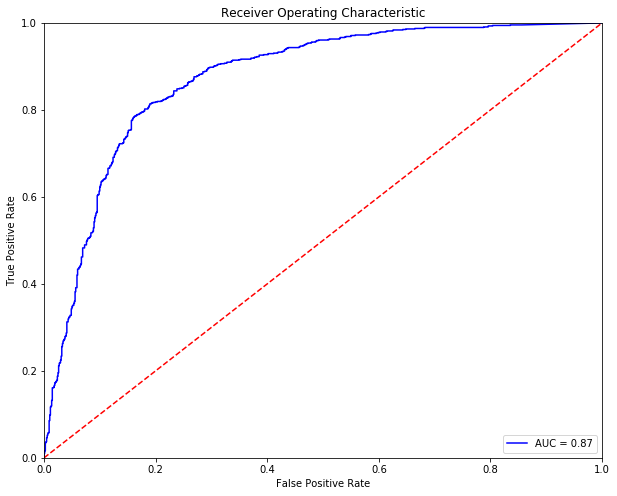

Optimal Threshold is 0.4721578173753999
Accuracy on test data is: 0.8109965635738832


Predicted  False  True  __all__
Actual                         
False        716   166      882
True         164   700      864
__all__      880   866     1746

In [571]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [572]:
table_70_50_PCA_0_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [573]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5        50          ovr   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001

Accuracy of the  Logistic  model for the training data is: 0.7812960235640648

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1625   403     2028
True         488  1558     2046
__all__     2113  1961     4074

Accuracy of the  Logistic  model for test data is: 0.7989690721649485

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        731   151      882
True         200   664      864
__all__      931   815     1746

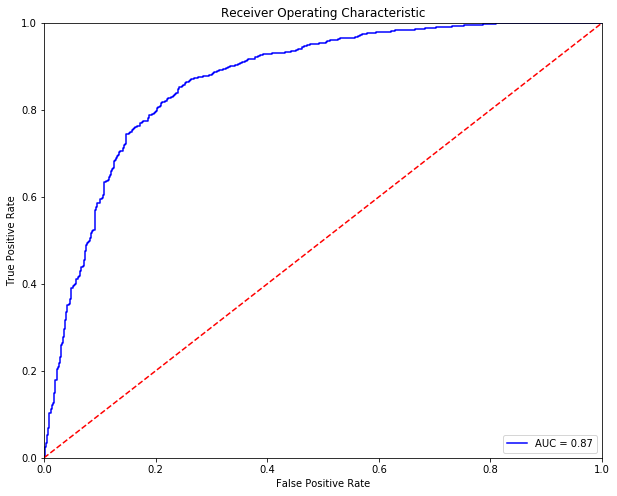

Optimal Threshold is 0.4608245121163282
Accuracy on test data is: 0.7983963344788088


Predicted  False  True  __all__
Actual                         
False        705   177      882
True         175   689      864
__all__      880   866     1746

In [574]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [575]:
table_70_50_PCA_0_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [576]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7896416298478154

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1448   580     2028
True         277  1769     2046
__all__     1725  2349     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.800114547537228

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        644   238      882
True         111   753      864
__all__      755   991     1746

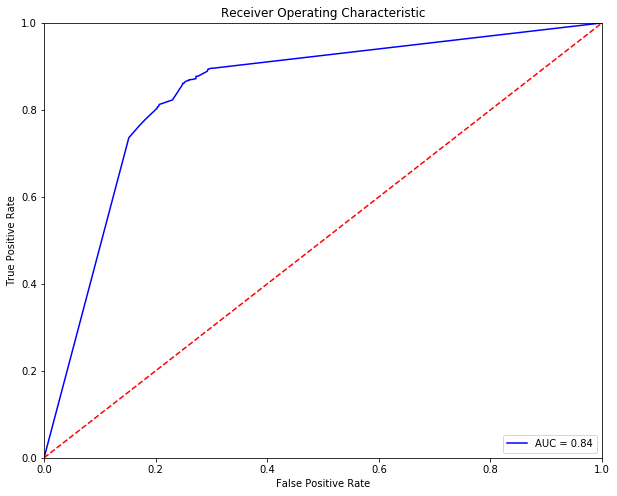

Optimal Threshold is 0.5504912946381939
Accuracy on test data is: 0.7983963344788088


Predicted  False  True  __all__
Actual                         
False        723   159      882
True         193   671      864
__all__      916   830     1746

In [577]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [578]:
table_70_50_PCA_0_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

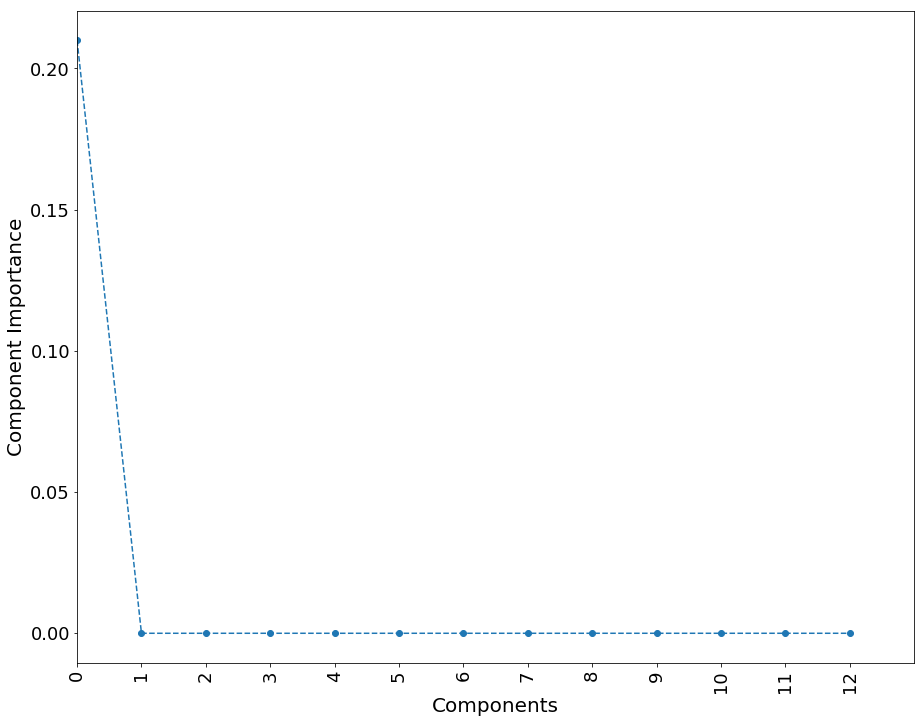

In [579]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [580]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8009327442317133

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1540   488     2028
True         323  1723     2046
__all__     1863  2211     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7989690721649485

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        669   213      882
True         138   726      864
__all__      807   939     1746

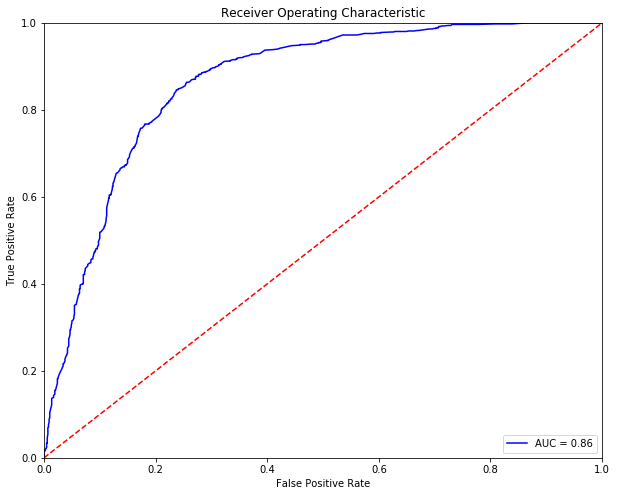

Optimal Threshold is 0.5009541791728879
Accuracy on test data is: 0.7903780068728522


Predicted  False  True  __all__
Actual                         
False        701   181      882
True         185   679      864
__all__      886   860     1746

In [581]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [582]:
table_70_50_PCA_0_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [583]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [584]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1           100             0          1

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8124693176239568

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1576   452     2028
True         312  1734     2046
__all__     1888  2186     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8075601374570447

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        680   202      882
True         134   730      864
__all__      814   932     1746

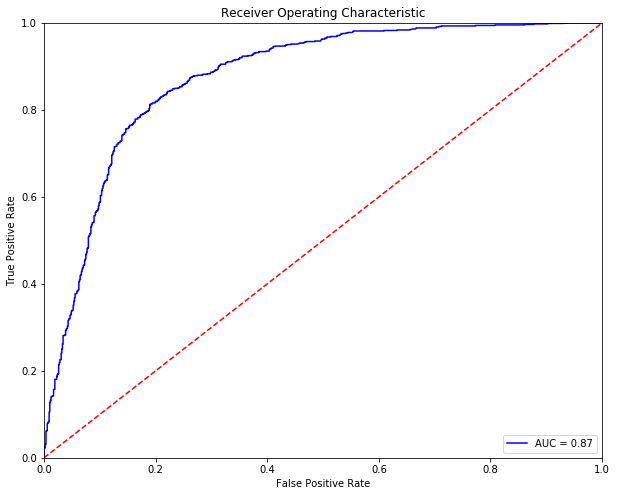

Optimal Threshold is 0.5708640042885383
Accuracy on test data is: 0.8104238258877434


Predicted  False  True  __all__
Actual                         
False        715   167      882
True         164   700      864
__all__      879   867     1746

In [585]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [586]:
table_70_50_PCA_0_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

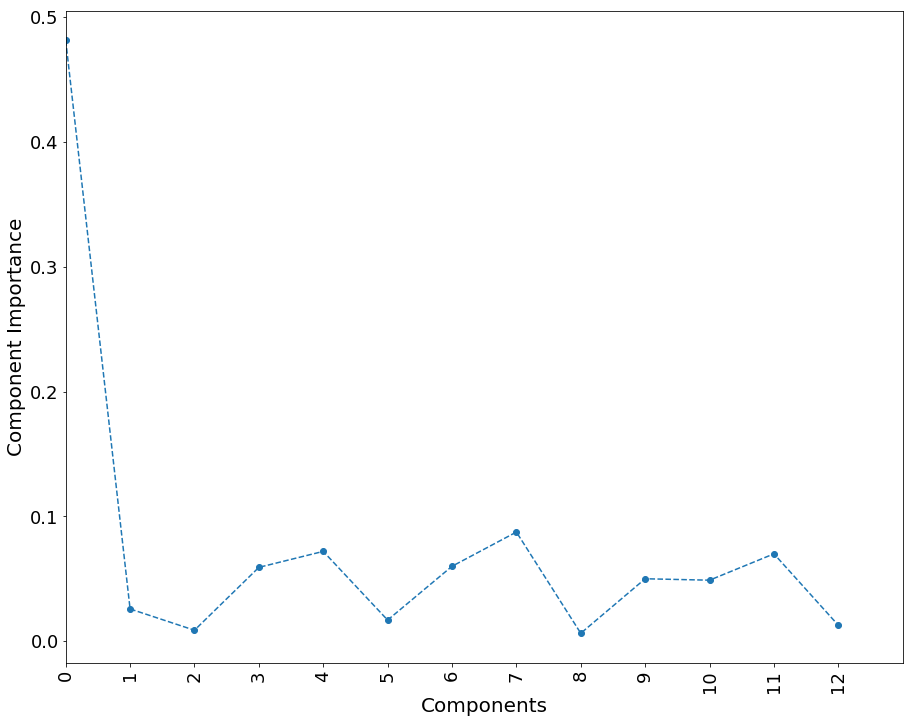

In [587]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [588]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.7974963181148749

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1540   488     2028
True         337  1709     2046
__all__     1877  2197     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.7829324169530355

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        657   225      882
True         154   710      864
__all__      811   935     1746

In [589]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

Optimal Threshold is 0.5958904109589042
Accuracy on test data is: 0.7628865979381443


Predicted  False  True  __all__
Actual                         
False        699   183      882
True         231   633      864
__all__      930   816     1746

In [590]:
table_70_50_PCA_0_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [591]:
%%capture
table_70_50_PCA_0_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

In [592]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [593]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.6           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9921453117329406

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2017    11     2028
True          21  2025     2046
__all__     2038  2036     4074

Accuracy of the  Bagging  model for test data is: 0.800114547537228

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        667   215      882
True         134   730      864
__all__      801   945     1746

In [594]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

Optimal Threshold is 0.565
Accuracy on test data is: 0.8109965635738832


Predicted  False  True  __all__
Actual                         
False        719   163      882
True         167   697      864
__all__      886   860     1746

In [595]:
table_70_50_PCA_0_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [596]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9366715758468336


Predicted  False  True  __all__
Actual                         
False       1872   156     2028
True         102  1944     2046
__all__     1974  2100     4074

The test accuracy is: 0.8104238258877434


Predicted  False  True  __all__
Actual                         
False        696   186      882
True         145   719      864
__all__      841   905     1746

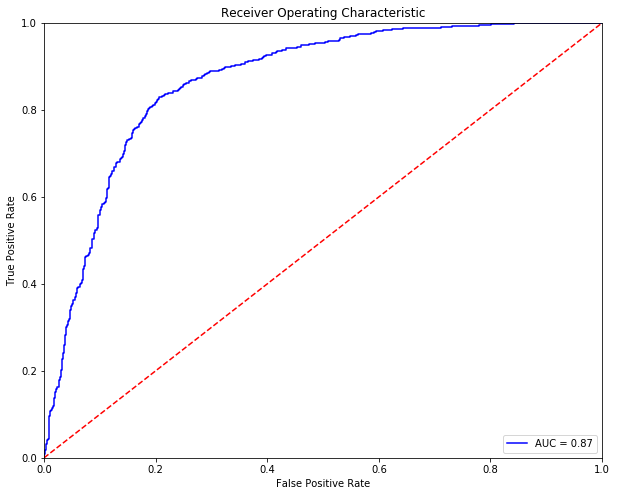

Optimal Threshold is 0.5232216618167835
Accuracy on test data is: 0.8075601374570447


Predicted  False  True  __all__
Actual                         
False        713   169      882
True         167   697      864
__all__      880   866     1746

In [597]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [598]:
table_70_50_PCA_0_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [599]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8399607265001428


Predicted  False  True  __all__
Actual                         
False       1593   435     2028
True         217  1829     2046
__all__     1810  2264     4074

The accuracy of the model on test data is: 0.7777777777777778


Predicted  False  True  __all__
Actual                         
False        641   241      882
True         147   717      864
__all__      788   958     1746

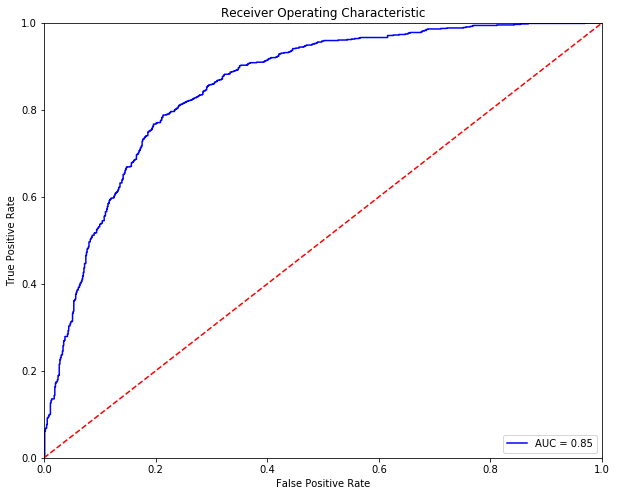

Optimal Threshold is 0.59155476
Accuracy of Logistic Model on training data is: 0.7869415807560137


Predicted  False  True  __all__
Actual                         
False        694   188      882
True         184   680      864
__all__      878   868     1746

In [600]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [601]:
table_70_50_PCA_0_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [602]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 11.1min finished


The accuracy of the model on training data is: 0.7943053510063819


Predicted  False  True  __all__
Actual                         
False       1518   510     2028
True         328  1718     2046
__all__     1846  2228     4074

The accuracy of the model on test data is: 0.8029782359679267


Predicted  False  True  __all__
Actual                         
False        666   216      882
True         128   736      864
__all__      794   952     1746

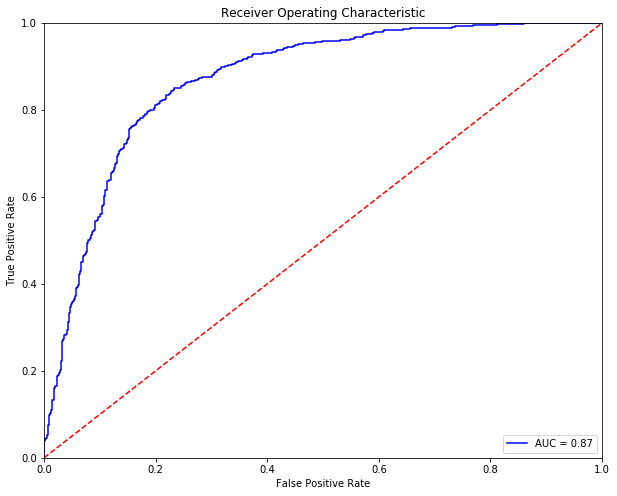

Optimal Threshold is 0.61951065
Accuracy on test data is: 0.802405498281787


Predicted  False  True  __all__
Actual                         
False        708   174      882
True         171   693      864
__all__      879   867     1746

In [603]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [604]:
table_70_50_PCA_0_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [605]:
table_70_50_PCA_0_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_0_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_0_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_0_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_0_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_0_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_0_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_0_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_0_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2046.0  2028.0    0.0    0.0  0.000000   
LogisticRegression          0.781296  1558.0  1625.0  403.0  488.0  0.198718   
RandomForestClassifier      0.789642  1769.0  1448.0  580.0  277.0  0.285996   
AdaBoostClassifier          0.800933  1723.0  1540.0  488.0  323.0  0.240631   
GradientBoostingClassifier  0.812469  1734.0  1576.0  452.0  312.0  0.222880   
ExtraTreeClassifier         0.797496  1709.0  1540.0  488.0  337.0  0.240631   
BaggingClassifier           0.992145  2025.0  2017.0   11.0   21.0  0.005424   
VotingClassifier            0.936672  1944.0  1872.0  156.0  102.0  0.076923   
Neural Network-1            0.839961  1829.0  1593.0  435.0  217.0  0.214497   
Neural-Network-2            0.794305  1718.0  1518.0  510.0  328.0  0.251479   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.238514  
RandomForestClassifier      0.135386  
AdaBoostClassifier          0.157869  
GradientBoostingClassifier  0.152493  
ExtraTreeClassifier         0.164712  
BaggingClassifier           0.010264  
VotingClassifier            0.049853  
Neural Network-1            0.106061  
Neural-Network-2            0.160313

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.809851  682.0  732.0  150.0  182.0  0.170068   
LogisticRegression          0.798969  664.0  731.0  151.0  200.0  0.171202   
RandomForestClassifier      0.800115  753.0  644.0  238.0  111.0  0.269841   
AdaBoostClassifier          0.798969  726.0  669.0  213.0  138.0  0.241497   
GradientBoostingClassifier  0.807560  730.0  680.0  202.0  134.0  0.229025   
ExtraTreeClassifier         0.782932  710.0  657.0  225.0  154.0  0.255102   
BaggingClassifier           0.800115  730.0  667.0  215.0  134.0  0.243764   
VotingClassifier            0.810424  719.0  696.0  186.0  145.0  0.210884   
Neural Network-1            0.777778  717.0  641.0  241.0  147.0  0.273243   
Neural-Network-2            0.802978  736.0  666.0  216.0  128.0  0.244898   

                                 FNR  
index                                 
KNeighborsClassifier        0.210648  
LogisticRegression          0.231481  
RandomForestClassifier      0.128472  
AdaBoostClassifier          0.159722  
GradientBoostingClassifier  0.155093  
ExtraTreeClassifier         0.178241  
BaggingClassifier           0.155093  
VotingClassifier            0.167824  
Neural Network-1            0.170139  
Neural-Network-2            0.148148

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.810997  700.0  716.0  166.0  164.0  0.188209   
LogisticRegression          0.798396  689.0  705.0  177.0  175.0  0.200680   
RandomForestClassifier      0.798396  671.0  723.0  159.0  193.0  0.180272   
AdaBoostClassifier          0.790378  679.0  701.0  181.0  185.0  0.205215   
GradientBoostingClassifier  0.810424  700.0  715.0  167.0  164.0  0.189342   
ExtraTreeClassifier         0.762887  633.0  699.0  183.0  231.0  0.207483   
BaggingClassifier           0.810997  697.0  719.0  163.0  167.0  0.184807   
VotingClassifier            0.807560  697.0  713.0  169.0  167.0  0.191610   
Neural Network-1            0.786942  680.0  694.0  188.0  184.0  0.213152   
Neural-Network-2            0.802405  693.0  708.0  174.0  171.0  0.197279   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.189815   0.472158  0.872742  
LogisticRegression          0.202546   0.460825  0.870061  
RandomForestClassifier      0.223380   0.550491  0.841517  
AdaBoostClassifier          0.214120   0.500954  0.863557  
GradientBoostingClassifier  0.189815   0.570864  0.874855  
ExtraTreeClassifier         0.267361   0.595890  0.836340  
BaggingClassifier           0.193287   0.565000  0.870372  
VotingClassifier            0.193287   0.523222  0.867558  
Neural Network-1            0.212963   0.591555  0.854787  
Neural-Network-2            0.197917   0.619511  0.870090

#### Random State 10

In [606]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_10.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP   DP  NAPP  SIP  \
User                                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  4555  135    61  234   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  9874   59    59  112   

                                                     DIP   NREC         PAR  \
User                                                                          
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1180   5030  132.304771   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  2319  11943   72.815373   

                                                          PAS         LEN  \
User                                                                        
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  73.091252  117.687475   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  68.967847   53.259315   

                                                             BYS  \
User                                                               
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  16211.290656   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...  33132.043708   

                                                              BYR  0000  0100  \
User                                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  162537.369185   505   537   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   73635.531525   226   124   

                                                    0200  0300  0400  0500  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   405   191   123    63   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   250   322   544  1307   

                                                    0600  0700  0800  0900  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    55    31    60    58   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   803   855   806   600   

                                                    1000  1100  1200  1300  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    68   140   306   137   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   729   512   249   247   

                                                    1400  1500  1600  1700  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   125   191   109   234   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   321   471   643   417   

                                                    1800  1900  2000  2100  \
User                                                                         
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   264   244   361   205   
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   561   406   539   466   

                                                    2200  2300  
User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   399   219  
910f8814c078483a86a1030fa3fce449aaeafd169b144fb...   373   172

1 -> Infected
0 -> Uninfected


User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
910f8814c078483a86a1030fa3fce449aaeafd169b144fb3131f4c1577252cc3    1
117f95f1e1e2f68a2fcbb99523c4d6b2cd4307a559b566c799ea644cefadcf3b    0
4d648f5609b96f24133ff4ca6473d1bc6ae1e4d8723701c182c856b3eb4abebb    1
d225251f106c00909acb89ddc8766a8221b31e5d48cf3cd0d1dbbb877c47e30a    1
bc061b23b6d1179d337399a71613b80018088f800da352cb1e7d144a3b2d3071    0
a7c5796a8ab263860b6c5eec4327a0ec0b27b9ca4ccf4295c2f92a13e30be632    1
cf239e821992dafc5c241fe455516522cc2d9373e29ae5b98fad3f9b280fc411    1
4141438cff5d7504861d7975f4500b631086713f9f7f346acfc0628dd2731b47    1
2c8825817f4c53b8ae632ed4335e76115fb1e41b414a9bcd6bcf902edad2c2a2    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9376145588647304
The train/test split ratio is 70:30


In [607]:
display(X_pca_13[0:1])

array([[ 0.18830338,  0.05512442, -0.34650998, -0.60116503,  0.96287036,
         0.08587245,  0.08204481, -1.10009357, -0.43303999, -1.14066842,
        -0.04462948,  0.07951634,  0.48598075]])

In [608]:
## Table to store training and test measures
table_70_50_PCA_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [609]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2013     0     2013
True           0  2061     2061
__all__     2013  2061     4074

Accuracy of the  KNN  model for test data is: 0.7915234822451317

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        722   175      897
True         189   660      849
__all__      911   835     1746

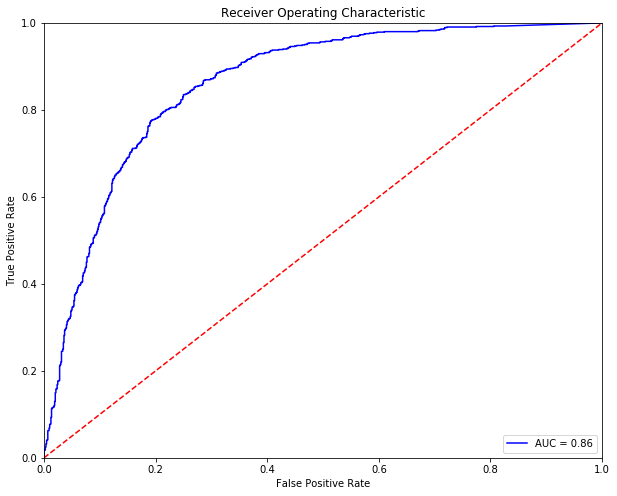

Optimal Threshold is 0.46844411386463164
Accuracy on test data is: 0.7903780068728522


Predicted  False  True  __all__
Actual                         
False        709   188      897
True         178   671      849
__all__      887   859     1746

In [610]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [611]:
table_70_50_PCA_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [612]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7       100  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.7967599410898379

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1615   398     2013
True         430  1631     2061
__all__     2045  2029     4074

Accuracy of the  Logistic  model for test data is: 0.7777777777777778

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        718   179      897
True         209   640      849
__all__      927   819     1746

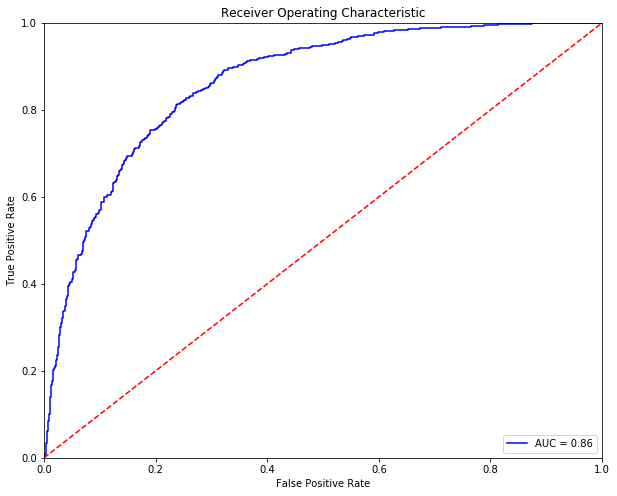

Optimal Threshold is 0.4772543272185678
Accuracy on test data is: 0.7806414662084765


Predicted  False  True  __all__
Actual                         
False        701   196      897
True         187   662      849
__all__      888   858     1746

In [613]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [614]:
table_70_50_PCA_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [615]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7997054491899853

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1451   562     2013
True         254  1807     2061
__all__     1705  2369     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.7875143184421535

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        652   245      897
True         126   723      849
__all__      778   968     1746

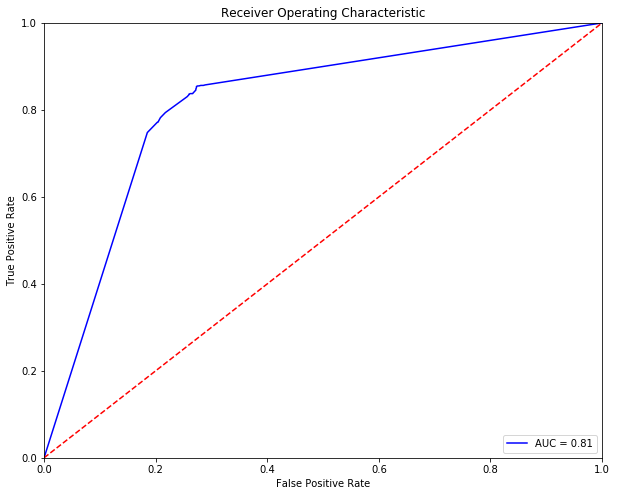

Optimal Threshold is 0.5511467893730332
Accuracy on test data is: 0.784077892325315


Predicted  False  True  __all__
Actual                         
False        714   183      897
True         194   655      849
__all__      908   838     1746

In [616]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [617]:
table_70_50_PCA_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

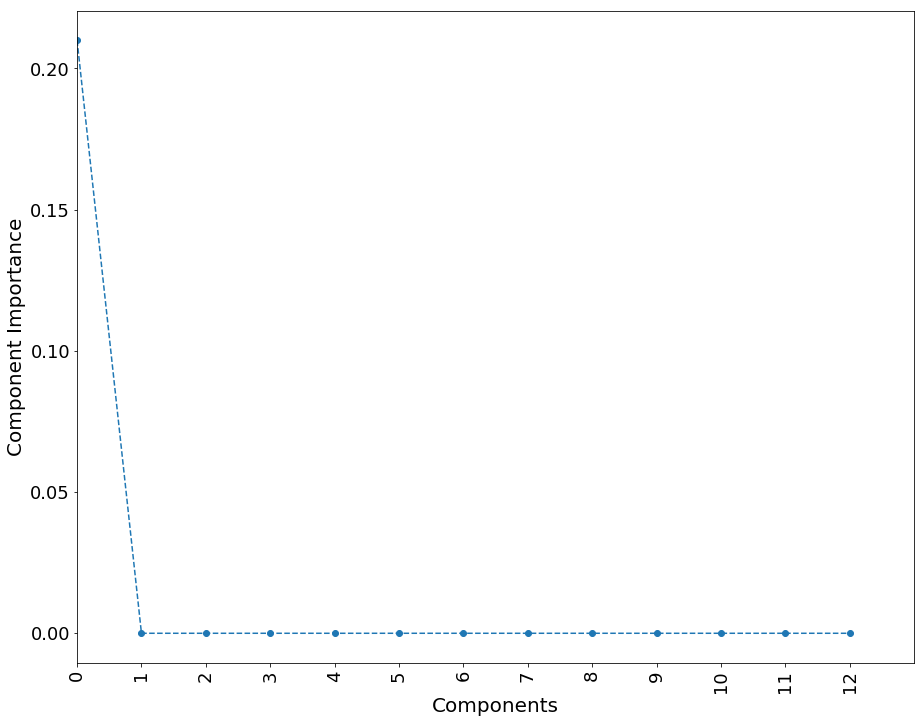

In [618]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [619]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8063328424153167

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1502   511     2013
True         278  1783     2061
__all__     1780  2294     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7983963344788088

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        682   215      897
True         137   712      849
__all__      819   927     1746

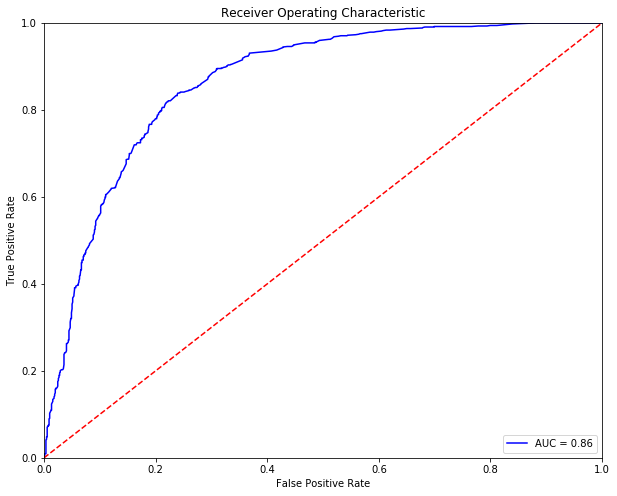

Optimal Threshold is 0.5047097757749248
Accuracy on test data is: 0.7932416953035509


Predicted  False  True  __all__
Actual                         
False        713   184      897
True         177   672      849
__all__      890   856     1746

In [620]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [621]:
table_70_50_PCA_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

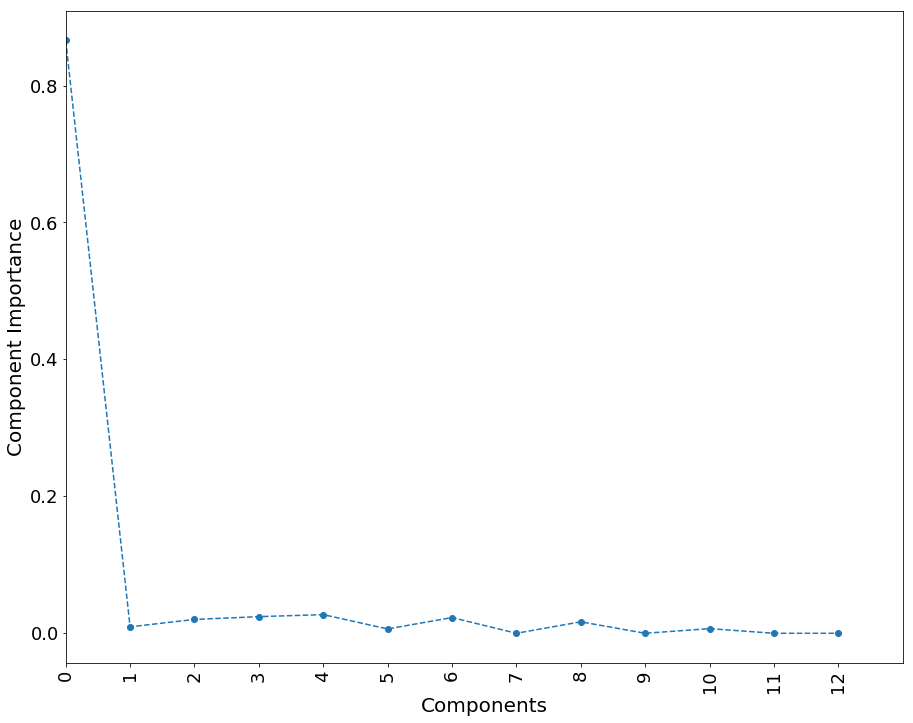

In [622]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [623]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse            0.2  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8242513500245459

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1578   435     2013
True         281  1780     2061
__all__     1859  2215     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.790950744558992

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        686   211      897
True         154   695      849
__all__      840   906     1746

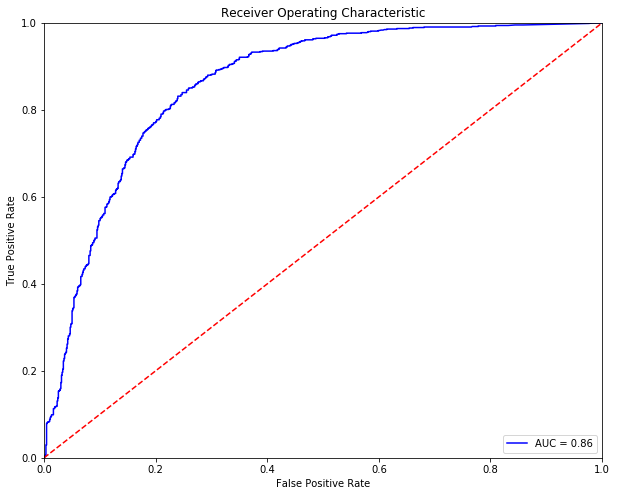

Optimal Threshold is 0.5536229802310828
Accuracy on test data is: 0.7898052691867125


Predicted  False  True  __all__
Actual                         
False        709   188      897
True         179   670      849
__all__      888   858     1746

In [624]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [625]:
table_70_50_PCA_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

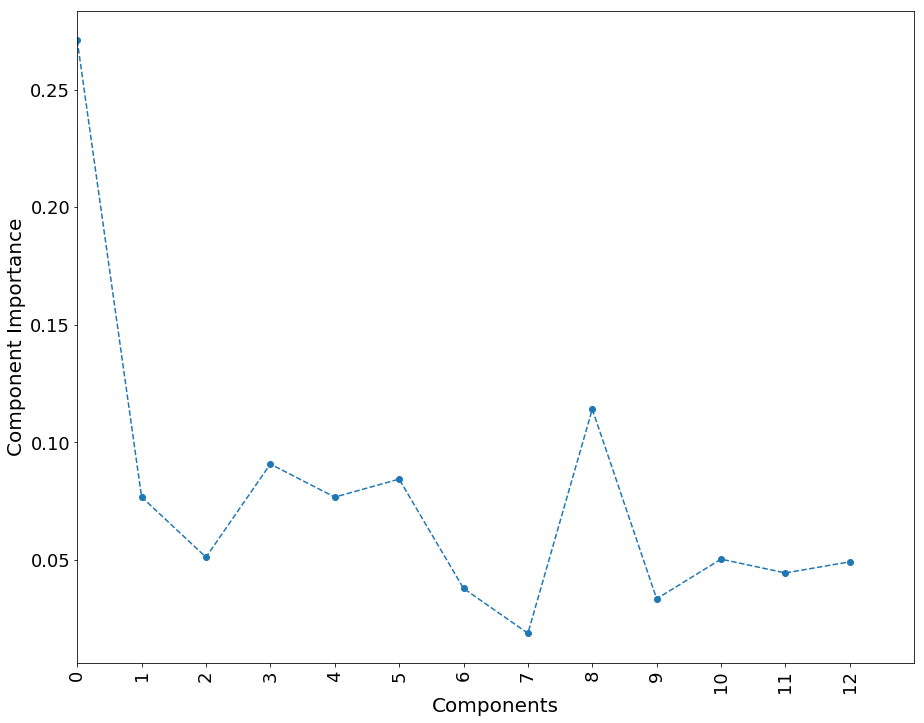

In [626]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [627]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8004418262150221

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1517   496     2013
True         317  1744     2061
__all__     1834  2240     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.7714776632302406

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        649   248      897
True         151   698      849
__all__      800   946     1746

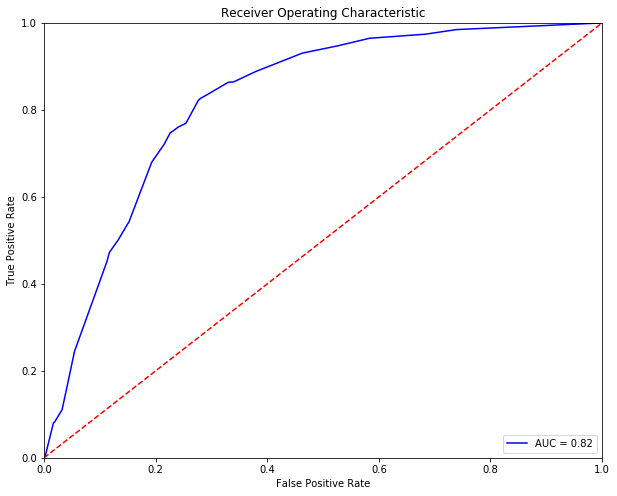

Optimal Threshold is 0.6451612903225806
Accuracy on test data is: 0.7605956471935853


Predicted  False  True  __all__
Actual                         
False        692   205      897
True         213   636      849
__all__      905   841     1746

In [628]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [629]:
table_70_50_PCA_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [630]:
%%capture
table_70_50_PCA_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

In [631]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [632]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9042709867452136

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1740   273     2013
True         117  1944     2061
__all__     1857  2217     4074

Accuracy of the  Bagging  model for test data is: 0.7943871706758304

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        663   234      897
True         125   724      849
__all__      788   958     1746

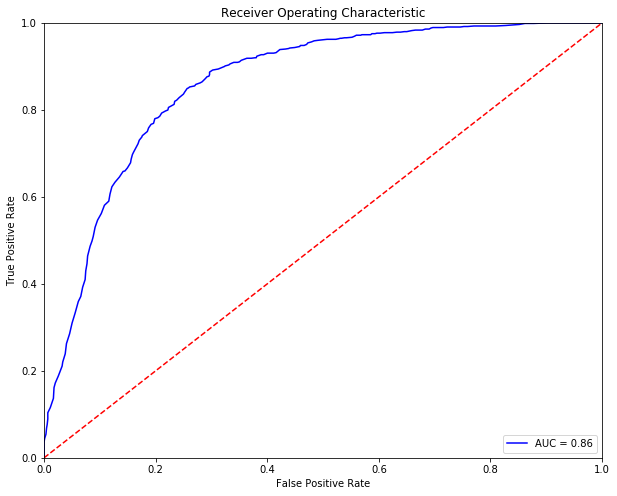

Optimal Threshold is 0.57
Accuracy on test data is: 0.7892325315005727


Predicted  False  True  __all__
Actual                         
False        711   186      897
True         182   667      849
__all__      893   853     1746

In [633]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [634]:
table_70_50_PCA_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [635]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9297987236131566


Predicted  False  True  __all__
Actual                         
False       1832   181     2013
True         105  1956     2061
__all__     1937  2137     4074

The test accuracy is: 0.781786941580756


Predicted  False  True  __all__
Actual                         
False        690   207      897
True         174   675      849
__all__      864   882     1746

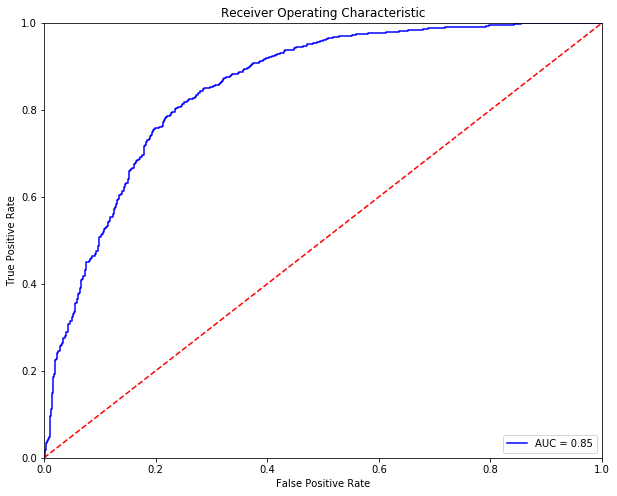

Optimal Threshold is 0.5185858461604579
Accuracy on test data is: 0.781786941580756


Predicted  False  True  __all__
Actual                         
False        702   195      897
True         186   663      849
__all__      888   858     1746

In [636]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [637]:
table_70_50_PCA_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [638]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8416789395878229


Predicted  False  True  __all__
Actual                         
False       1609   404     2013
True         241  1820     2061
__all__     1850  2224     4074

The accuracy of the model on test data is: 0.7857961053837342


Predicted  False  True  __all__
Actual                         
False        674   223      897
True         151   698      849
__all__      825   921     1746

In [639]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

Optimal Threshold is 0.56392837
Accuracy of Logistic Model on training data is: 0.7829324169530355


Predicted  False  True  __all__
Actual                         
False        703   194      897
True         185   664      849
__all__      888   858     1746

In [640]:
table_70_50_PCA_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [641]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 24.8min finished


The accuracy of the model on training data is: 0.8001963672066765


Predicted  False  True  __all__
Actual                         
False       1524   489     2013
True         325  1736     2061
__all__     1849  2225     4074

The accuracy of the model on test data is: 0.790950744558992


Predicted  False  True  __all__
Actual                         
False        683   214      897
True         151   698      849
__all__      834   912     1746

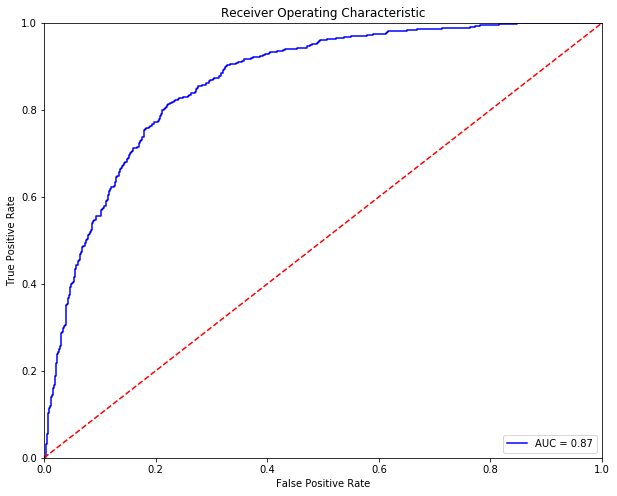

Optimal Threshold is 0.59276646
Accuracy on test data is: 0.7898052691867125


Predicted  False  True  __all__
Actual                         
False        709   188      897
True         179   670      849
__all__      888   858     1746

In [642]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [643]:
table_70_50_PCA_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [644]:
table_70_50_PCA_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2061.0  2013.0    0.0    0.0  0.000000   
LogisticRegression          0.796760  1631.0  1615.0  398.0  430.0  0.197715   
RandomForestClassifier      0.799705  1807.0  1451.0  562.0  254.0  0.279185   
AdaBoostClassifier          0.806333  1783.0  1502.0  511.0  278.0  0.253850   
GradientBoostingClassifier  0.824251  1780.0  1578.0  435.0  281.0  0.216095   
ExtraTreeClassifier         0.800442  1744.0  1517.0  496.0  317.0  0.246398   
BaggingClassifier           0.904271  1944.0  1740.0  273.0  117.0  0.135618   
VotingClassifier            0.929799  1956.0  1832.0  181.0  105.0  0.089916   
Neural Network-1            0.841679  1820.0  1609.0  404.0  241.0  0.200695   
Neural-Network-2            0.800196  1736.0  1524.0  489.0  325.0  0.242921   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.208637  
RandomForestClassifier      0.123241  
AdaBoostClassifier          0.134886  
GradientBoostingClassifier  0.136342  
ExtraTreeClassifier         0.153809  
BaggingClassifier           0.056769  
VotingClassifier            0.050946  
Neural Network-1            0.116934  
Neural-Network-2            0.157690

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.791523  660.0  722.0  175.0  189.0  0.195095   
LogisticRegression          0.777778  640.0  718.0  179.0  209.0  0.199554   
RandomForestClassifier      0.787514  723.0  652.0  245.0  126.0  0.273133   
AdaBoostClassifier          0.798396  712.0  682.0  215.0  137.0  0.239688   
GradientBoostingClassifier  0.790951  695.0  686.0  211.0  154.0  0.235229   
ExtraTreeClassifier         0.771478  698.0  649.0  248.0  151.0  0.276477   
BaggingClassifier           0.794387  724.0  663.0  234.0  125.0  0.260870   
VotingClassifier            0.781787  675.0  690.0  207.0  174.0  0.230769   
Neural Network-1            0.785796  698.0  674.0  223.0  151.0  0.248606   
Neural-Network-2            0.790951  698.0  683.0  214.0  151.0  0.238573   

                                 FNR  
index                                 
KNeighborsClassifier        0.222615  
LogisticRegression          0.246172  
RandomForestClassifier      0.148410  
AdaBoostClassifier          0.161366  
GradientBoostingClassifier  0.181390  
ExtraTreeClassifier         0.177856  
BaggingClassifier           0.147232  
VotingClassifier            0.204947  
Neural Network-1            0.177856  
Neural-Network-2            0.177856

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.790378  671.0  709.0  188.0  178.0  0.209588   
LogisticRegression          0.780641  662.0  701.0  196.0  187.0  0.218506   
RandomForestClassifier      0.784078  655.0  714.0  183.0  194.0  0.204013   
AdaBoostClassifier          0.793242  672.0  713.0  184.0  177.0  0.205128   
GradientBoostingClassifier  0.789805  670.0  709.0  188.0  179.0  0.209588   
ExtraTreeClassifier         0.760596  636.0  692.0  205.0  213.0  0.228540   
BaggingClassifier           0.789233  667.0  711.0  186.0  182.0  0.207358   
VotingClassifier            0.781787  663.0  702.0  195.0  186.0  0.217391   
Neural Network-1            0.782932  664.0  703.0  194.0  185.0  0.216276   
Neural-Network-2            0.789805  670.0  709.0  188.0  179.0  0.209588   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.209658   0.468444  0.860204  
LogisticRegression          0.220259   0.477254  0.863593  
RandomForestClassifier      0.228504   0.551147  0.813758  
AdaBoostClassifier          0.208481   0.504710  0.864689  
GradientBoostingClassifier  0.210836   0.553623  0.861723  
ExtraTreeClassifier         0.250883   0.645161  0.822393  
BaggingClassifier           0.214370   0.570000  0.861174  
VotingClassifier            0.219081   0.518586  0.852478  
Neural Network-1            0.217903   0.563928  0.856548  
Neural-Network-2            0.210836   0.592766  0.865260

#### Random State 20

In [645]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_20.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  994  23    34  106  305   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   38   6     6    6   15   

                                                    NREC         PAR  \
User                                                                   
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  1011  280.252226   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    38   12.368421   

                                                           PAS        LEN  \
User                                                                        
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  164.641939  83.002967   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   10.394737  48.078947   

                                                             BYS  \
User                                                               
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  13987.476756   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...   1728.315789   

                                                              BYR  0000  0100  \
User                                                                            
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...  359758.589515     0     0   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    9966.815789     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     0     0     0     0   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     0     0     1     2   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...    58    80   103    68   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    1400  1500  1600  1700  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...    62   111   155   226   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...    10    15    13     0   

                                                    1800  1900  2000  2100  \
User                                                                         
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...   100    12    15     6   
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0     0     0   

                                                    2200  2300  
User                                                            
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec...     8     4  
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9...     0     0

1 -> Infected
0 -> Uninfected


User
ba8eb5d1a8053b0997a90bea829c349d48200b46c815cec429a3f1a997c5ba98    0
f5448947a29087e5c7c74bcf1ef14257aaa6bad4990d3e9e976b79fa3511fa48    0
a70d401cfd6804c5711ae7620658b6be8b25483f999cb8bf73e44e011f877dd9    1
22730c54b8e7377fdfa932bf6b6c14741966f73ac8cc7d945fae9264c808afbb    0
47d304146c958a1134c7c928152e25972e4b8e660576183ae7dbca7d7db049db    1
c907dce84bf23f3a6d3557491ca1cd8299c7cf46a3fea156ed6d75cd73982d20    0
2de335ff62784aac8ad3bcb51dd0144c50b2d44135deb94ac508656f17b4111d    1
6686179791f655e042b2f5a0d6ebcdeb209ff33c0a2603941f4e0358e01390c1    0
4ada88478afa02b860f7d645393828b21da8a8cbd0e8fdd37b1c56a45de94f5c    0
757f0a16eec1045dfec4e23d7f6cd4a3f219bc6ba8f723741238f948eebb9681    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9376584264360198
The train/test split ratio is 70:30


In [646]:
display(X_pca_13[0:1])

array([[-0.51452931,  0.02879033, -0.14742758, -0.08591206,  0.20499883,
        -0.39542974, -0.03250354, -0.94658014, -0.53414061,  0.2566418 ,
         0.03790455,  0.40463664,  0.14263103]])

In [647]:
## Table to store training and test measures
table_70_50_PCA_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [648]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2065     0     2065
True           0  2009     2009
__all__     2065  2009     4074

Accuracy of the  KNN  model for test data is: 0.7966781214203894

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        682   163      845
True         192   709      901
__all__      874   872     1746

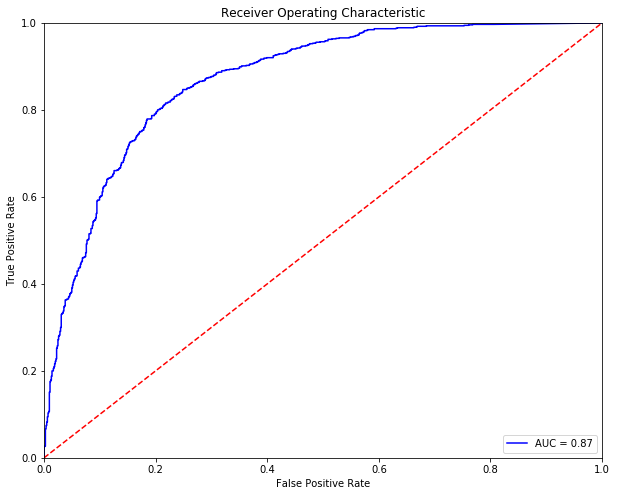

Optimal Threshold is 0.479222235503241
Accuracy on test data is: 0.7972508591065293


Predicted  False  True  __all__
Actual                         
False        674   171      845
True         183   718      901
__all__      857   889     1746

In [649]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [650]:
table_70_50_PCA_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [651]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.7       100  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  1e-05

Accuracy of the  Logistic  model for the training data is: 0.7881688757977418

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1653   412     2065
True         451  1558     2009
__all__     2104  1970     4074

Accuracy of the  Logistic  model for test data is: 0.7875143184421535

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        696   149      845
True         222   679      901
__all__      918   828     1746

In [652]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

Optimal Threshold is 0.4684476402975801
Accuracy on test data is: 0.7920962199312714


Predicted  False  True  __all__
Actual                         
False        670   175      845
True         188   713      901
__all__      858   888     1746

In [653]:
table_70_50_PCA_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [654]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7906234658811978

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1491   574     2065
True         279  1730     2009
__all__     1770  2304     4074

Accuracy of the  Random Forest Trees  model for test data is: 0.8012600229095075

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        643   202      845
True         145   756      901
__all__      788   958     1746

In [655]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

Optimal Threshold is 0.5474566049585589
Accuracy on test data is: 0.48396334478808706


Predicted   0.0  1.0  __all__
Actual                       
0.0         845    0      845
1.0         901    0      901
__all__    1746    0     1746

In [656]:
table_70_50_PCA_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

845
0
0
845
901
0
0
901
1.0
0.0
0.0
1.0


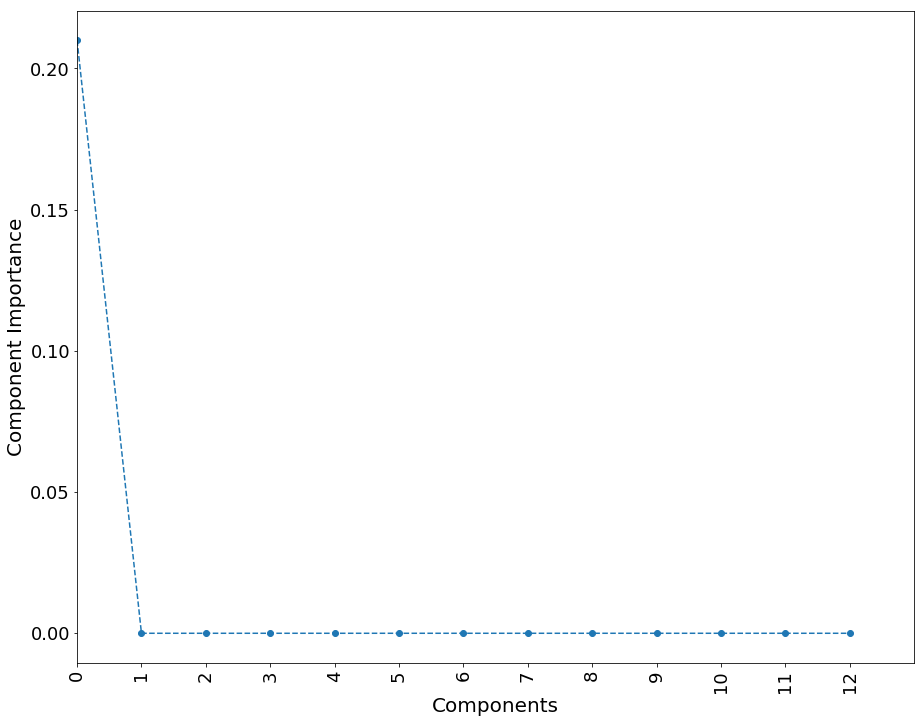

In [657]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [658]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.7960235640648011

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1534   531     2065
True         300  1709     2009
__all__     1834  2240     4074

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8081328751431844

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        661   184      845
True         151   750      901
__all__      812   934     1746

In [659]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

Optimal Threshold is 0.5028522359290377
Accuracy on test data is: 0.8029782359679267


Predicted  False  True  __all__
Actual                         
False        682   163      845
True         181   720      901
__all__      863   883     1746

In [660]:
table_70_50_PCA_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [661]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [662]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8092783505154639

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1602   463     2065
True         314  1695     2009
__all__     1916  2158     4074

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8087056128293242

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        675   170      845
True         164   737      901
__all__      839   907     1746

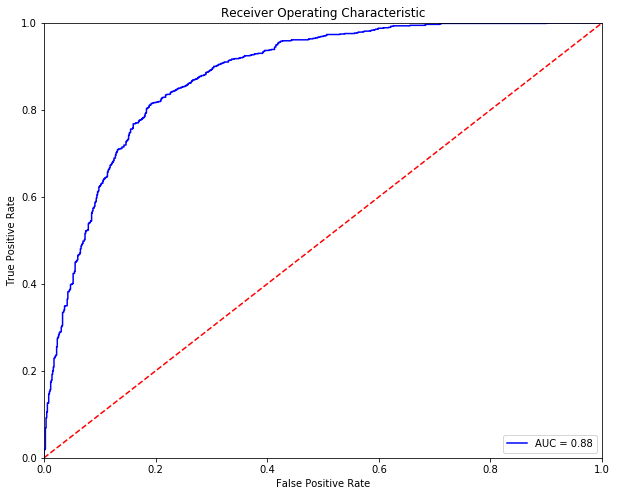

Optimal Threshold is 0.5215079044266054
Accuracy on test data is: 0.8109965635738832


Predicted  False  True  __all__
Actual                         
False        686   159      845
True         171   730      901
__all__      857   889     1746

In [663]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [664]:
table_70_50_PCA_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

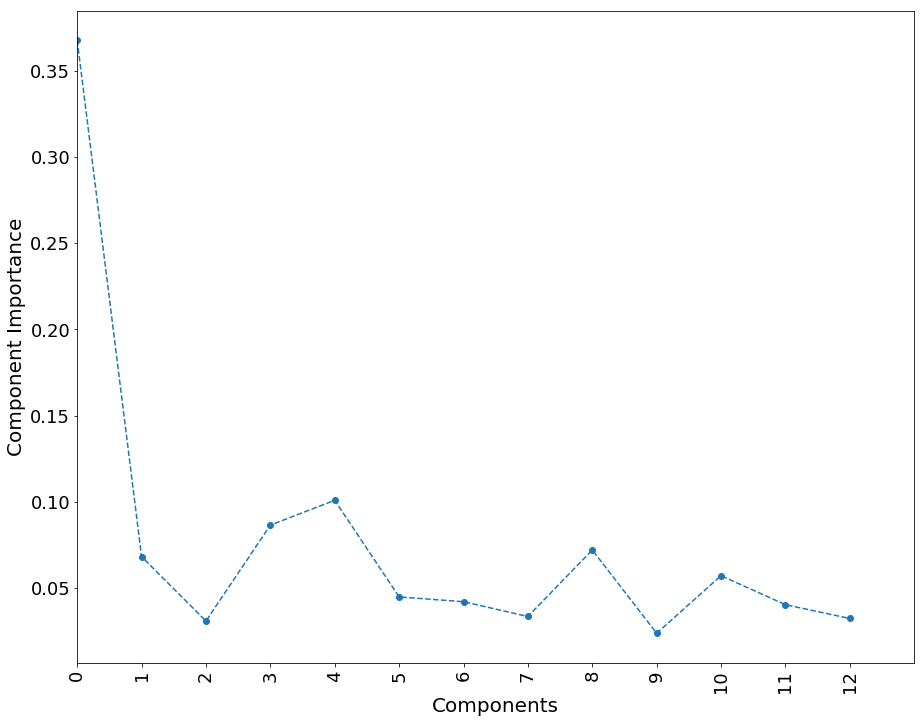

In [665]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [666]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8033873343151694

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       1577   488     2065
True         313  1696     2009
__all__     1890  2184     4074

Accuracy of the  Extra Decision Tree  model for test data is: 0.7920962199312714

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        651   194      845
True         169   732      901
__all__      820   926     1746

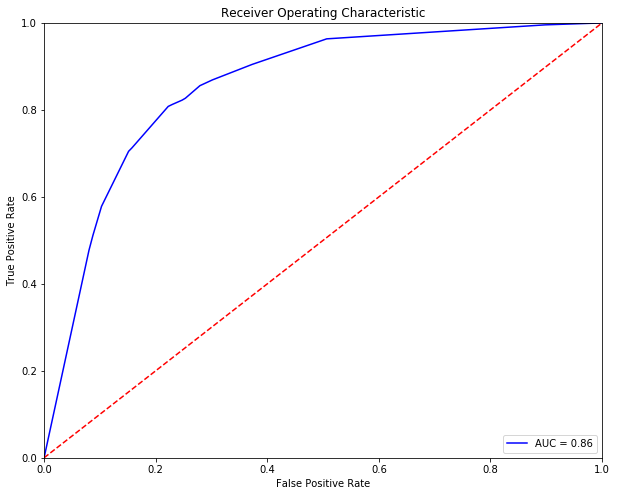

Optimal Threshold is 0.6071428571428571
Accuracy on test data is: 0.7754868270332188


Predicted  False  True  __all__
Actual                         
False        712   133      845
True         259   642      901
__all__      971   775     1746

In [667]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [668]:
table_70_50_PCA_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [669]:
%%capture
table_70_50_PCA_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

In [670]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [671]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9943544428080511

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       2063     2     2065
True          21  1988     2009
__all__     2084  1990     4074

Accuracy of the  Bagging  model for test data is: 0.7961053837342497

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False        634   211      845
True         145   756      901
__all__      779   967     1746

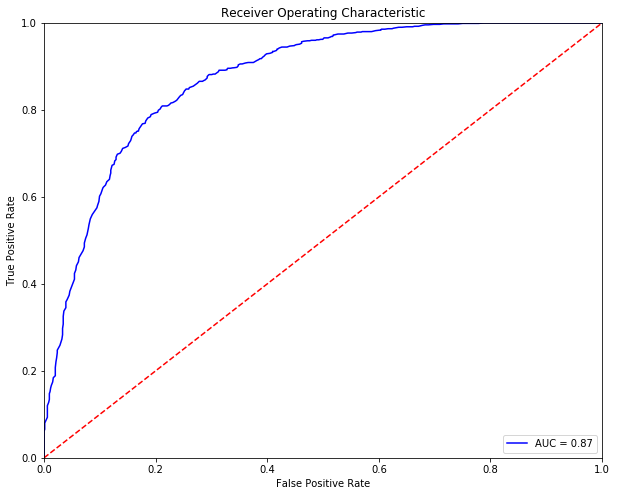

Optimal Threshold is 0.5566666666666666
Accuracy on test data is: 0.7972508591065293


Predicted  False  True  __all__
Actual                         
False        678   167      845
True         187   714      901
__all__      865   881     1746

In [672]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [673]:
table_70_50_PCA_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [674]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9332351497299951


Predicted  False  True  __all__
Actual                         
False       1922   143     2065
True         129  1880     2009
__all__     2051  2023     4074

The test accuracy is: 0.7949599083619702


Predicted  False  True  __all__
Actual                         
False        673   172      845
True         186   715      901
__all__      859   887     1746

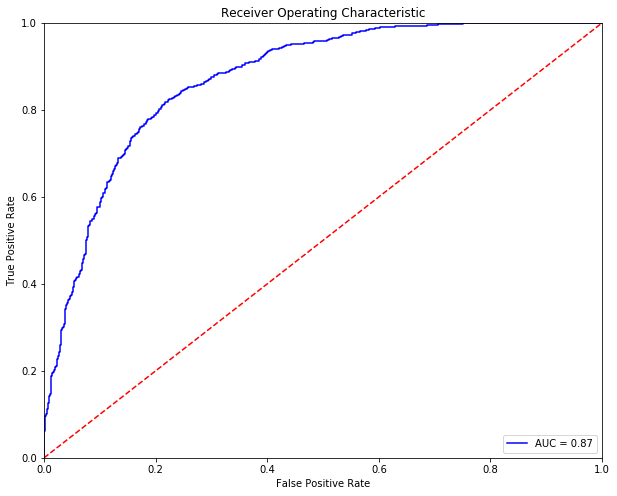

Optimal Threshold is 0.4971026191250797
Accuracy on test data is: 0.7955326460481099


Predicted  False  True  __all__
Actual                         
False        672   173      845
True         184   717      901
__all__      856   890     1746

In [675]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [676]:
table_70_50_PCA_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [677]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8397152674917971


Predicted  False  True  __all__
Actual                         
False       1681   384     2065
True         269  1740     2009
__all__     1950  2124     4074

The accuracy of the model on test data is: 0.8012600229095075


Predicted  False  True  __all__
Actual                         
False        669   176      845
True         171   730      901
__all__      840   906     1746

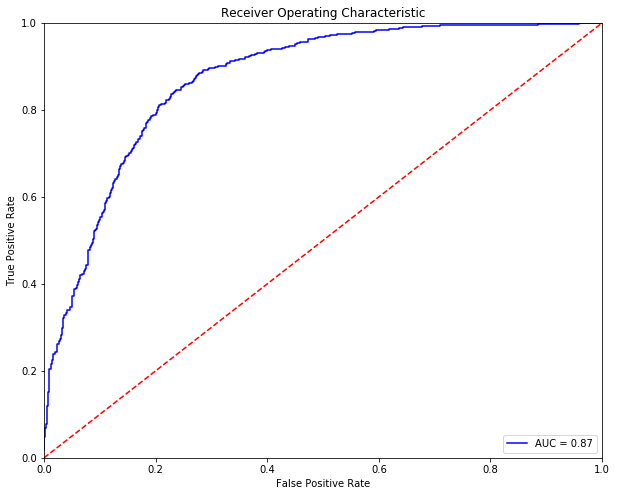

Optimal Threshold is 0.5188708
Accuracy of Logistic Model on training data is: 0.797823596792669


Predicted  False  True  __all__
Actual                         
False        674   171      845
True         182   719      901
__all__      856   890     1746

In [678]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [679]:
table_70_50_PCA_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [680]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 23.8min finished


The accuracy of the model on training data is: 0.7994599901816397


Predicted  False  True  __all__
Actual                         
False       1574   491     2065
True         326  1683     2009
__all__     1900  2174     4074

The accuracy of the model on test data is: 0.7972508591065293


Predicted  False  True  __all__
Actual                         
False        659   186      845
True         168   733      901
__all__      827   919     1746

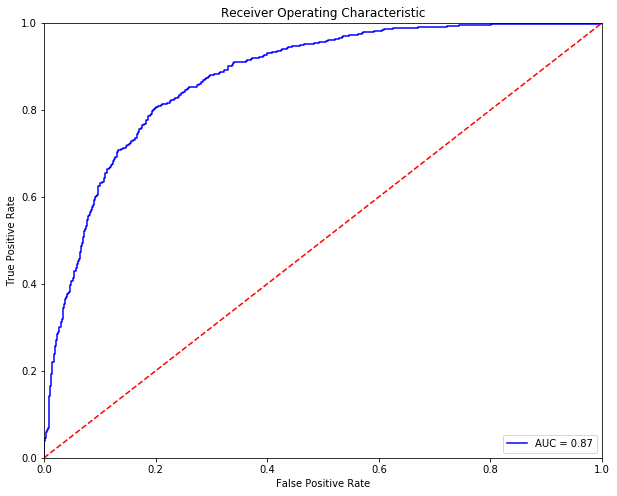

Optimal Threshold is 0.5622244
Accuracy on test data is: 0.8018327605956472


Predicted  False  True  __all__
Actual                         
False        678   167      845
True         179   722      901
__all__      857   889     1746

In [681]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [682]:
table_70_50_PCA_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [683]:
table_70_50_PCA_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2009.0  2065.0    0.0    0.0  0.000000   
LogisticRegression          0.788169  1558.0  1653.0  412.0  451.0  0.199516   
RandomForestClassifier      0.790623  1730.0  1491.0  574.0  279.0  0.277966   
AdaBoostClassifier          0.796024  1709.0  1534.0  531.0  300.0  0.257143   
GradientBoostingClassifier  0.809278  1695.0  1602.0  463.0  314.0  0.224213   
ExtraTreeClassifier         0.803387  1696.0  1577.0  488.0  313.0  0.236320   
BaggingClassifier           0.994354  1988.0  2063.0    2.0   21.0  0.000969   
VotingClassifier            0.933235  1880.0  1922.0  143.0  129.0  0.069249   
Neural Network-1            0.839715  1740.0  1681.0  384.0  269.0  0.185956   
Neural-Network-2            0.799460  1683.0  1574.0  491.0  326.0  0.237772   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.224490  
RandomForestClassifier      0.138875  
AdaBoostClassifier          0.149328  
GradientBoostingClassifier  0.156297  
ExtraTreeClassifier         0.155799  
BaggingClassifier           0.010453  
VotingClassifier            0.064211  
Neural Network-1            0.133897  
Neural-Network-2            0.162270

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.796678  709.0  682.0  163.0  192.0  0.192899   
LogisticRegression          0.787514  679.0  696.0  149.0  222.0  0.176331   
RandomForestClassifier      0.801260  756.0  643.0  202.0  145.0  0.239053   
AdaBoostClassifier          0.808133  750.0  661.0  184.0  151.0  0.217751   
GradientBoostingClassifier  0.808706  737.0  675.0  170.0  164.0  0.201183   
ExtraTreeClassifier         0.792096  732.0  651.0  194.0  169.0  0.229586   
BaggingClassifier           0.796105  756.0  634.0  211.0  145.0  0.249704   
VotingClassifier            0.794960  715.0  673.0  172.0  186.0  0.203550   
Neural Network-1            0.801260  730.0  669.0  176.0  171.0  0.208284   
Neural-Network-2            0.797251  733.0  659.0  186.0  168.0  0.220118   

                                 FNR  
index                                 
KNeighborsClassifier        0.213097  
LogisticRegression          0.246393  
RandomForestClassifier      0.160932  
AdaBoostClassifier          0.167592  
GradientBoostingClassifier  0.182020  
ExtraTreeClassifier         0.187569  
BaggingClassifier           0.160932  
VotingClassifier            0.206437  
Neural Network-1            0.189789  
Neural-Network-2            0.186459

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.797251  718.000000  674.000000  171.000000   
LogisticRegression          0.792096  713.000000  670.000000  175.000000   
RandomForestClassifier      0.483963  408.949026  436.050974  436.050974   
AdaBoostClassifier          0.802978  720.000000  682.000000  163.000000   
GradientBoostingClassifier  0.810997  730.000000  686.000000  159.000000   
ExtraTreeClassifier         0.775487  642.000000  712.000000  133.000000   
BaggingClassifier           0.797251  714.000000  678.000000  167.000000   
VotingClassifier            0.795533  717.000000  672.000000  173.000000   
Neural Network-1            0.797824  719.000000  674.000000  171.000000   
Neural-Network-2            0.801833  722.000000  678.000000  167.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        183.000000  0.202367  0.203108   0.479222   
LogisticRegression          188.000000  0.207101  0.208657   0.468448   
RandomForestClassifier      464.949026  0.483963  0.516037   0.547457   
AdaBoostClassifier          181.000000  0.192899  0.200888   0.502852   
GradientBoostingClassifier  171.000000  0.188166  0.189789   0.521508   
ExtraTreeClassifier         259.000000  0.157396  0.287458   0.607143   
BaggingClassifier           187.000000  0.197633  0.207547   0.556667   
VotingClassifier            184.000000  0.204734  0.204218   0.497103   
Neural Network-1            182.000000  0.202367  0.201998   0.518871   
Neural-Network-2            179.000000  0.197633  0.198668   0.562224   

                                 auc  
index                                 
KNeighborsClassifier        0.870209  
LogisticRegression          0.873282  
RandomForestClassifier      0.825033  
AdaBoostClassifier          0.875357  
GradientBoostingClassifier  0.881479  
ExtraTreeClassifier         0.855426  
BaggingClassifier           0.874428  
VotingClassifier            0.872204  
Neural Network-1            0.870978  
Neural-Network-2            0.874707

In [684]:
table_70_50_PCA_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_PCA_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_PCA_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [685]:
table_70_50_PCA_train_avg['accuracy']=(table_70_50_PCA_0_train['accuracy']+table_70_50_PCA_10_train['accuracy']+table_70_50_PCA_20_train['accuracy'])/3.0
table_70_50_PCA_train_avg['FPR']=(table_70_50_PCA_0_train['FPR']+table_70_50_PCA_10_train['FPR']+table_70_50_PCA_20_train['FPR'])/3.0
table_70_50_PCA_train_avg['FNR']=(table_70_50_PCA_0_train['FNR']+table_70_50_PCA_10_train['FNR']+table_70_50_PCA_20_train['FNR'])/3.0

In [686]:
table_70_50_PCA_test_avg['accuracy']=(table_70_50_PCA_0_test['accuracy']+table_70_50_PCA_10_test['accuracy']+table_70_50_PCA_20_test['accuracy'])/3.0
table_70_50_PCA_test_avg['FPR']=(table_70_50_PCA_0_test['FPR']+table_70_50_PCA_10_test['FPR']+table_70_50_PCA_20_test['FPR'])/3.0
table_70_50_PCA_test_avg['FNR']=(table_70_50_PCA_0_test['FNR']+table_70_50_PCA_10_test['FNR']+table_70_50_PCA_20_test['FNR'])/3.0

In [687]:
table_70_50_PCA_test_roc_avg['accuracy']=(table_70_50_PCA_0_test_roc['accuracy']+table_70_50_PCA_10_test_roc['accuracy']+table_70_50_PCA_20_test_roc['accuracy'])/3.0
table_70_50_PCA_test_roc_avg['FPR']=(table_70_50_PCA_0_test_roc['FPR']+table_70_50_PCA_10_test_roc['FPR']+table_70_50_PCA_20_test_roc['FPR'])/3.0
table_70_50_PCA_test_roc_avg['FNR']=(table_70_50_PCA_0_test_roc['FNR']+table_70_50_PCA_10_test_roc['FNR']+table_70_50_PCA_20_test_roc['FNR'])/3.0
table_70_50_PCA_test_roc_avg['auc']=(table_70_50_PCA_0_test_roc['auc']+table_70_50_PCA_10_test_roc['auc']+table_70_50_PCA_20_test_roc['auc'])/3.0

In [688]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.788742  0.198650  0.223880
RandomForestClassifier      0.793324  0.281049  0.132501
AdaBoostClassifier          0.801096  0.250541  0.147361
GradientBoostingClassifier  0.815333  0.221063  0.148377
ExtraTreeClassifier         0.800442  0.241116  0.158106
BaggingClassifier           0.963590  0.047337  0.025828
VotingClassifier            0.933235  0.078696  0.055004
Neural Network-1            0.840452  0.200383  0.118964
Neural-Network-2            0.797987  0.244058  0.160091

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.799351  0.186021  0.215453
LogisticRegression          0.788087  0.182362  0.241349
RandomForestClassifier      0.796296  0.260676  0.145938
AdaBoostClassifier          0.801833  0.232979  0.162893
GradientBoostingClassifier  0.802405  0.221812  0.172834
ExtraTreeClassifier         0.782169  0.253722  0.181222
BaggingClassifier           0.796869  0.251446  0.154419
VotingClassifier            0.795724  0.215068  0.193069
Neural Network-1            0.788278  0.243378  0.179261
Neural-Network-2            0.797060  0.234530  0.170821

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.799542  0.200054  0.200860  0.867718
LogisticRegression          0.790378  0.208762  0.210487  0.868979
RandomForestClassifier      0.688813  0.289416  0.322640  0.826769
AdaBoostClassifier          0.795533  0.201081  0.207830  0.867868
GradientBoostingClassifier  0.803742  0.195699  0.196813  0.872686
ExtraTreeClassifier         0.766323  0.197806  0.268568  0.838053
BaggingClassifier           0.799160  0.196599  0.205068  0.868658
VotingClassifier            0.794960  0.204578  0.205529  0.864080
Neural Network-1            0.789233  0.210598  0.210955  0.860771
Neural-Network-2            0.798015  0.201500  0.202474  0.870019

In [689]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')